# EU

In [1772]:
from scipy.stats import norm
import numpy as np
import statistics
import tensorflow as tf
import tensorflow_probability as tfp
import openturns as ot
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [757]:
# Black-Scholes Model參數
S0 = 100       # 資產價格
K = 100        # 履約價
r = 0.01       # 無風險利率
Tt = 10        # 時間
vol = 0.1      # 波動度
#N = 2**4
N = 20         # 期數
M = 10000      # 模擬次數
dt = Tt/N      # 一期時間長度

## 精確解

In [270]:
#精確解
d1 = (np.log(S0/K)+(r+0.5*(vol**2))*Tt)/(vol*(Tt**0.5))
d2 = d1-vol*(Tt**0.5)
C0 = (-K)*np.exp(-r*Tt)*norm.cdf(d2) + S0*norm.cdf(d1)
P0 = K*np.exp(-r*Tt)*norm.cdf(-d2) - S0*norm.cdf(-d1)

In [1993]:
PG

5.125750001043861

In [1994]:
CG

9.213652307469951

## MC

In [1593]:
def MC_EU(M):
    # 建立空的矩陣
    ST = np.zeros((M,N+1))
    # 設定初始價格
    ST[:,0] = np.log(S0)

    # 執行蒙地卡羅
    for n in range(N):
        e = np.random.standard_normal(M)
        ST[:,n+1] = ST[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e

    # 取出第N期價格
    ST_N = np.exp(ST[:, -1])
    CT = np.zeros(M)
    for i in range(M):
        CT[i] = np.exp(-r*Tt)*np.maximum(ST_N[i]-K,0)
    PT = np.zeros(M)
    for i in range(M):
        PT[i] = np.exp(-r*Tt)*np.maximum(K-ST_N[i],0)
    # 蒙地卡羅法的買權賣權價格
    C0_M = np.mean(np.exp(-r*Tt)*np.maximum(ST_N-K,0))
    P0_M = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_N,0))
    return CT,PT,C0_M,P0_M

In [1594]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = MC_EU(2**10),MC_EU(2**11),MC_EU(2**12),MC_EU(2**13),MC_EU(2**14),MC_EU(2**15),MC_EU(2**16),MC_EU(2**17)

In [1595]:
MC = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'MC Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'MC Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                              EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'MC Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                             EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)]})

In [1818]:
MC['Call Error'] = err(MC['MC Call'],C0)
MC['Put Error'] = err(MC['MC Put'],P0)

In [1819]:
MC

M    MC Call    MC Put  MC Call Var  MC Put Var  Call Error  Put Error
0    1024  17.363302  8.197153     0.683266    0.138021    0.002996   0.051566
1    2048  17.597983  7.952153     0.314454    0.072093    0.016552   0.020136
2    4096  17.577321  7.859802     0.158343    0.035912    0.015358   0.008289
3    8192  17.018450  7.711699     0.075047    0.017012    0.016925   0.010710
4   16384  17.276641  7.620741     0.038630    0.008571    0.002010   0.022379
5   32768  17.182064  7.853298     0.019538    0.004387    0.007474   0.007455
6   65536  17.215444  7.806306     0.009772    0.002160    0.005546   0.001426
7  131072  17.309874  7.770799     0.004885    0.001080    0.000091   0.003129

In [935]:
EU1 =  []
for i in range(10):
    EU1.append(MC_EU(2**17))

In [936]:
EU8_call = []
for i in range(10):
    EU8_call.append(EU1[i][2])
EU8_put = []
for i in range(10):
    EU8_put.append(EU1[i][3])

In [937]:
EU8_call

[17.31081787746005,
 17.303144536968404,
 17.225430044259674,
 17.350454346611063,
 17.273635466797536,
 17.38229033316118,
 17.18896360062387,
 17.37486302424817,
 17.362593398234804,
 17.21411219393455]

In [938]:
EU8_put

[7.825423952773315,
 7.802759944585474,
 7.842869348635994,
 7.763443591823329,
 7.812674956775832,
 7.769578181665776,
 7.801161367746857,
 7.832935286374341,
 7.804212641755994,
 7.781083905056297]

In [939]:
MC_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Call': [np.mean(EU1_call),np.mean(EU2_call),np.mean(EU3_call),np.mean(EU4_call),
                          np.mean(EU5_call),np.mean(EU6_call),np.mean(EU7_call),np.mean(EU8_call)], 
              'MC Put': [np.mean(EU1_put),np.mean(EU2_put),np.mean(EU3_put),np.mean(EU4_put),
                          np.mean(EU5_put),np.mean(EU6_put),np.mean(EU7_put),np.mean(EU8_put)],
              'MC Call Var': [np.var(EU1_call)/9,np.var(EU2_call)/9,np.var(EU3_call)/9,np.var(EU4_call)/9,
                             np.var(EU5_call)/9,np.var(EU6_call)/9,np.var(EU7_call)/9,np.var(EU8_call)/9], 
              'MC Put Var': [np.var(EU1_put)/9,np.var(EU2_put)/9,np.var(EU3_put)/9,np.var(EU4_put)/9,
                             np.var(EU5_put)/9,np.var(EU6_put)/9,np.var(EU7_put)/9,np.var(EU8_put)/9]})

In [1700]:
MC_10['MC Call Var Up'] = MC_10['MC Call Var']**0.5*1.96+MC_10['MC Call']
MC_10['MC Call Var Down'] = -MC_10['MC Call Var']**0.5*1.96+MC_10['MC Call']
MC_10['MC Put Var Up'] = MC_10['MC Put Var']**0.5*1.96+MC_10['MC Put']
MC_10['MC Put Var Down'] = -MC_10['MC Put Var']**0.5*1.96+MC_10['MC Put']
MC_10['Call Error'] = err(MC_10['MC Call'],C0)
MC_10['Put Error'] = err(MC_10['MC Put'],P0)

In [1799]:
MC_10

M    MC Call    MC Put  MC Call Var  MC Put Var  MC Call Var Up  \
0    1024  17.442722  7.784220     0.064800    0.012982       17.941655   
1    2048  17.246415  7.860131     0.052090    0.007706       17.693751   
2    4096  17.219049  7.800530     0.011680    0.004037       17.430870   
3    8192  17.281258  7.798568     0.005079    0.006118       17.420947   
4   16384  17.296648  7.859565     0.003346    0.001151       17.410025   
5   32768  17.320401  7.797488     0.002540    0.000754       17.419175   
6   65536  17.313658  7.788332     0.000628    0.000149       17.362773   
7  131072  17.298630  7.803614     0.000499    0.000069       17.342413   

   MC Call Var Down  MC Put Var Up  MC Put Var Down     Error  Call Error  \
0         16.943789       8.007540         7.560900  0.007583    0.007583   
1         16.799079       8.032192         7.688070  0.003756    0.003756   
2         17.007227       7.925061         7.675999  0.005337    0.005337   
3         17.141568       7.951876         7.645260  0.001744    0.001744   
4         17.183270       7.926069         7.793061  0.000855    0.000855   
5         17.221626       7.851293         7.743683  0.000517    0.000517   
6         17.264544       7.812229         7.764435  0.000128    0.000128   
7         17.254848       7.819942         7.787287  0.000740    0.000740   

   Put Error  
0   0.001407  
1   0.008331  
2   0.000685  
3   0.000434  
4   0.008259  
5   0.000295  
6   0.000879  
7   0.001081

In [345]:
t = np.arange(1, N+1) * dt
#价格
A = np.sqrt(dt) * np.tril(np.ones((N, N)), 0)
A1 = []
for i in range(M): #生成布朗运动
    B = A.dot(np.random.randn(N))
    #路径
    S = S0 * np.exp((r - vol ** 2 / 2) * t + vol * B)
    Sttt = np.exp(-r * Tt) * np.maximum(S[-1] - K, 0)
    A1.append(Sttt)
    
#np.mean(A1)

17.241155518931954

In [264]:
def Brown_brige(n, b0):
    B = np.zeros(n+1)
    #初始化
    B[0] = b0
    z = np.random.randn() 
    B[n] = np.sqrt(Tt) * z
    M = int(np.log2(n)) 
    h=n
    #生成矩阵
    A = np.zeros((n+1, n+1)) 
    A[n, 1] = np.sqrt(n)
    cnt = 1

    for k in range(1, M+1):
            h = h // 2
            for j in range(1, 2**(k-1)+1):
                z = np.random.randn()
                B[(2*j-1)*h] = (B[2*(j-1)*h] + B[2*j*h]) / 2 + np.sqrt(h/2) * z 
                #更新生成矩阵
                cnt += 1
                A[(2*j-1)*h, :] = (A[2*(j-1)*h, :] + A[2*j*h, :]) / 2
                A[(2*j-1)*h, cnt] += np.sqrt(h/2)
    return B, A

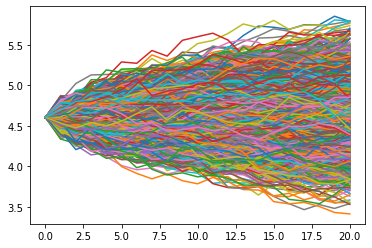

In [12]:
for i in range(10000):
    plt.plot(ST[i,:])
plt.show()

## QMC Sobol

In [601]:
Primitive_poly = []
with open("primitive_polynomials_GF2.txt") as file:
    for i in file.readlines():
        Primitive_poly.append(i.strip().split("+"))

def Primitive_process(d):
    """
    处理Primitive_poly
    """
    res = []
    for i in d:
        i = i.strip(" ").split("^")
        res.append(int(i[-1]))
            
    return res

Primitive_poly_proc = []
for i in Primitive_poly:
    Primitive_poly_proc.append(Primitive_process(i))

In [605]:
def Generate_m(Primitive):
    """
    计算m的初始值
    """
    d = Primitive[0]
    m = []
    for i in range(1, d+1):
        m.append(2 ** i - 1)
        
    return m

def Compute_m(Primitive, m):
    """
    迭代计算m
    """
    d = Primitive[0]
    #初始化
    res = m[-d]
    res = res ^ (2 ** d * res)
    #遍历，只需要考虑系数非零处
    for i in Primitive[1: -1]:
        #找到对应位置
        k = d - i
        res = res ^ (2 ** k * m[-k])
    
    return res

def generate_V(data):
    """
    计算方向矩阵
    """
    n = len(data)
    res = []
    for i in range(1, len(data)+1):
        d = data[i-1]
        binary = np.binary_repr(d)
        m = len(binary)
        #前补0和后补0
        binary = '0' * (i - m) + binary + '0' * (n - i)
        b = [int(i) for i in binary]
        res.append(b)

    res = np.array(res).T
    
    return res

def find_c(n):
    """
    找到n二进制表示最右边一个1的位置
    """
    binary = np.binary_repr(n)
    i = 1
    while 1:
        if binary[-i] == '1':
            break
        else:
            i += 1
            
    return i

def reverse_transform(res, b):
    #转换
    d = 0
    for i in range(len(res)):
        d += res[i] * b ** (- i - 1)
        
    return d

def Sobol_1d(n, Primitive, m=None):
    """
    生成n个1维Sobol序列，Primitive为本原多项式
    """
    if not m:
        #生成m
        m = Generate_m(Primitive)
    #m的数量为n的二进制表示长度
    #注意这里为n
    N = len(np.binary_repr(n))
    #迭代计算剩余的m
    while len(m) < N:
        m1 = Compute_m(Primitive, m)
        m.append(m1)
        
    #生成V
    V = generate_V(m)
    
    #生成结果
    res = []
    for i in range(n):
        if i == 0:
            v = V[:, 0]
        else:
            #注意第i个元素为i+1
            c = find_c(i+1)
            #找到第c个向量
            v = v ^ V[:, c-1]
            
        #转换为2进制
        v = np.mod(v, 2)
        d = reverse_transform(v, 2)
        res.append(d)
        
    return np.array(res)

def Sobol_d(n, d, Primitive):
    """
    生成n个d维Sobol序列，Primitive为本原多项式
    """
    data = []
    for p in Primitive[:d]:
        #print(p)
        res = Sobol_1d(n, p)
        #print(res)
        data.append(res)
        
    return np.array(data).T

In [1599]:
def QMC_EU(M):
    # 建立空的矩陣
    ST = np.zeros((M,N+1))
    # 設定初始價格
    ST[:,0] = np.log(S0)

    #QMC
    num_results = M
    dim = N
    Sobol = tf.math.sobol_sample(dim, num_results, skip=0, dtype=tf.dtypes.float32, name=None)
    Sobol = Sobol.numpy()
    u = np.random.uniform(size=(N))
    Data = np.zeros((M,N))
    for i in range(N):
        Data[:,i] = Sobol[:,i] + u[i]
        Data[Data > 1] = Data[Data > 1] - 1
    e = norm.ppf(Data,0,1)

    # 執行蒙地卡羅
    for n in range(N):
        ST[:,n+1] = ST[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e[:,n]

    # 取出第N期價格
    ST_N = np.exp(ST[:, -1])
    CTQ = np.zeros(M)
    for i in range(M):
        CTQ[i] = np.exp(-r*Tt)*np.maximum(ST_N[i]-K,0)
    PTQ = np.zeros(M)
    for i in range(M):
        PTQ[i] = np.exp(-r*Tt)*np.maximum(K-ST_N[i],0)
    # 蒙地卡羅法的買權賣權價格
    C0_Q = np.mean(np.exp(-r*Tt)*np.maximum(ST_N-K,0))
    P0_Q = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_N,0))
    return CTQ, PTQ, C0_Q, P0_Q

In [1600]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_EU(2**10),QMC_EU(2**11),QMC_EU(2**12),QMC_EU(2**13),QMC_EU(2**14),QMC_EU(2**15),QMC_EU(2**16),QMC_EU(2**17)

In [1601]:
QMC = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'QMC Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'QMC Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                              EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'QMC Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                             EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)]})

In [1821]:
QMC['Call Error'] = err(QMC['QMC Call'],C0)
QMC['Put Error'] = err(QMC['QMC Put'],P0)

In [1822]:
QMC

M   QMC Call   QMC Put  QMC Call Var  QMC Put Var  Call Error  \
0    1024  17.330594  7.800293      0.648097     0.139115    0.001106   
1    2048  17.252594  7.748871      0.304128     0.070661    0.003400   
2    4096  17.274446  7.734150      0.160679     0.034961    0.002137   
3    8192  17.310169  7.769183      0.079059     0.017417    0.000074   
4   16384  17.370527  7.840735      0.038721     0.008731    0.003413   
5   32768  17.321714  7.803641      0.019563     0.004325    0.000593   
6   65536  17.299369  7.790404      0.009701     0.002175    0.000698   
7  131072  17.304259  7.787492      0.004885     0.001083    0.000415   

   Put Error  
0   0.000655  
1   0.005942  
2   0.007830  
3   0.003336  
4   0.005843  
5   0.001084  
6   0.000614  
7   0.000987

In [1009]:
QMC_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Call': [np.mean(EU1_call),np.mean(EU2_call),np.mean(EU3_call),np.mean(EU4_call),
                          np.mean(EU5_call),np.mean(EU6_call),np.mean(EU7_call),np.mean(EU8_call)], 
              'MC Put': [np.mean(EU1_put),np.mean(EU2_put),np.mean(EU3_put),np.mean(EU4_put),
                          np.mean(EU5_put),np.mean(EU6_put),np.mean(EU7_put),np.mean(EU8_put)],
              'MC Call Var': [np.var(EU1_call)/9,np.var(EU2_call)/9,np.var(EU3_call)/9,np.var(EU4_call)/9,
                             np.var(EU5_call)/9,np.var(EU6_call)/9,np.var(EU7_call)/9,np.var(EU8_call)/9], 
              'MC Put Var': [np.var(EU1_put)/9,np.var(EU2_put)/9,np.var(EU3_put)/9,np.var(EU4_put)/9,
                             np.var(EU5_put)/9,np.var(EU6_put)/9,np.var(EU7_put)/9,np.var(EU8_put)/9]})

In [1800]:
QMC_10['MC Call Var Up'] = QMC_10['MC Call Var']**0.5*1.96+QMC_10['MC Call']
QMC_10['MC Call Var Down'] = -QMC_10['MC Call Var']**0.5*1.96+QMC_10['MC Call']
QMC_10['MC Put Var Up'] = QMC_10['MC Put Var']**0.5*1.96+QMC_10['MC Put']
QMC_10['MC Put Var Down'] = -QMC_10['MC Put Var']**0.5*1.96+QMC_10['MC Put']
QMC_10['Call Error'] = err(QMC_10['MC Call'],C0)
QMC_10['Put Error'] = err(QMC_10['MC Put'],P0)

In [1801]:
QMC_10

M    MC Call    MC Put  MC Call Var  MC Put Var  MC Call Var Up  \
0    1024  17.344097  7.800238     0.005707    0.001728       17.492166   
1    2048  17.334639  7.776495     0.003955    0.001449       17.457907   
2    4096  17.308205  7.801331     0.001153    0.000325       17.374755   
3    8192  17.313665  7.780795     0.000366    0.000097       17.351168   
4   16384  17.315415  7.802740     0.000106    0.000053       17.335573   
5   32768  17.321551  7.800751     0.000035    0.000019       17.333190   
6   65536  17.307683  7.792777     0.000012    0.000009       17.314530   
7  131072  17.311599  7.795601     0.000004    0.000004       17.315634   

   MC Call Var Down  MC Put Var Up  MC Put Var Down  Call Error  Put Error  
0         17.196029       7.881714         7.718762    0.001886   0.000648  
1         17.211370       7.851113         7.701876    0.001340   0.002398  
2         17.241654       7.836684         7.765977    0.000187   0.000788  
3         17.276162       7.800124         7.761465    0.000128   0.001846  
4         17.295257       7.817057         7.788423    0.000229   0.000969  
5         17.309912       7.809253         7.792248    0.000584   0.000714  
6         17.300836       7.798774         7.786781    0.000217   0.000309  
7         17.307564       7.799481         7.791720    0.000009   0.000053

## AV 

In [1604]:
def QMC_EU_AV(M):
    # av
    # 建立空的矩陣
    ST = np.zeros((M,N+1))
    ST_a = np.zeros((M,N+1))

    # 設定初始價格
    ST[:,0] = np.log(S0)
    ST_a[:,0] = np.log(S0)

    #QMC
    num_results = M
    dim = N
    Sobol = tf.math.sobol_sample(dim, num_results, skip=0, dtype=tf.dtypes.float32, name=None)
    Sobol = Sobol.numpy()
    u = np.random.uniform(size=(N))
    Data = np.zeros((M,N))
    for i in range(N):
        Data[:,i] = Sobol[:,i] + u[i]
        Data[Data > 1] = Data[Data > 1] - 1
    e = norm.ppf(Data,0,1)
    e_a = -e

    # 執行蒙地卡羅
    for n in range(N):
        ST[:,n+1] = ST[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e[:,n]

    for n in range(N):
        ST_a[:,n+1] = ST_a[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e_a[:,n]

    # 取出第N期價格
    ST_N = np.exp(ST[:, -1])
    ST_N_a = np.exp(ST_a[:, -1])
    CT_a1 = np.zeros(M)
    for i in range(M):
        CT_a1[i] = np.exp(-r*Tt)*np.maximum(ST_N[i]-K,0)
    
    CT_a2 = np.zeros(M)
    for i in range(M):
        CT_a2[i] = np.exp(-r*Tt)*np.maximum(ST_N_a[i]-K,0)
    
    PT_a1 = np.zeros(M)
    for i in range(M):
        PT_a1[i] = np.exp(-r*Tt)*np.maximum(K-ST_N[i],0)
    
    PT_a2 = np.zeros(M)
    for i in range(M):
        PT_a2[i] = np.exp(-r*Tt)*np.maximum(K-ST_N_a[i],0)

    CT_av = 0.5*(CT_a1+CT_a2)
    PT_av = 0.5*(PT_a1+PT_a2)
    
    C0_av = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(ST_N-K,0)+np.maximum(ST_N_a-K,0))))
    P0_av = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(K-ST_N,0)+np.maximum(K-ST_N_a,0))))
    
    return CT_av, PT_av, C0_av, P0_av

#C0_av = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(ST_N-K,0)+np.maximum(ST_N_a-K,0))))
#P0_av = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(K-ST_N,0)+np.maximum(K-ST_N_a,0))))

In [1605]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_EU_AV(2**10),QMC_EU_AV(2**11),QMC_EU_AV(2**12),QMC_EU_AV(2**13),QMC_EU_AV(2**14),QMC_EU_AV(2**15),QMC_EU_AV(2**16),QMC_EU_AV(2**17)

In [1606]:
QMC_AV = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC AV Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'QMC AV Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'QMC AV Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                              EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'QMC AV Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                             EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)]})

In [1824]:
QMC_AV['Call Error'] = err(QMC_AV['QMC AV Call'],C0)
QMC_AV['Put Error'] = err(QMC_AV['QMC AV Put'],P0)

In [1825]:
QMC_AV

M  QMC AV Call  QMC AV Put  QMC AV Call Var  QMC AV Put Var  \
0    1024    17.376626    7.887356         0.155333        0.038805   
1    2048    17.115587    7.669301         0.082201        0.020292   
2    4096    17.442118    7.895863         0.040026        0.009900   
3    8192    17.271432    7.789432         0.020356        0.004939   
4   16384    17.279274    7.776804         0.010398        0.002486   
5   32768    17.318010    7.796359         0.005217        0.001247   
6   65536    17.302365    7.781574         0.002629        0.000625   
7  131072    17.335675    7.814871         0.001298        0.000310   

   Call Error  Put Error  
0    0.003765   0.011824  
1    0.011314   0.016149  
2    0.007548   0.012915  
3    0.002311   0.000738  
4    0.001858   0.002358  
5    0.000379   0.000150  
6    0.000525   0.001746  
7    0.001400   0.002525

In [1065]:
QMC_AV_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Call': [np.mean(EU1_call),np.mean(EU2_call),np.mean(EU3_call),np.mean(EU4_call),
                          np.mean(EU5_call),np.mean(EU6_call),np.mean(EU7_call),np.mean(EU8_call)], 
              'MC Put': [np.mean(EU1_put),np.mean(EU2_put),np.mean(EU3_put),np.mean(EU4_put),
                          np.mean(EU5_put),np.mean(EU6_put),np.mean(EU7_put),np.mean(EU8_put)],
              'MC Call Var': [np.var(EU1_call)/9,np.var(EU2_call)/9,np.var(EU3_call)/9,np.var(EU4_call)/9,
                             np.var(EU5_call)/9,np.var(EU6_call)/9,np.var(EU7_call)/9,np.var(EU8_call)/9], 
              'MC Put Var': [np.var(EU1_put)/9,np.var(EU2_put)/9,np.var(EU3_put)/9,np.var(EU4_put)/9,
                             np.var(EU5_put)/9,np.var(EU6_put)/9,np.var(EU7_put)/9,np.var(EU8_put)/9]})

In [1802]:
QMC_AV_10['MC Call Var Up'] = QMC_AV_10['MC Call Var']**0.5*1.96+QMC_AV_10['MC Call']
QMC_AV_10['MC Call Var Down'] = -QMC_AV_10['MC Call Var']**0.5*1.96+QMC_AV_10['MC Call']
QMC_AV_10['MC Put Var Up'] = QMC_AV_10['MC Put Var']**0.5*1.96+QMC_AV_10['MC Put']
QMC_AV_10['MC Put Var Down'] = -QMC_AV_10['MC Put Var']**0.5*1.96+QMC_AV_10['MC Put']
QMC_AV_10['Call Error'] = err(QMC_AV_10['MC Call'],C0)
QMC_AV_10['Put Error'] = err(QMC_AV_10['MC Put'],P0)

In [1803]:
QMC_AV_10

M    MC Call    MC Put  MC Call Var  MC Put Var  MC Call Var Up  \
0    1024  17.355908  7.815732     0.004255    0.001205       17.483752   
1    2048  17.228945  7.749313     0.002058    0.000597       17.317864   
2    4096  17.267924  7.780812     0.000615    0.000158       17.316532   
3    8192  17.328207  7.809025     0.000362    0.000176       17.365484   
4   16384  17.313480  7.798237     0.000197    0.000118       17.340980   
5   32768  17.312630  7.794851     0.000017    0.000008       17.320613   
6   65536  17.320192  7.802467     0.000010    0.000007       17.326354   
7  131072  17.307569  7.792253     0.000005    0.000005       17.311962   

   MC Call Var Down  MC Put Var Up  MC Put Var Down  Call Error  Put Error  
0         17.228063       7.883765         7.747698    0.002568   0.002636  
1         17.140025       7.797205         7.701421    0.004766   0.005885  
2         17.219316       7.805483         7.756141    0.002514   0.001844  
3         17.290930       7.835044         7.783005    0.000968   0.001775  
4         17.285981       7.819559         7.776916    0.000118   0.000391  
5         17.304648       7.800377         7.789325    0.000068   0.000043  
6         17.314030       7.807782         7.797151    0.000505   0.000934  
7         17.303176       7.796798         7.787709    0.000224   0.000376

## CV

In [1610]:
def QMC_EU_CV(M):
    # cv
    # 建立空的矩陣
    ST = np.zeros((M,N+1))

    # 設定初始價格
    ST[:,0] = np.log(S0)

    #QMC
    num_results = M
    dim = N
    Sobol = tf.math.sobol_sample(dim, num_results, skip=0, dtype=tf.dtypes.float32, name=None)
    Sobol = Sobol.numpy()
    u = np.random.uniform(size=(N))
    Data = np.zeros((M,N))
    for i in range(N):
        Data[:,i] = Sobol[:,i] + u[i]
        Data[Data > 1] = Data[Data > 1] - 1
    e = norm.ppf(Data,0,1)
    
    # 執行蒙地卡羅
    for n in range(N):
        ST[:,n+1] = ST[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e[:,n]
    
    # 取出第N期價格
    ST_N = np.exp(ST[:, -1])


    # 用理論求得E(ST)
    ST_N_E = np.exp(r*Tt)*S0

    #用MC求EU
    CT_CV = np.zeros(M)
    for i in range(M):
        CT_CV[i] = np.exp(-r*Tt)*np.maximum(ST_N[i]-K,0)
    
    PT_CV = np.zeros(M)
    for i in range(M):
        PT_CV[i] = np.exp(-r*Tt)*np.maximum(K-ST_N[i],0)

    # beta
    beta_C = np.cov(CT_CV,ST_N)/np.var(ST_N)
    beta_C = beta_C[0,1]
    beta_P = np.cov(PT_CV,ST_N)/np.var(ST_N)
    beta_P = beta_P[0,1]

    # CV
    CT_CV_M = CT_CV-beta_C*(ST_N-ST_N_E)
    PT_CV_M = PT_CV-beta_P*(ST_N-ST_N_E)
    
    C0_CV = CT_CV_M.mean()
    P0_CV = PT_CV_M.mean()
    return CT_CV_M, PT_CV_M, C0_CV, P0_CV

In [1615]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_EU_CV(2**10),QMC_EU_CV(2**11),QMC_EU_CV(2**12),QMC_EU_CV(2**13),QMC_EU_CV(2**14),QMC_EU_CV(2**15),QMC_EU_CV(2**16),QMC_EU_CV(2**17)

In [1619]:
QMC_CV = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC CV Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'QMC CV Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'QMC CV Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                              EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'QMC CV Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                             EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)]})

In [1826]:
QMC_CV['Call Error'] = err(QMC_CV['QMC CV Call'],C0)
QMC_CV['Put Error'] = err(QMC_CV['QMC CV Put'],P0)

In [1827]:
QMC_CV

M  QMC CV Call  QMC CV Put  QMC CV Call Var  QMC CV Put Var  \
0    1024    17.526594    8.010532         0.065815        0.065814   
1    2048    17.214387    7.698094         0.033057        0.033057   
2    4096    17.350178    7.833930         0.016937        0.016937   
3    8192    17.268877    7.752618         0.008569        0.008569   
4   16384    17.268488    7.752229         0.004236        0.004236   
5   32768    17.334274    7.818016         0.002099        0.002099   
6   65536    17.315914    7.799656         0.001054        0.001054   
7  131072    17.315941    7.799682         0.000527        0.000527   

   Call Error  Put Error  
0    0.012428   0.027625  
1    0.005607   0.012455  
2    0.002237   0.004970  
3    0.002459   0.005461  
4    0.002481   0.005511  
5    0.001319   0.002929  
6    0.000258   0.000573  
7    0.000260   0.000577

In [1134]:
QMC_CV_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Call': [np.mean(EU1_call),np.mean(EU2_call),np.mean(EU3_call),np.mean(EU4_call),
                          np.mean(EU5_call),np.mean(EU6_call),np.mean(EU7_call),np.mean(EU8_call)], 
              'MC Put': [np.mean(EU1_put),np.mean(EU2_put),np.mean(EU3_put),np.mean(EU4_put),
                          np.mean(EU5_put),np.mean(EU6_put),np.mean(EU7_put),np.mean(EU8_put)],
              'MC Call Var': [np.var(EU1_call)/9,np.var(EU2_call)/9,np.var(EU3_call)/9,np.var(EU4_call)/9,
                             np.var(EU5_call)/9,np.var(EU6_call)/9,np.var(EU7_call)/9,np.var(EU8_call)/9], 
              'MC Put Var': [np.var(EU1_put)/9,np.var(EU2_put)/9,np.var(EU3_put)/9,np.var(EU4_put)/9,
                             np.var(EU5_put)/9,np.var(EU6_put)/9,np.var(EU7_put)/9,np.var(EU8_put)/9]})

In [1804]:
QMC_CV_10['MC Call Var Up'] = QMC_CV_10['MC Call Var']**0.5*1.96+QMC_CV_10['MC Call']
QMC_CV_10['MC Call Var Down'] = -QMC_CV_10['MC Call Var']**0.5*1.96+QMC_CV_10['MC Call']
QMC_CV_10['MC Put Var Up'] = QMC_CV_10['MC Put Var']**0.5*1.96+QMC_CV_10['MC Put']
QMC_CV_10['MC Put Var Down'] = -QMC_CV_10['MC Put Var']**0.5*1.96+QMC_CV_10['MC Put']
QMC_CV_10['Call Error'] = err(QMC_CV_10['MC Call'],C0)
QMC_CV_10['Put Error'] = err(QMC_CV_10['MC Put'],P0)

In [1805]:
QMC_CV_10

M    MC Call    MC Put  MC Call Var  MC Put Var  MC Call Var Up  \
0    1024  17.248205  7.731879     0.001654    0.001656       17.327925   
1    2048  17.333847  7.817604     0.001736    0.001737       17.415518   
2    4096  17.272220  7.755961     0.000221    0.000221       17.301368   
3    8192  17.310451  7.794193     0.000096    0.000096       17.329608   
4   16384  17.305200  7.788942     0.000042    0.000042       17.317970   
5   32768  17.326091  7.811789     0.000032    0.000028       17.337220   
6   65536  17.315030  7.798772     0.000007    0.000007       17.320264   
7  131072  17.313236  7.794539     0.000006    0.000009       17.318061   

   MC Call Var Down  MC Put Var Up  MC Put Var Down  Call Error  Put Error  
0         17.168485       7.811635         7.652122    0.003653   0.008121  
1         17.252175       7.899294         7.735914    0.001294   0.002876  
2         17.243073       7.785112         7.726810    0.002266   0.005032  
3         17.291294       7.813350         7.775035    0.000057   0.000128  
4         17.292431       7.801712         7.776172    0.000361   0.000801  
5         17.314961       7.822197         7.801382    0.000846   0.002130  
6         17.309796       7.804006         7.793538    0.000207   0.000460  
7         17.308412       7.800332         7.788745    0.000103   0.000083

## IS

In [1622]:
def QMC_EU_IS(M):
    #IS new
    # 建立空的矩陣
    ST = np.zeros((M,N+1))
    # 設定初始價格
    ST[:,0] = np.log(S0)

    #QMC
    num_results = M
    dim = N
    Sobol = tf.math.sobol_sample(dim, num_results, skip=0, dtype=tf.dtypes.float32, name=None)
    Sobol = Sobol.numpy()
    u = np.random.uniform(size=(N))
    Data = np.zeros((M,N))
    for i in range(N):
        Data[:,i] = Sobol[:,i] + u[i]
        Data[Data > 1] = Data[Data > 1] - 1
    
    # 測度轉換後的Y_i~N(z_star,1) by Sobol
    z_star = (np.log(K/S0)-(r-0.5*(vol**2))*Tt)/(vol*(Tt**0.5))
    a = norm.ppf(Data,z_star,1)

    # 執行蒙地卡羅
    for n in range(N):
        ST[:,n+1] = ST[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*a[:,n]*(norm.pdf(a)/norm.pdf(a,z_star,1))[:,n]
    
    # 取出第N期價格
    ST_N = np.exp(ST[:, -1])

    # IS
    CTIS = np.zeros(M)
    for i in range(M):
        CTIS[i] = np.exp(-r*Tt)*np.maximum(ST_N[i]-K,0)
    PTIS = np.zeros(M)
    for i in range(M):
        PTIS[i] = np.exp(-r*Tt)*np.maximum(K-ST_N[i],0)
    # 蒙地卡羅法的買權賣權價格
    C0_IS = np.mean(np.exp(-r*Tt)*np.maximum(ST_N-K,0))
    P0_IS = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_N,0))
    return CTIS, PTIS, C0_IS, P0_IS

In [1623]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_EU_IS(2**10),QMC_EU_IS(2**11),QMC_EU_IS(2**12),QMC_EU_IS(2**13),QMC_EU_IS(2**14),QMC_EU_IS(2**15),QMC_EU_IS(2**16),QMC_EU_IS(2**17)

In [1624]:
QMC_IS = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC IS Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'QMC IS Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'QMC IS Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                              EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'QMC IS Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                             EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)]})

In [1829]:
QMC_IS

M  QMC IS Call  QMC IS Put  QMC IS Call Var  QMC IS Put Var  \
0    1024    17.370027    7.800302         0.641108        0.132582   
1    2048    17.764717    8.028052         0.358568        0.068470   
2    4096    17.933475    8.104790         0.175761        0.034263   
3    8192    17.914620    7.991924         0.095901        0.017108   
4   16384    17.909579    8.032585         0.046727        0.008579   
5   32768    17.940990    8.025811         0.023756        0.004255   
6   65536    17.914121    8.010671         0.011973        0.002120   
7  131072    17.896329    8.005114         0.005922        0.001064   

   Call Error  Put Error  
0    0.003384   0.000656  
1    0.026183   0.029873  
2    0.035932   0.039717  
3    0.034843   0.025238  
4    0.034551   0.030454  
5    0.036366   0.029585  
6    0.034814   0.027643  
7    0.033786   0.026930

In [1191]:
QMC_IS_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Call': [np.mean(EU1_call),np.mean(EU2_call),np.mean(EU3_call),np.mean(EU4_call),
                          np.mean(EU5_call),np.mean(EU6_call),np.mean(EU7_call),np.mean(EU8_call)], 
              'MC Put': [np.mean(EU1_put),np.mean(EU2_put),np.mean(EU3_put),np.mean(EU4_put),
                          np.mean(EU5_put),np.mean(EU6_put),np.mean(EU7_put),np.mean(EU8_put)],
              'MC Call Var': [np.var(EU1_call)/9,np.var(EU2_call)/9,np.var(EU3_call)/9,np.var(EU4_call)/9,
                             np.var(EU5_call)/9,np.var(EU6_call)/9,np.var(EU7_call)/9,np.var(EU8_call)/9], 
              'MC Put Var': [np.var(EU1_put)/9,np.var(EU2_put)/9,np.var(EU3_put)/9,np.var(EU4_put)/9,
                             np.var(EU5_put)/9,np.var(EU6_put)/9,np.var(EU7_put)/9,np.var(EU8_put)/9]})

In [1806]:
QMC_IS_10['MC Call Var Up'] = QMC_IS_10['MC Call Var']**0.5*1.96+QMC_IS_10['MC Call']
QMC_IS_10['MC Call Var Down'] = -QMC_IS_10['MC Call Var']**0.5*1.96+QMC_IS_10['MC Call']
QMC_IS_10['MC Put Var Up'] = QMC_IS_10['MC Put Var']**0.5*1.96+QMC_IS_10['MC Put']
QMC_IS_10['MC Put Var Down'] = -QMC_IS_10['MC Put Var']**0.5*1.96+QMC_IS_10['MC Put']
QMC_IS_10['Call Error'] = err(QMC_IS_10['MC Call'],C0)
QMC_IS_10['Put Error'] = err(QMC_IS_10['MC Put'],P0)

In [1807]:
QMC_IS_10

M    MC Call    MC Put  MC Call Var  MC Put Var  MC Call Var Up  \
0    1024  18.052795  8.062214     0.004963    0.001124       18.190871   
1    2048  17.881922  8.010882     0.004041    0.001221       18.006520   
2    4096  17.935277  8.033097     0.000993    0.000460       17.997044   
3    8192  17.938092  8.025663     0.000865    0.000203       17.995726   
4   16384  17.905678  8.015891     0.000085    0.000072       17.923786   
5   32768  17.917074  8.019221     0.000043    0.000017       17.929921   
6   65536  17.909759  8.012377     0.000010    0.000009       17.915984   
7  131072  17.917010  8.018110     0.000014    0.000007       17.924408   

   MC Call Var Down  MC Put Var Up  MC Put Var Down  Call Error  Put Error  
0         17.914719       8.127917         7.996511    0.042824   0.034255  
1         17.757323       8.079383         7.942381    0.032954   0.027670  
2         17.873510       8.075145         7.991049    0.036036   0.030520  
3         17.880459       8.053555         7.997770    0.036198   0.029566  
4         17.887571       8.032544         7.999239    0.034326   0.028313  
5         17.904227       8.027355         8.011088    0.034984   0.028740  
6         17.903534       8.018204         8.006551    0.034562   0.027862  
7         17.909613       8.023298         8.012922    0.034981   0.028598

## Contrast 

### Call 

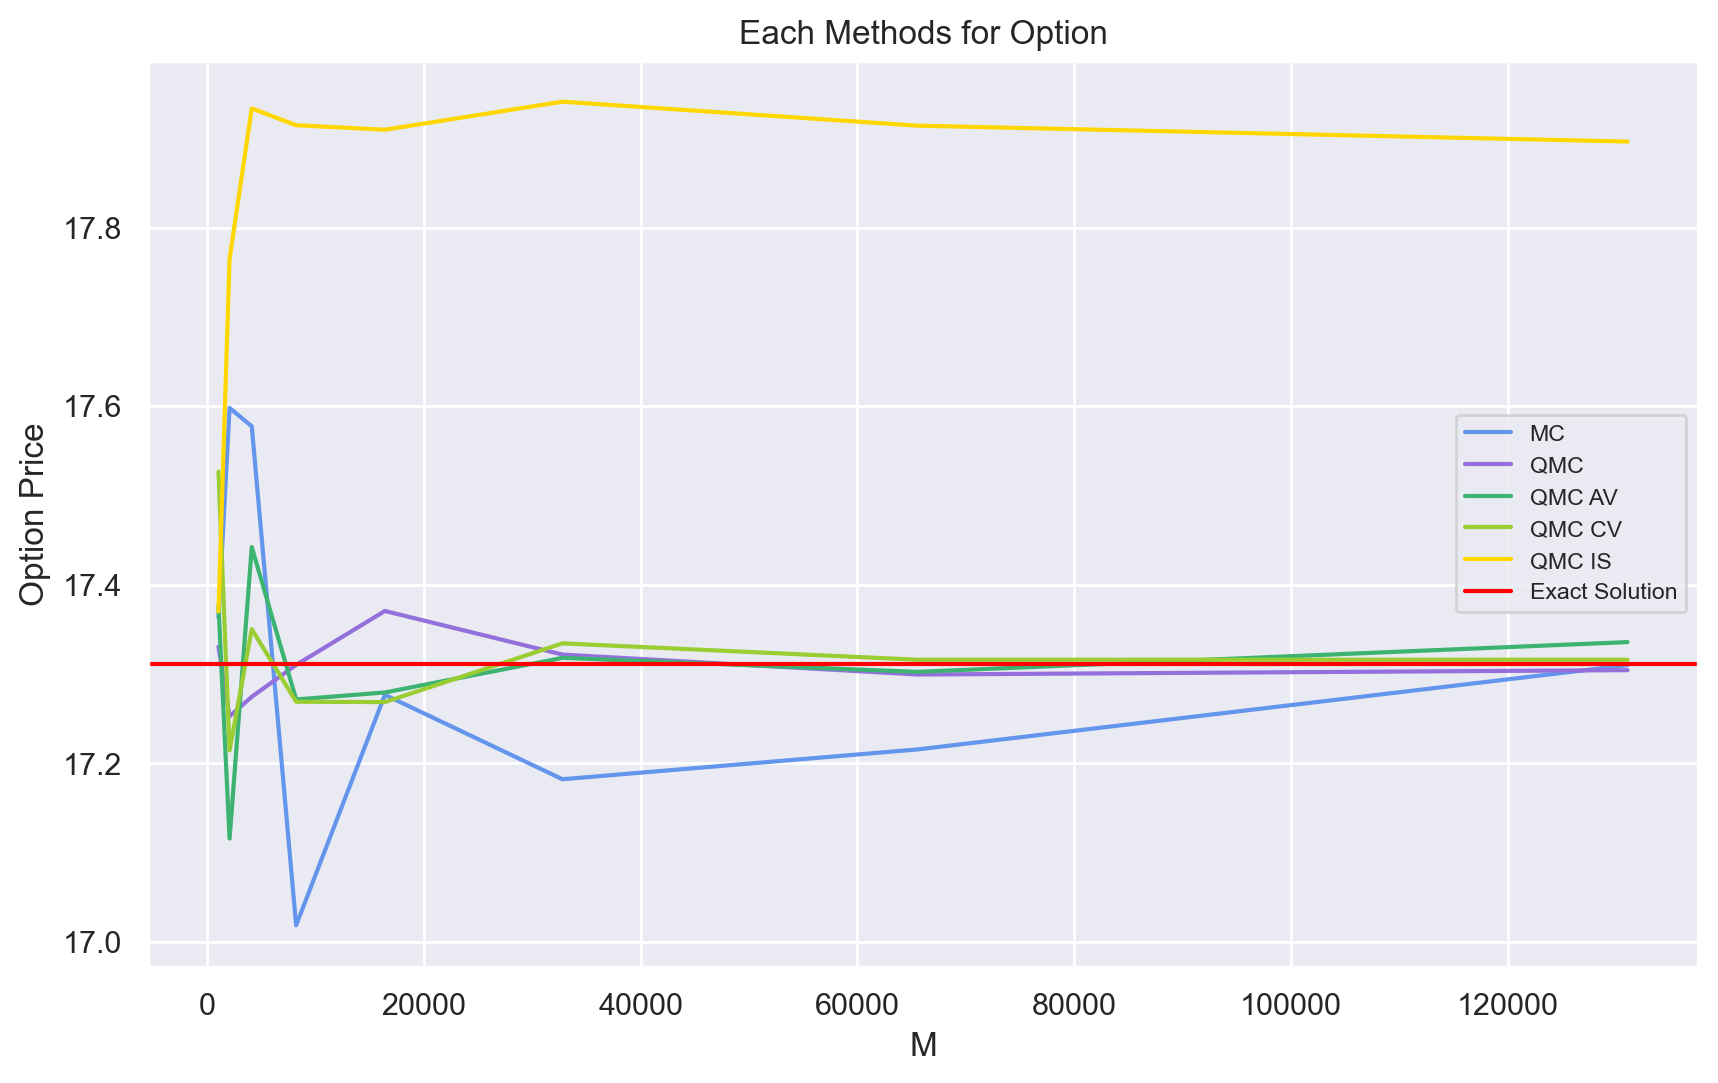

In [1813]:
sns.set()
f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(MC.M, MC['MC Call'], color="cornflowerblue", label="MC", linestyle="-")
ax.plot(QMC.M, QMC['QMC Call'], color="mediumpurple", label="QMC", linestyle="-")
ax.plot(QMC_AV.M, QMC_AV['QMC AV Call'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax.plot(QMC_CV.M,QMC_CV['QMC CV Call'], color="yellowgreen", label="QMC CV", linestyle="-")
ax.plot(QMC_IS.M, QMC_IS['QMC IS Call'], color="gold", label="QMC IS", linestyle="-")
ax.axhline(C0,color = 'red', label="Exact Solution")
ax.set_xlabel('M')
ax.set_ylabel('Option Price')
ax.legend(loc='right', fontsize = 'x-small')
ax.set_title("Each Methods for Option")
plt.show()

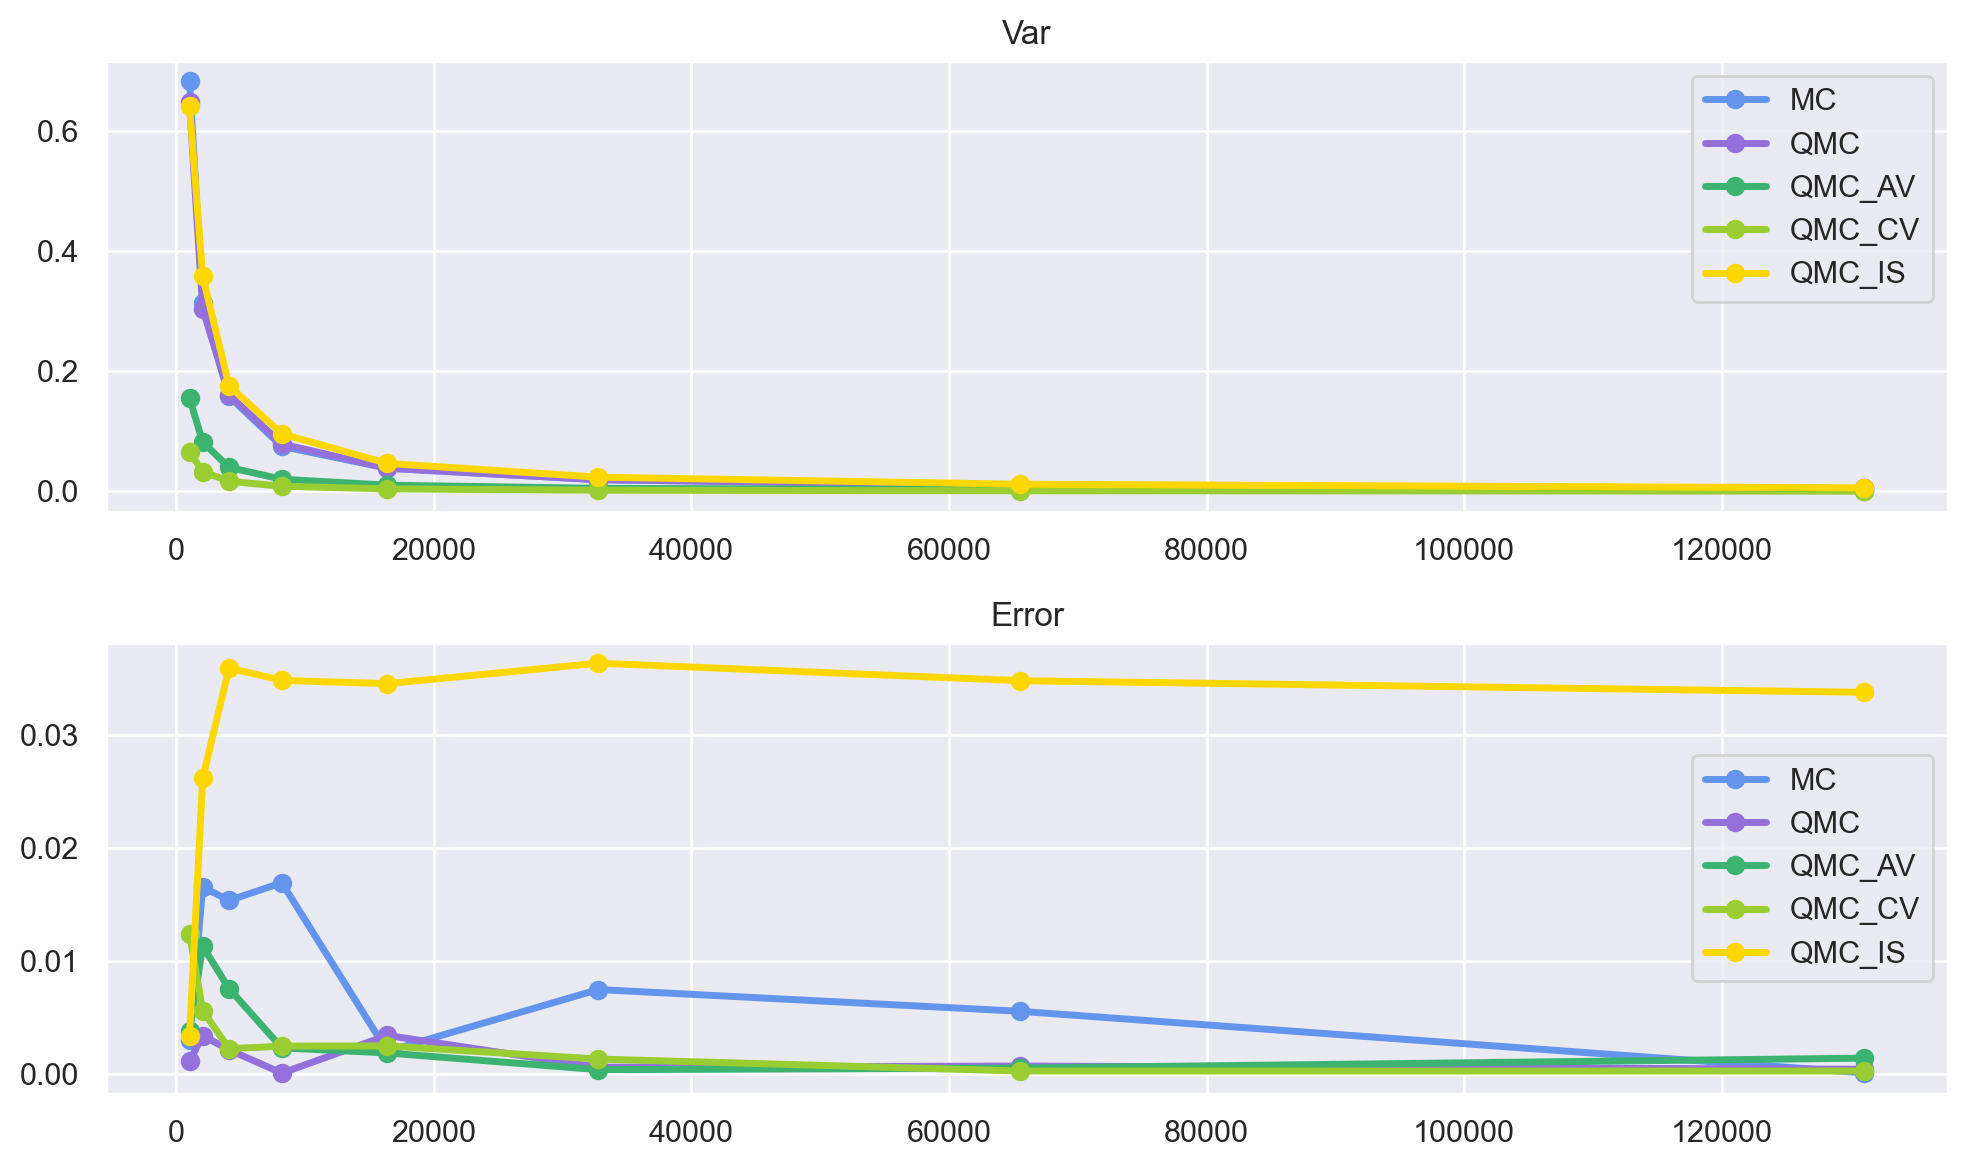

In [1966]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC.M, MC['MC Call Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC.M, QMC['QMC Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AV.M, QMC_AV['QMC AV Call Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_CV.M, QMC_CV['QMC CV Call Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_IS.M, QMC_IS['QMC IS Call Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(MC.M, MC['Call Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC.M, QMC['Call Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV.M, QMC_AV['Call Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_CV.M, QMC_CV['Call Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_IS.M, QMC_IS['Call Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Error')
f.tight_layout()
plt.show()

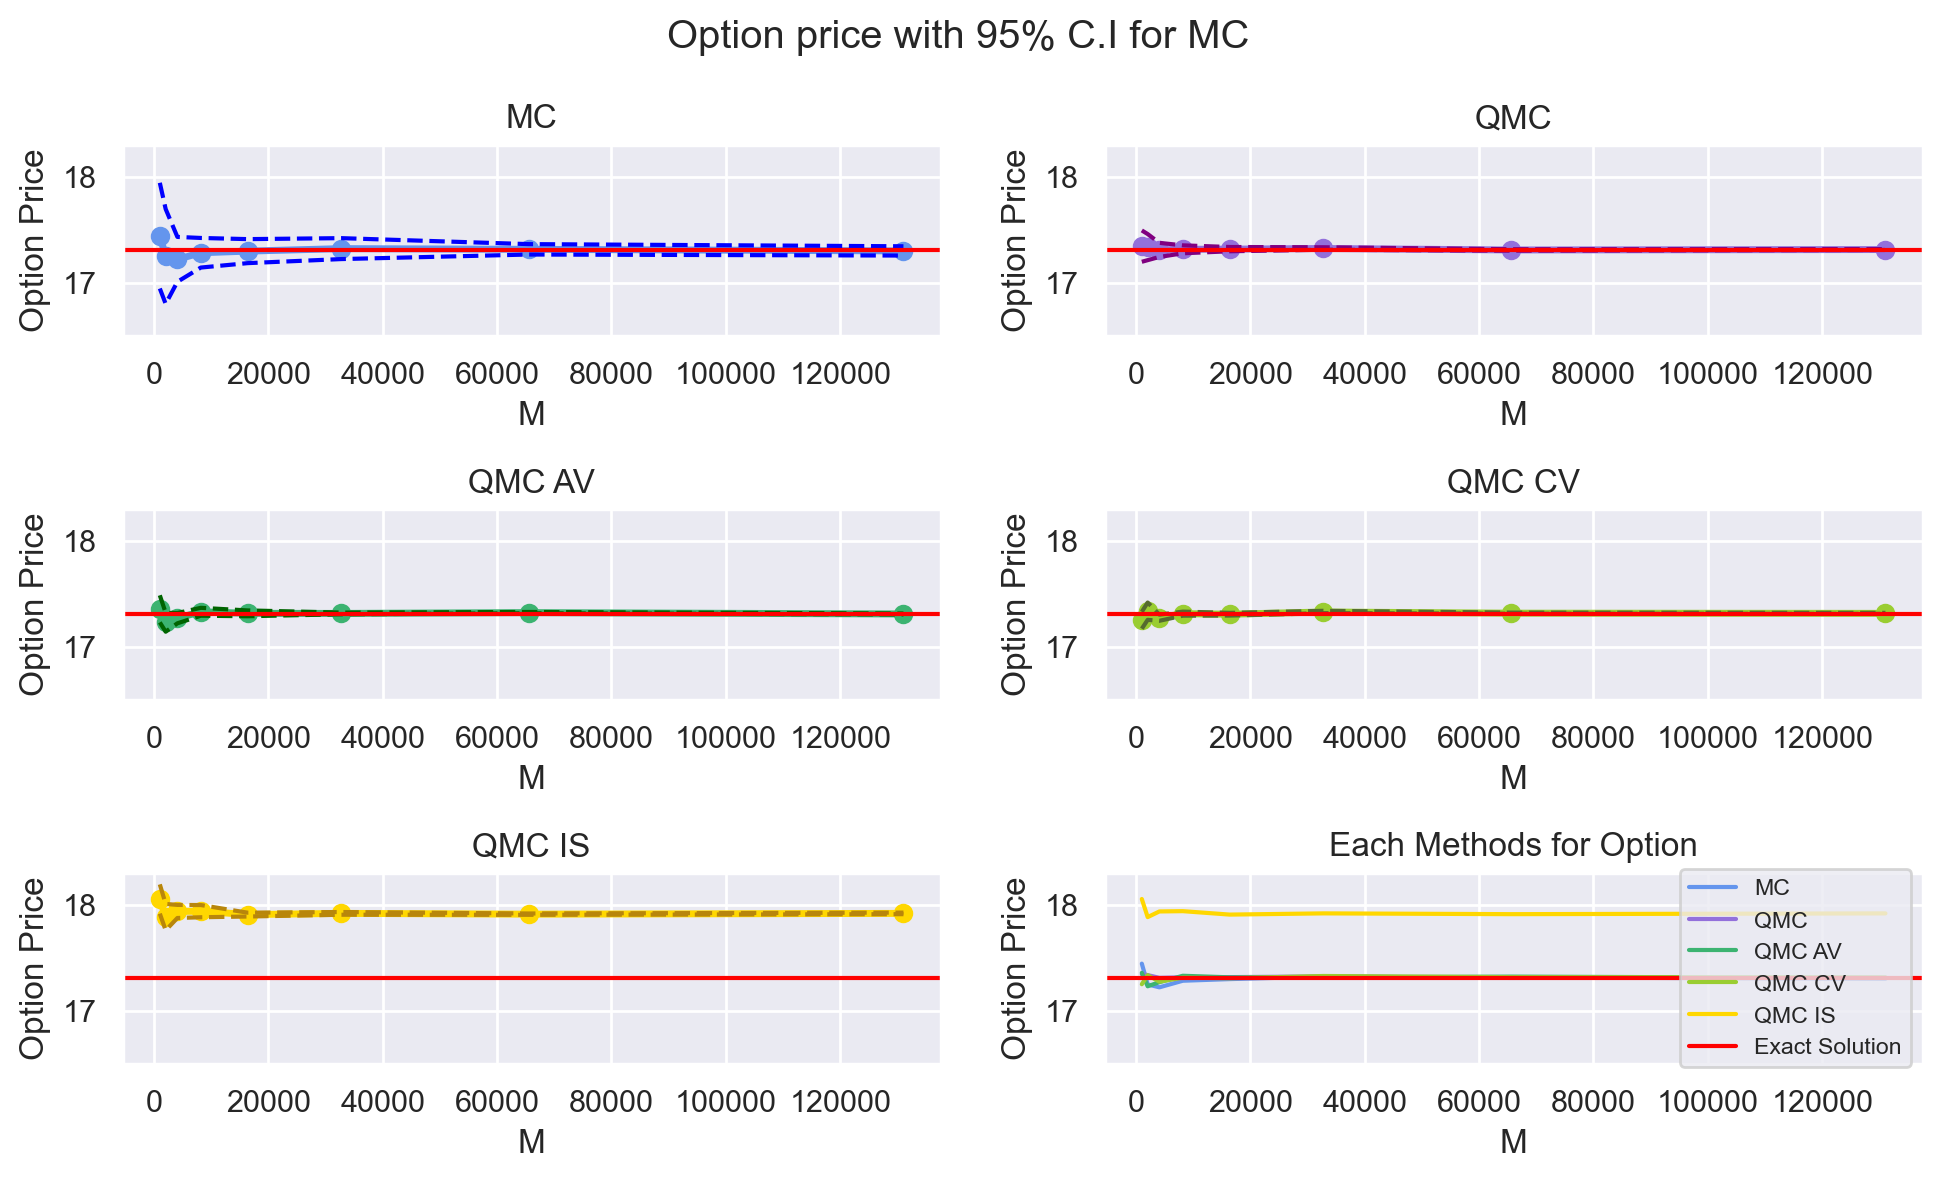

In [1968]:
sns.set()
f, ax = plt.subplots(3, 2,figsize=(10,6))
ax[0,0].plot(MC_10.M, MC_10['MC Call'], color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0,0].plot(MC_10.M, MC_10['MC Call Var Up'], color="Blue", linestyle="--")
ax[0,0].plot(MC_10.M, MC_10['MC Call Var Down'], color="Blue", linestyle="--")
ax[0,0].axhline(C0,color = 'red', label="Exact Solution")
ax[0,0].set_xlabel('M')
ax[0,0].set_ylabel('Option Price')
ax[0,0].set_title("MC")
ax[0,1].plot(QMC_10.M, QMC_10['MC Call'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0,1].plot(QMC_10.M, QMC_10['MC Call Var Up'], color="Purple", linestyle="--")
ax[0,1].plot(QMC_10.M, QMC_10['MC Call Var Down'], color="Purple", linestyle="--")
ax[0,1].axhline(C0,color = 'red', label="Exact Solution")
ax[0,1].set_xlabel('M')
ax[0,1].set_ylabel('Option Price')
ax[0,1].set_title("QMC")
ax[1,0].plot(QMC_AV_10.M, QMC_AV_10['MC Call'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,0].plot(QMC_AV_10.M, QMC_AV_10['MC Call Var Up'], color="darkgreen", linestyle="--")
ax[1,0].plot(QMC_AV_10.M, QMC_AV_10['MC Call Var Down'], color="darkgreen", linestyle="--")
ax[1,0].axhline(C0,color = 'red', label="Exact Solution")
ax[1,0].set_xlabel('M')
ax[1,0].set_ylabel('Option Price')
ax[1,0].set_title("QMC AV")
ax[1,1].plot(QMC_CV_10.M, QMC_CV_10['MC Call'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,1].plot(QMC_CV_10.M, QMC_CV_10['MC Call Var Up'], color="darkolivegreen", linestyle="--")
ax[1,1].plot(QMC_CV_10.M, QMC_CV_10['MC Call Var Down'], color="darkolivegreen", linestyle="--")
ax[1,1].axhline(C0,color = 'red', label="Exact Solution")
ax[1,1].set_xlabel('M')
ax[1,1].set_ylabel('Option Price')
ax[1,1].set_title("QMC CV")
ax[2,0].plot(QMC_IS_10.M, QMC_IS_10['MC Call'], color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[2,0].plot(QMC_IS_10.M, QMC_IS_10['MC Call Var Up'], color="darkgoldenrod", linestyle="--")
ax[2,0].plot(QMC_IS_10.M, QMC_IS_10['MC Call Var Down'], color="darkgoldenrod", linestyle="--")
ax[2,0].axhline(C0,color = 'red', label="Exact Solution")
ax[2,0].set_xlabel('M')
ax[2,0].set_ylabel('Option Price')
ax[2,0].set_title("QMC IS")
ax[2,1].plot(MC_10.M, MC_10['MC Call'], color="cornflowerblue", label="MC", linestyle="-")
ax[2,1].plot(QMC_10.M, QMC_10['MC Call'], color="mediumpurple", label="QMC", linestyle="-")
ax[2,1].plot(QMC_AV_10.M, QMC_AV_10['MC Call'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax[2,1].plot(QMC_CV_10.M,QMC_CV_10['MC Call'], color="yellowgreen", label="QMC CV", linestyle="-")
ax[2,1].plot(QMC_IS_10.M, QMC_IS_10['MC Call'], color="gold", label="QMC IS", linestyle="-")
ax[2,1].axhline(C0,color = 'red', label="Exact Solution")
ax[2,1].set_xlabel('M')
ax[2,1].set_ylabel('Option Price')
ax[2,1].legend(loc='right', fontsize = 'x-small')
ax[2,1].set_title("Each Methods for Option")

ax[0,0].set(ylim=(16.5,18.3))
ax[0,1].set(ylim=(16.5,18.3))
ax[1,0].set(ylim=(16.5,18.3))
ax[1,1].set(ylim=(16.5,18.3))
ax[2,0].set(ylim=(16.5,18.3))
ax[2,1].set(ylim=(16.5,18.3))

f.suptitle('Option price with 95% C.I for MC')
f.tight_layout()
plt.show()

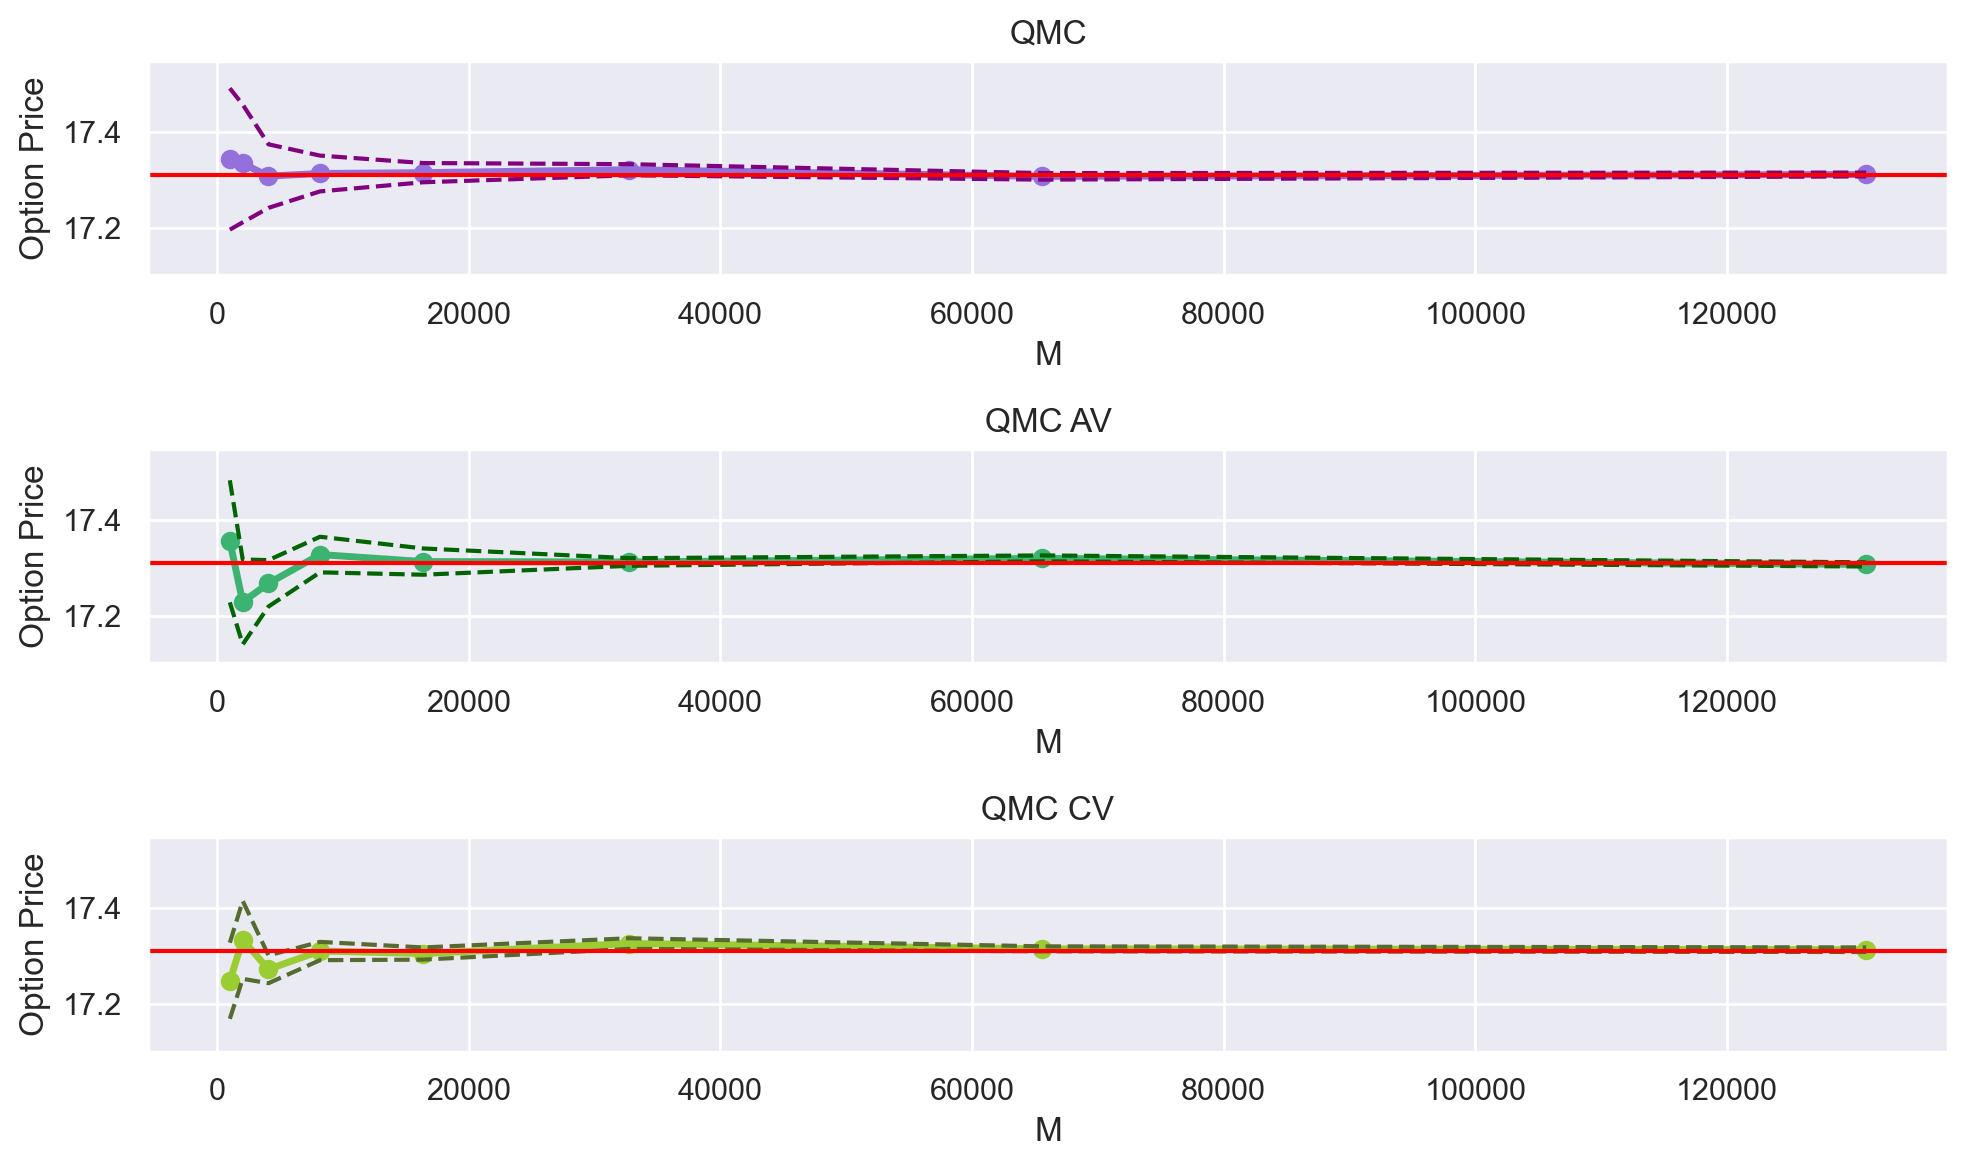

In [1787]:
sns.set()
f, ax = plt.subplots(3, 1,figsize=(10,6))
ax[0].plot(QMC_10.M, QMC_10['MC Call'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_10.M, QMC_10['MC Call Var Up'], color="Purple", linestyle="--")
ax[0].plot(QMC_10.M, QMC_10['MC Call Var Down'], color="Purple", linestyle="--")
ax[0].axhline(C0,color = 'red', label="Exact Solution")
ax[0].set_xlabel('M')
ax[0].set_ylabel('Option Price')
ax[0].set_title("QMC")
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Call'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Call Var Up'], color="darkgreen", linestyle="--")
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Call Var Down'], color="darkgreen", linestyle="--")
ax[1].axhline(C0,color = 'red', label="Exact Solution")
ax[1].set_xlabel('M')
ax[1].set_ylabel('Option Price')
ax[1].set_title("QMC AV")
ax[2].plot(QMC_CV_10.M, QMC_CV_10['MC Call'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[2].plot(QMC_CV_10.M, QMC_CV_10['MC Call Var Up'], color="darkolivegreen", linestyle="--")
ax[2].plot(QMC_CV_10.M, QMC_CV_10['MC Call Var Down'], color="darkolivegreen", linestyle="--")
ax[2].axhline(C0,color = 'red', label="Exact Solution")
ax[2].set_xlabel('M')
ax[2].set_ylabel('Option Price')
ax[2].set_title("QMC CV")

ax[0].set(ylim=(17.1,17.55))
ax[1].set(ylim=(17.1,17.55))
ax[2].set(ylim=(17.1,17.55))
f.tight_layout()
plt.show()

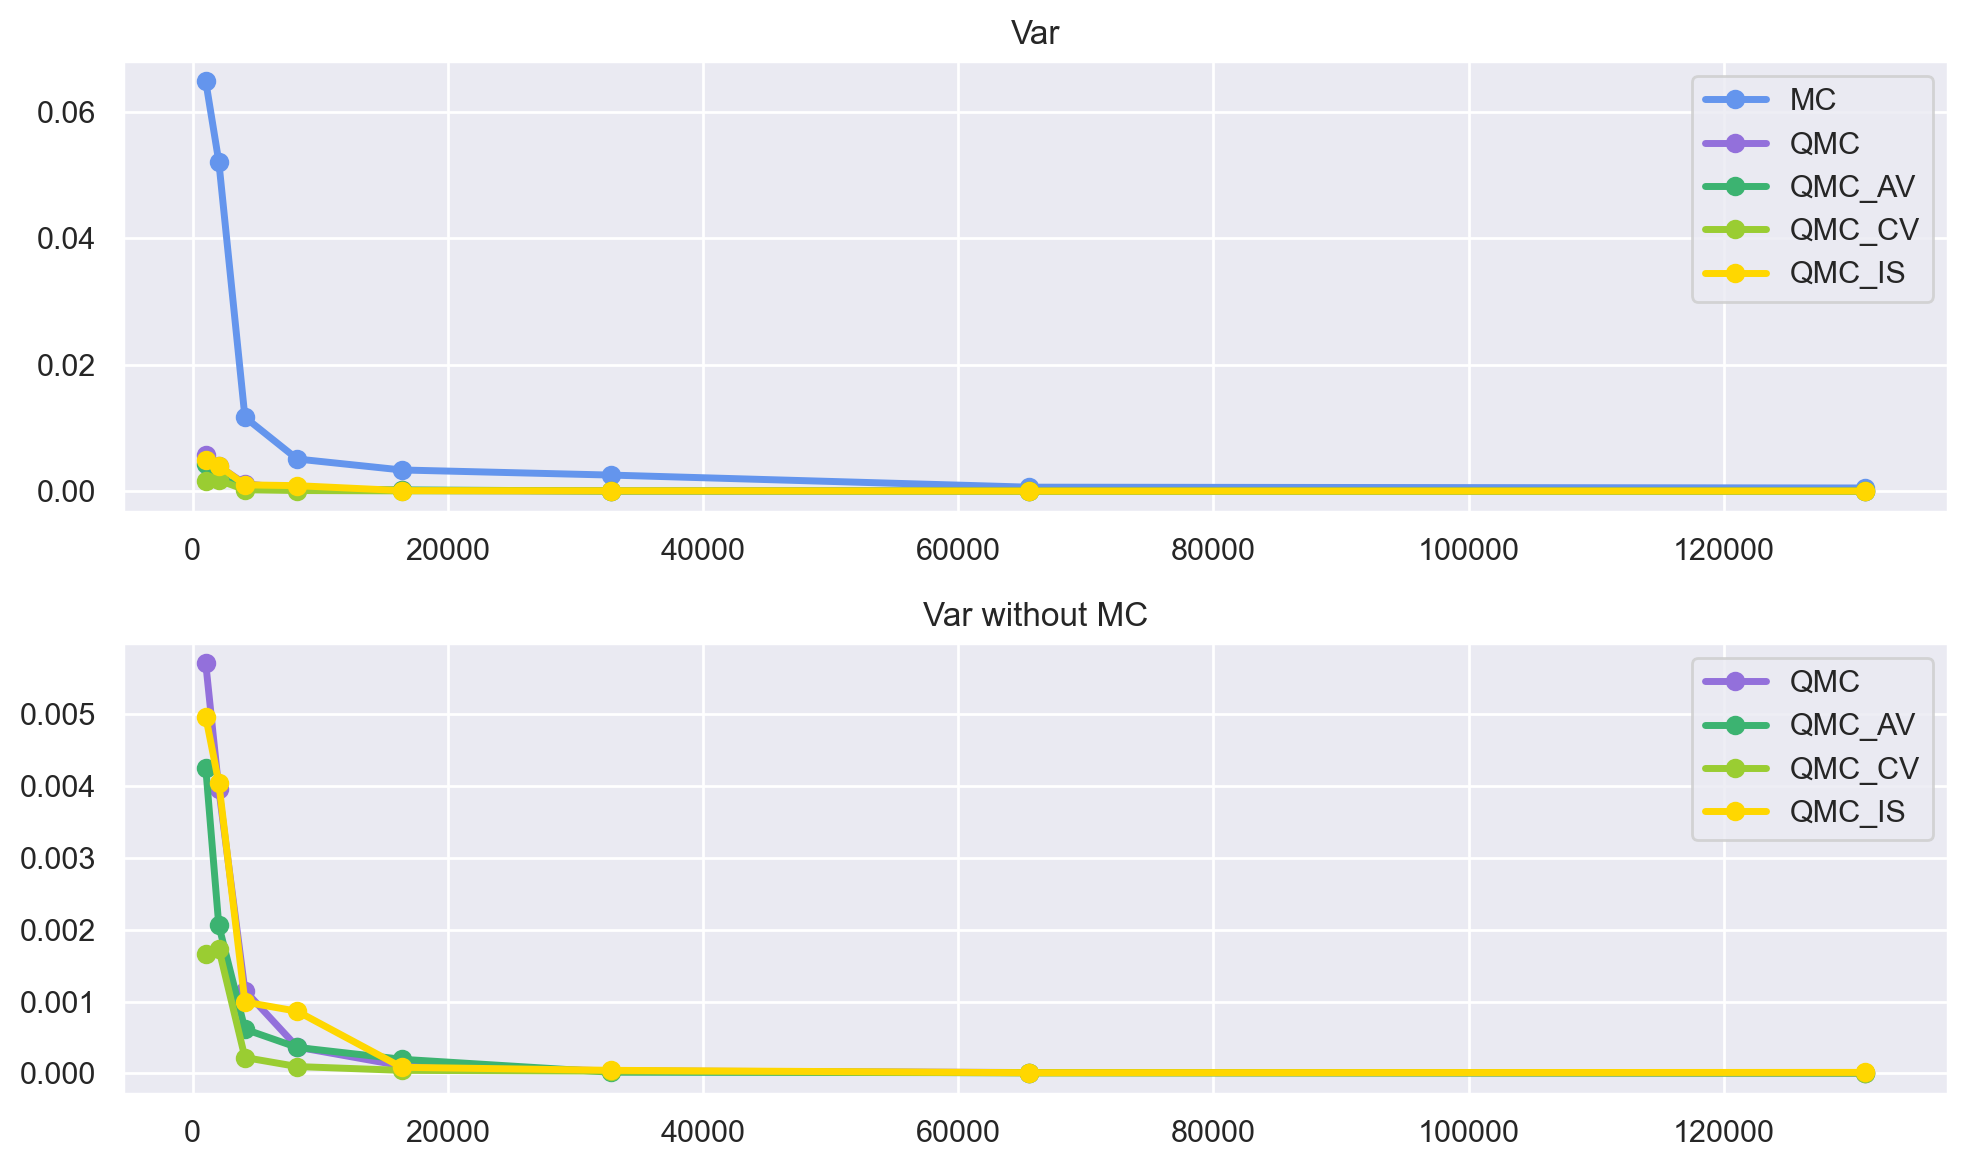

In [1970]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_10.M, MC_10['MC Call Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_10.M, QMC_10['MC Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AV_10.M, QMC_AV_10['MC Call Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_CV_10.M, QMC_CV_10['MC Call Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_IS_10.M, QMC_IS_10['MC Call Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(QMC_10.M, QMC_10['MC Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Call Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_CV_10.M, QMC_CV_10['MC Call Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_IS_10.M, QMC_IS_10['MC Call Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Var without MC')
f.tight_layout()
plt.show()

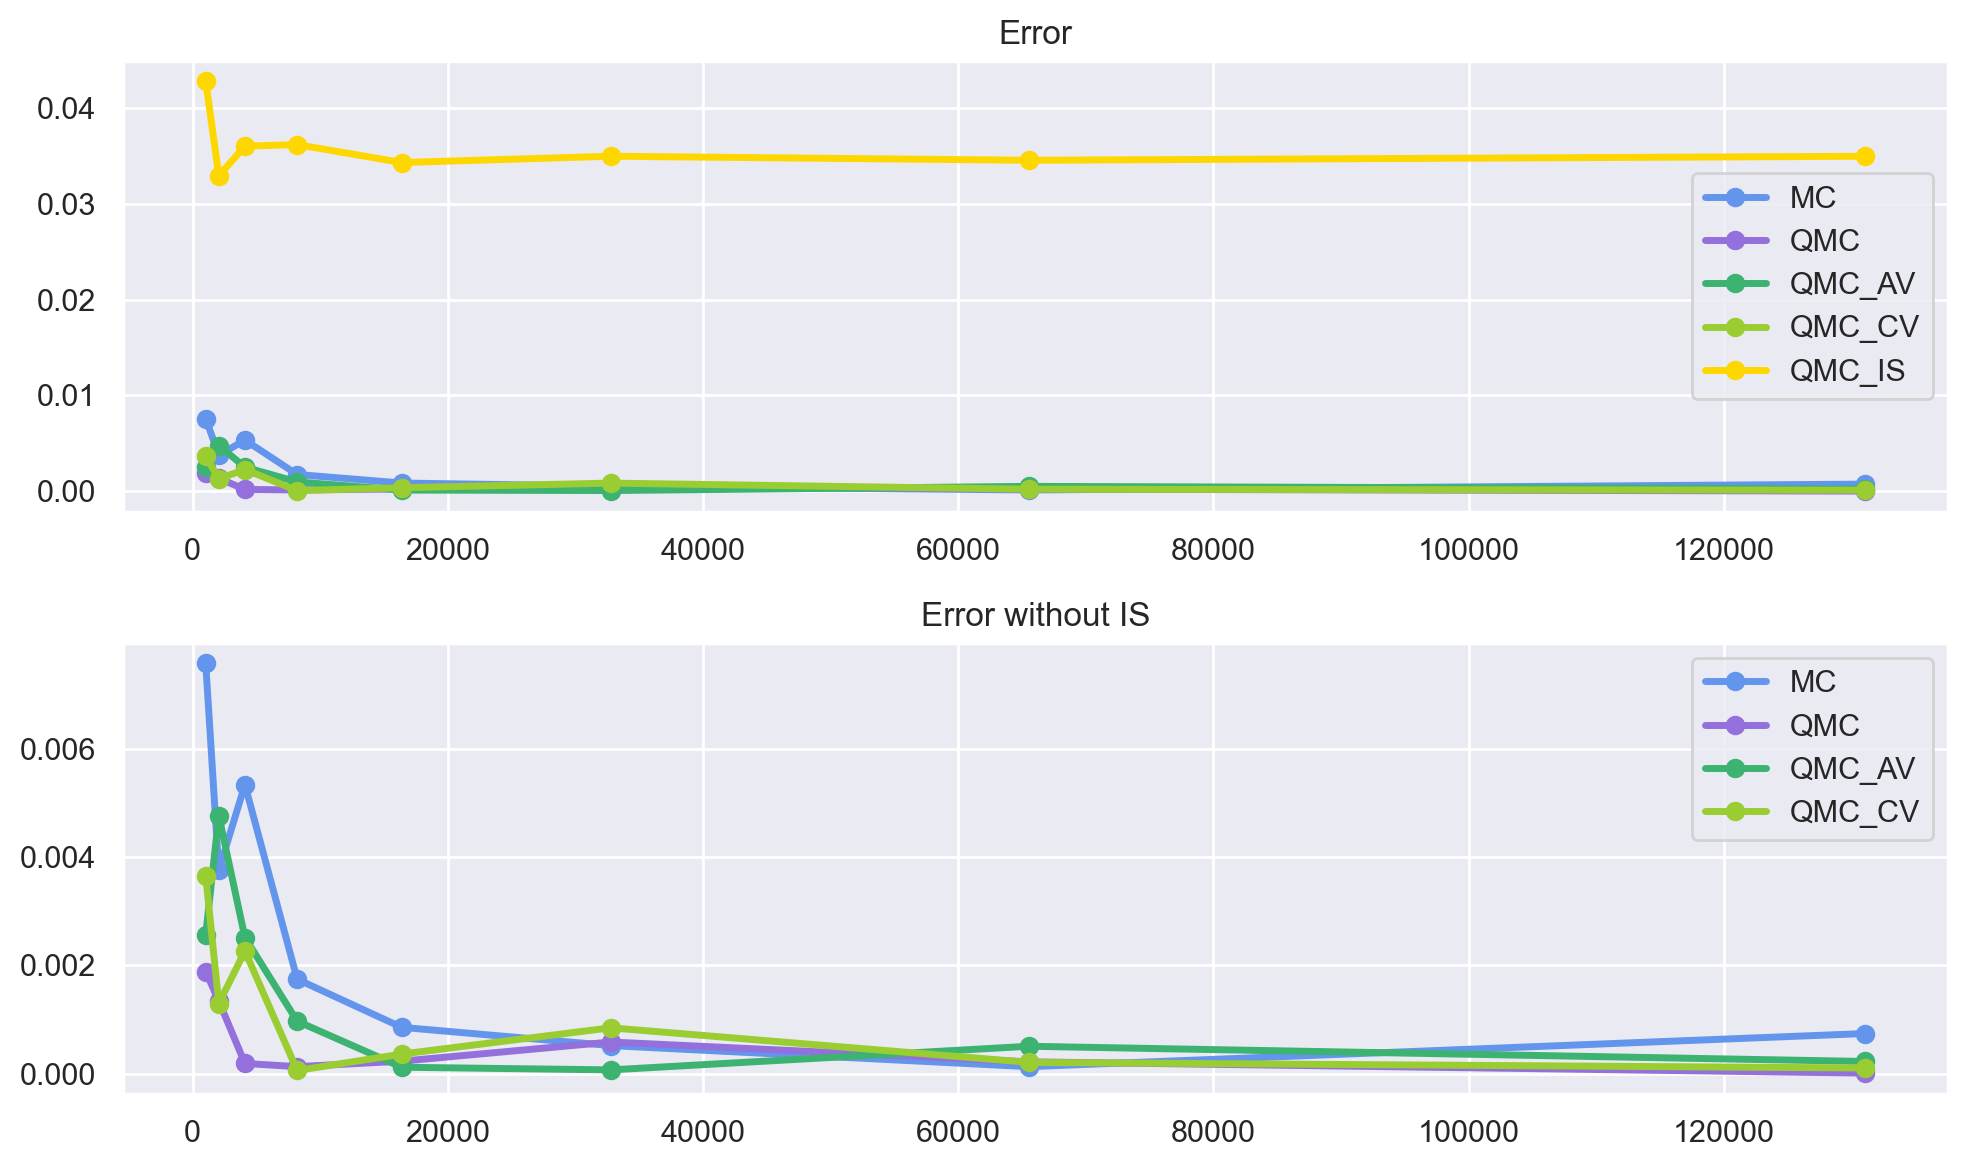

In [1971]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_10.M, MC_10['Call Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_10.M, QMC_10['Call Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AV_10.M, QMC_AV_10['Call Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_CV_10.M, QMC_CV_10['Call Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_IS_10.M, QMC_IS_10['Call Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Error')
ax[1].plot(MC_10.M, MC_10['Call Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_10.M, QMC_10['Call Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV_10.M, QMC_AV_10['Call Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_CV_10.M, QMC_CV_10['Call Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Error without IS')
f.tight_layout()
plt.show()

### Put 

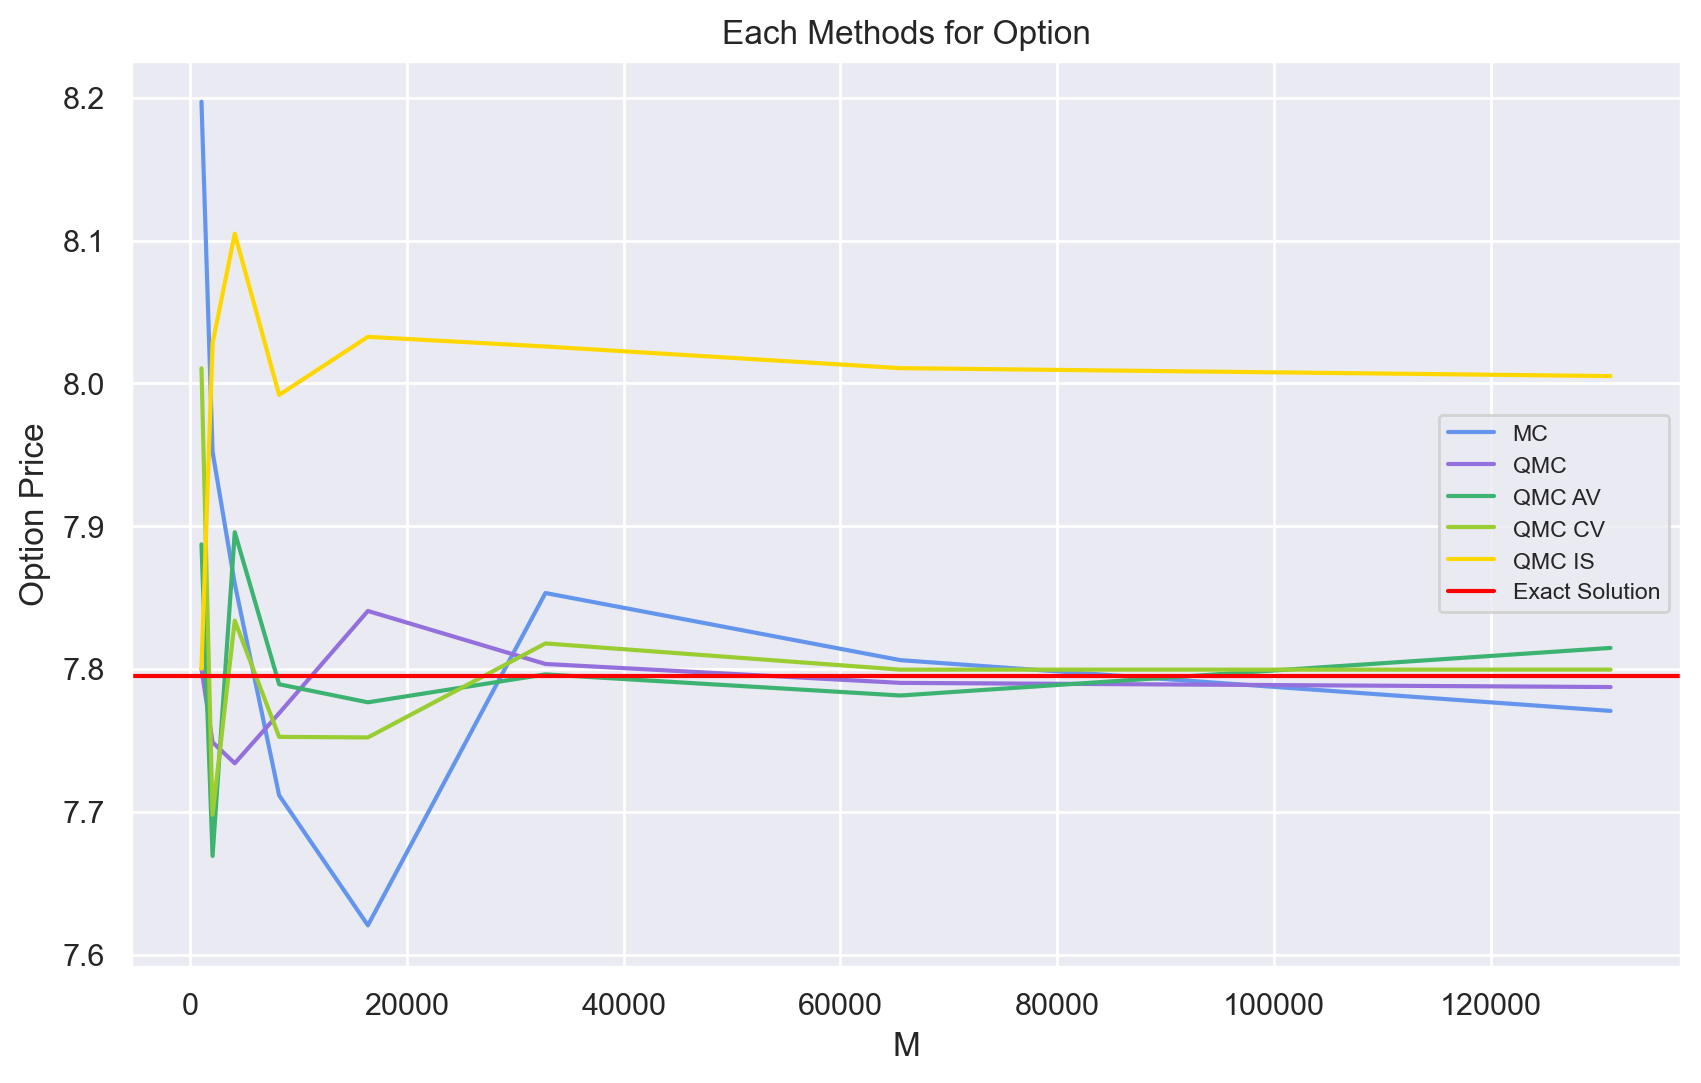

In [1835]:
sns.set()
f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(MC.M, MC['MC Put'], color="cornflowerblue", label="MC", linestyle="-")
ax.plot(QMC.M, QMC['QMC Put'], color="mediumpurple", label="QMC", linestyle="-")
ax.plot(QMC_AV.M, QMC_AV['QMC AV Put'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax.plot(QMC_CV.M,QMC_CV['QMC CV Put'], color="yellowgreen", label="QMC CV", linestyle="-")
ax.plot(QMC_IS.M, QMC_IS['QMC IS Put'], color="gold", label="QMC IS", linestyle="-")
ax.axhline(P0,color = 'red', label="Exact Solution")
ax.set_xlabel('M')
ax.set_ylabel('Option Price')
ax.legend(loc='right', fontsize = 'x-small')
ax.set_title("Each Methods for Option")
plt.show()

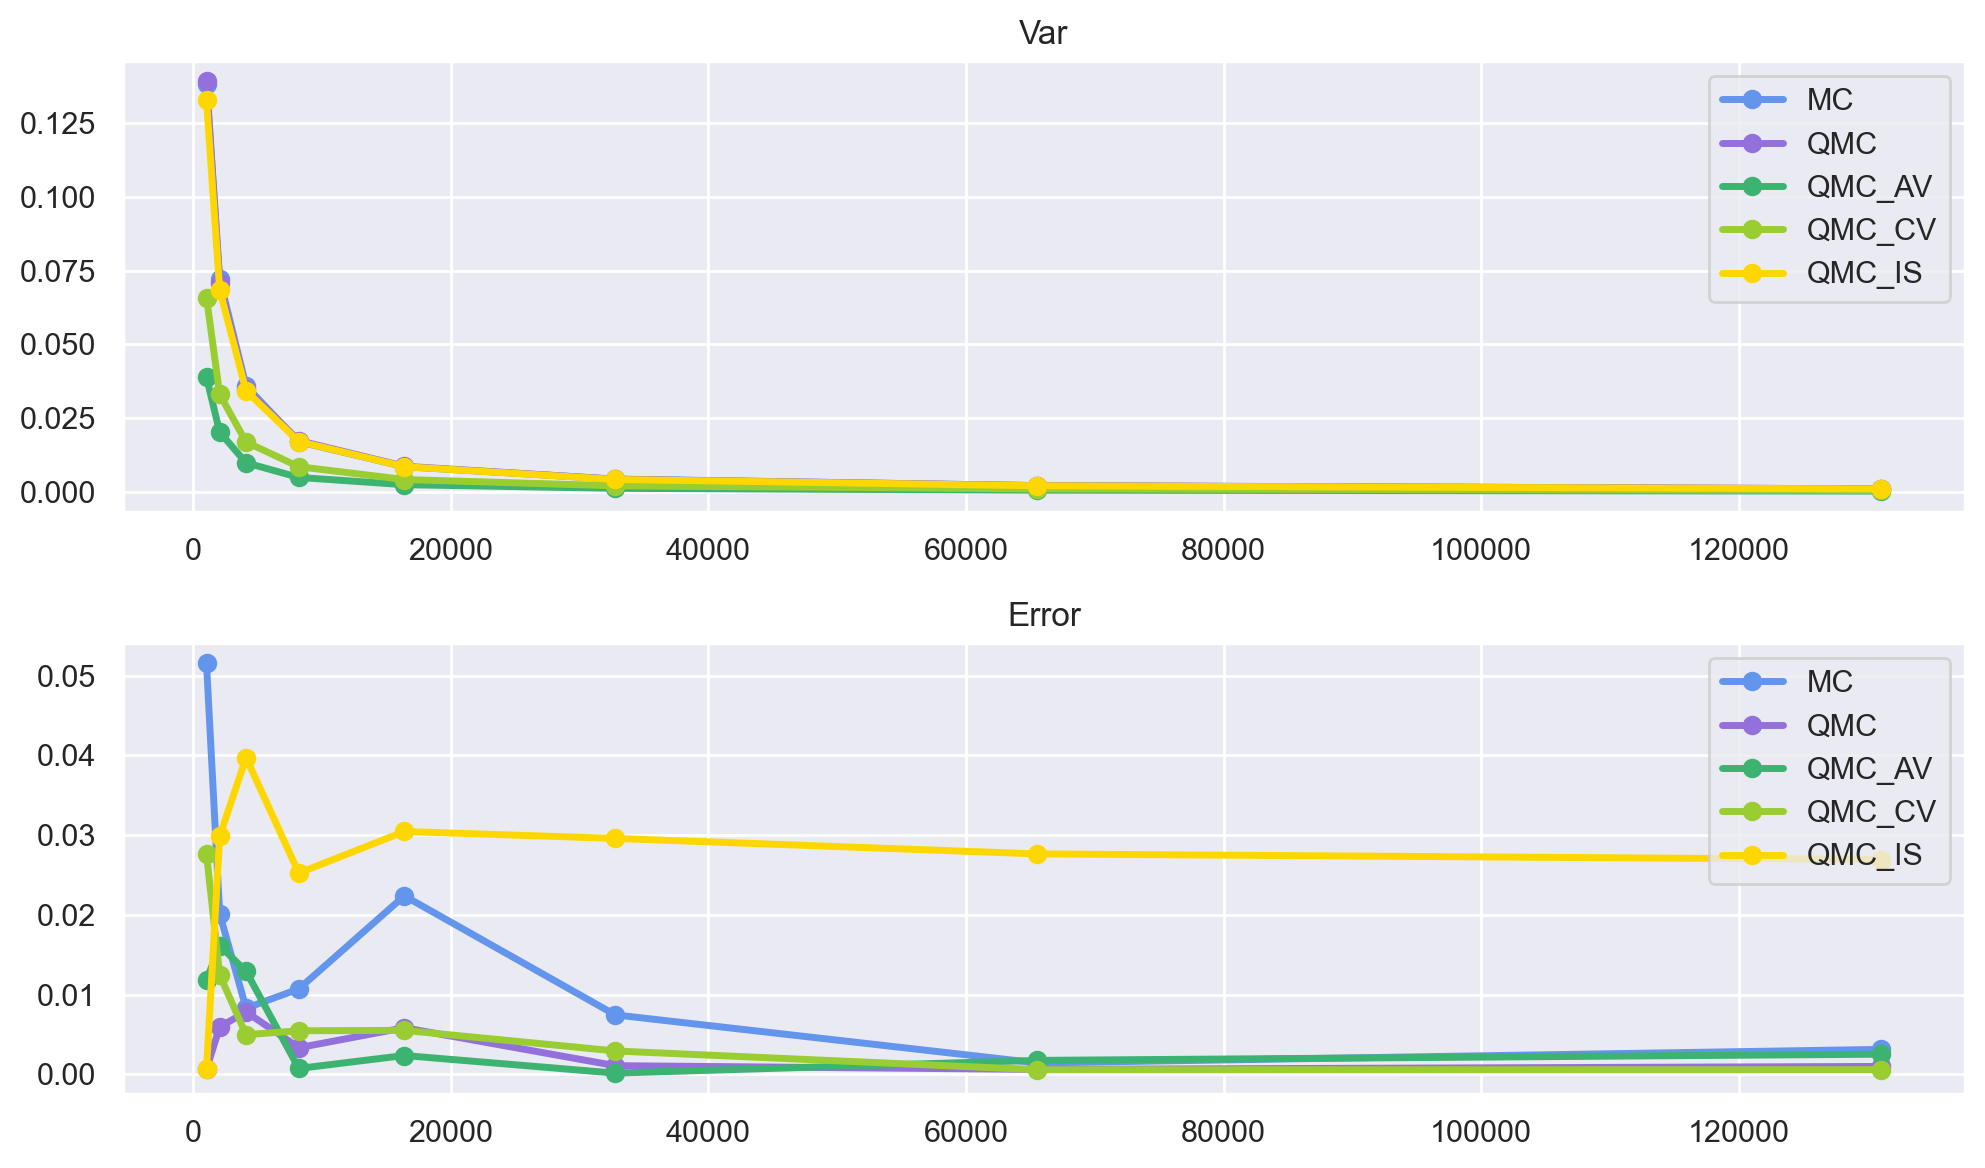

In [1972]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC.M, MC['MC Put Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC.M, QMC['QMC Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AV.M, QMC_AV['QMC AV Put Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_CV.M, QMC_CV['QMC CV Put Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_IS.M, QMC_IS['QMC IS Put Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(MC.M, MC['Put Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC.M, QMC['Put Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV.M, QMC_AV['Put Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_CV.M, QMC_CV['Put Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_IS.M, QMC_IS['Put Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Error')
f.tight_layout()
plt.show()

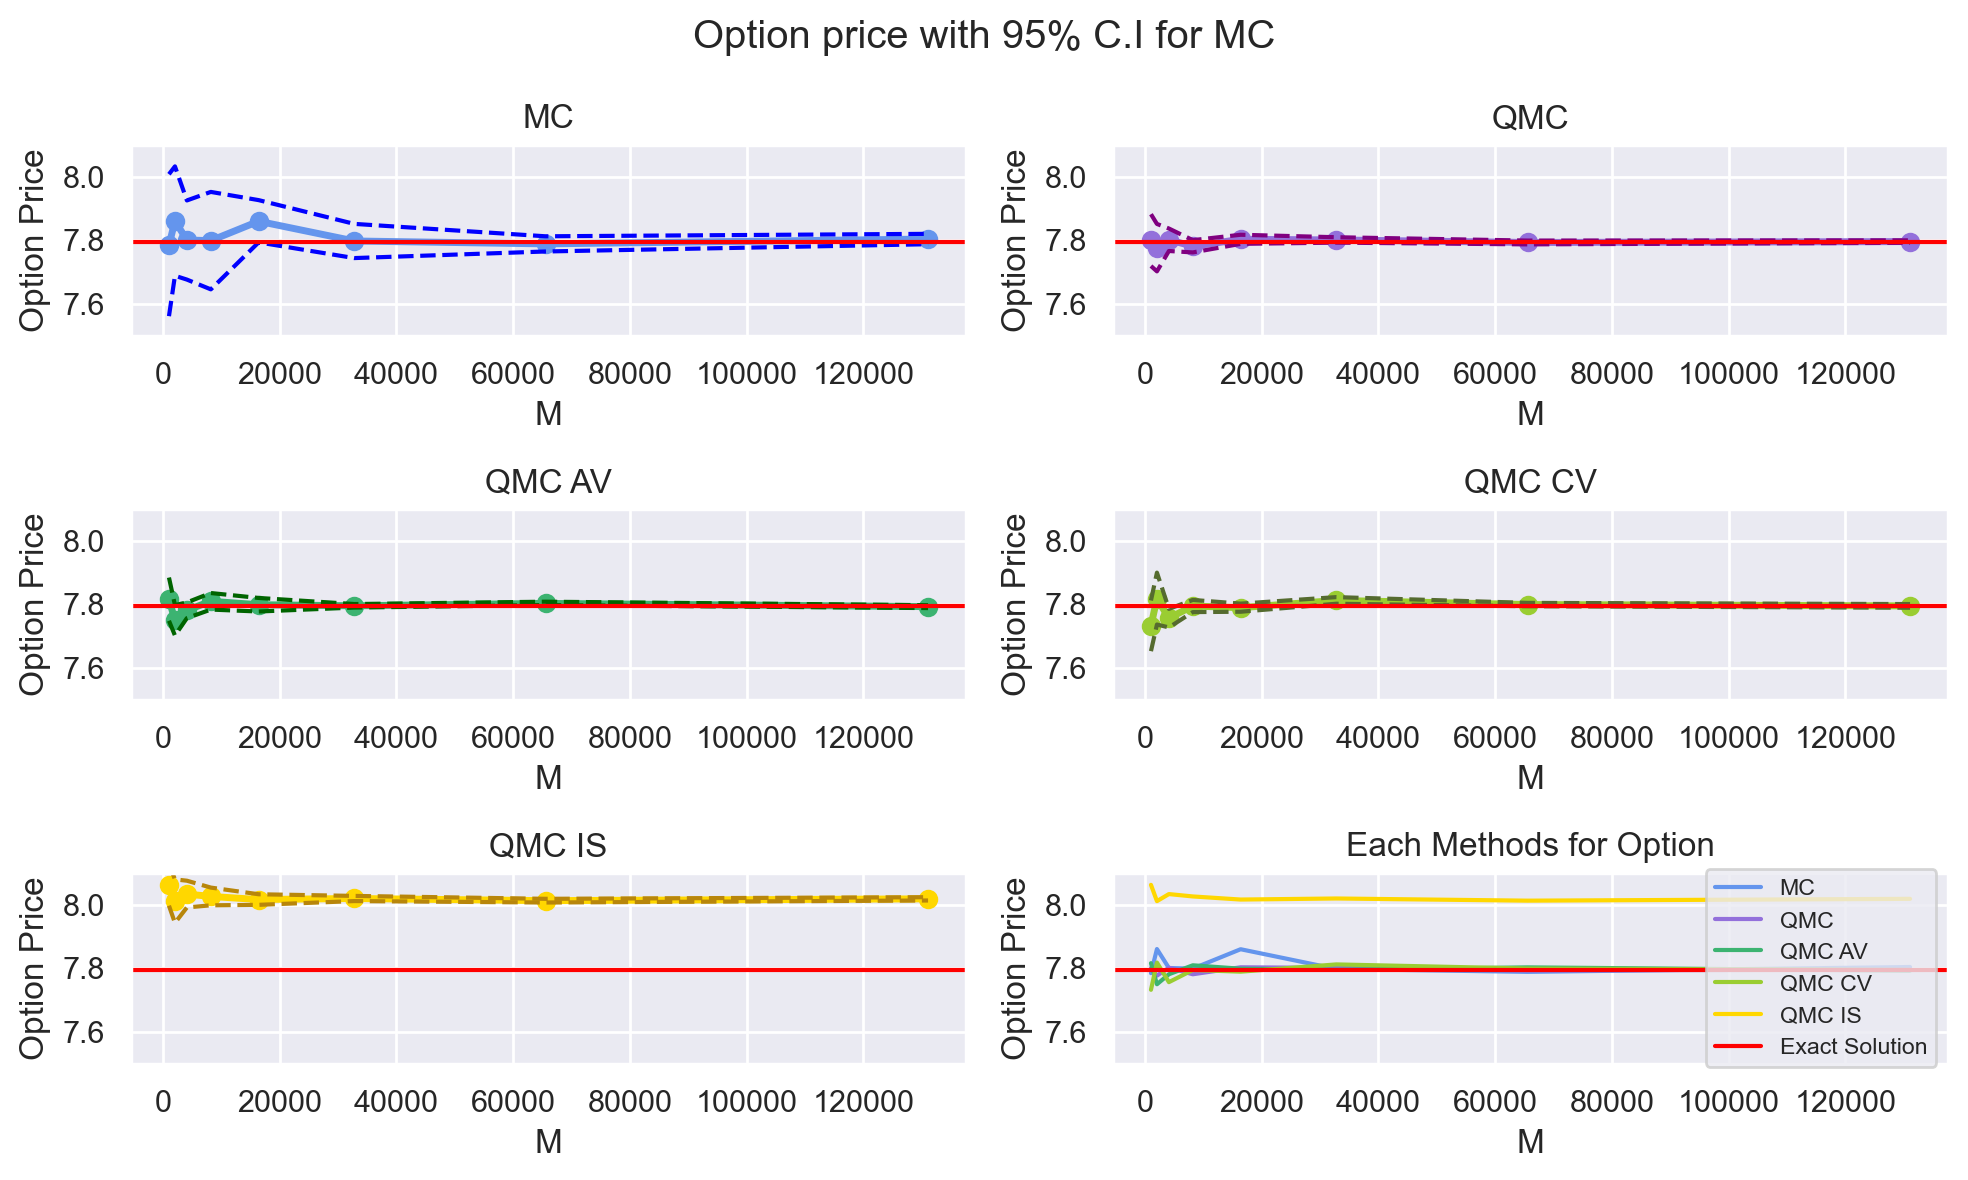

In [1973]:
sns.set()
f, ax = plt.subplots(3, 2,figsize=(10,6))
ax[0,0].plot(MC_10.M, MC_10['MC Put'], color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0,0].plot(MC_10.M, MC_10['MC Put Var Up'], color="Blue", linestyle="--")
ax[0,0].plot(MC_10.M, MC_10['MC Put Var Down'], color="Blue", linestyle="--")
ax[0,0].axhline(P0,color = 'red', label="Exact Solution")
ax[0,0].set_xlabel('M')
ax[0,0].set_ylabel('Option Price')
ax[0,0].set_title("MC")
ax[0,1].plot(QMC_10.M, QMC_10['MC Put'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0,1].plot(QMC_10.M, QMC_10['MC Put Var Up'], color="Purple", linestyle="--")
ax[0,1].plot(QMC_10.M, QMC_10['MC Put Var Down'], color="Purple", linestyle="--")
ax[0,1].axhline(P0,color = 'red', label="Exact Solution")
ax[0,1].set_xlabel('M')
ax[0,1].set_ylabel('Option Price')
ax[0,1].set_title("QMC")
ax[1,0].plot(QMC_AV_10.M, QMC_AV_10['MC Put'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,0].plot(QMC_AV_10.M, QMC_AV_10['MC Put Var Up'], color="darkgreen", linestyle="--")
ax[1,0].plot(QMC_AV_10.M, QMC_AV_10['MC Put Var Down'], color="darkgreen", linestyle="--")
ax[1,0].axhline(P0,color = 'red', label="Exact Solution")
ax[1,0].set_xlabel('M')
ax[1,0].set_ylabel('Option Price')
ax[1,0].set_title("QMC AV")
ax[1,1].plot(QMC_CV_10.M, QMC_CV_10['MC Put'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,1].plot(QMC_CV_10.M, QMC_CV_10['MC Put Var Up'], color="darkolivegreen", linestyle="--")
ax[1,1].plot(QMC_CV_10.M, QMC_CV_10['MC Put Var Down'], color="darkolivegreen", linestyle="--")
ax[1,1].axhline(P0,color = 'red', label="Exact Solution")
ax[1,1].set_xlabel('M')
ax[1,1].set_ylabel('Option Price')
ax[1,1].set_title("QMC CV")
ax[2,0].plot(QMC_IS_10.M, QMC_IS_10['MC Put'], color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[2,0].plot(QMC_IS_10.M, QMC_IS_10['MC Put Var Up'], color="darkgoldenrod", linestyle="--")
ax[2,0].plot(QMC_IS_10.M, QMC_IS_10['MC Put Var Down'], color="darkgoldenrod", linestyle="--")
ax[2,0].axhline(P0,color = 'red', label="Exact Solution")
ax[2,0].set_xlabel('M')
ax[2,0].set_ylabel('Option Price')
ax[2,0].set_title("QMC IS")
ax[2,1].plot(MC_10.M, MC_10['MC Put'], color="cornflowerblue", label="MC", linestyle="-")
ax[2,1].plot(QMC_10.M, QMC_10['MC Put'], color="mediumpurple", label="QMC", linestyle="-")
ax[2,1].plot(QMC_AV_10.M, QMC_AV_10['MC Put'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax[2,1].plot(QMC_CV_10.M,QMC_CV_10['MC Put'], color="yellowgreen", label="QMC CV", linestyle="-")
ax[2,1].plot(QMC_IS_10.M, QMC_IS_10['MC Put'], color="gold", label="QMC IS", linestyle="-")
ax[2,1].axhline(P0,color = 'red', label="Exact Solution")
ax[2,1].set_xlabel('M')
ax[2,1].set_ylabel('Option Price')
ax[2,1].legend(loc='right', fontsize = 'x-small')
ax[2,1].set_title("Each Methods for Option")

ax[0,0].set(ylim=(7.5,8.1))
ax[0,1].set(ylim=(7.5,8.1))
ax[1,0].set(ylim=(7.5,8.1))
ax[1,1].set(ylim=(7.5,8.1))
ax[2,0].set(ylim=(7.5,8.1))
ax[2,1].set(ylim=(7.5,8.1))
f.suptitle('Option price with 95% C.I for MC')
f.tight_layout()
plt.show()

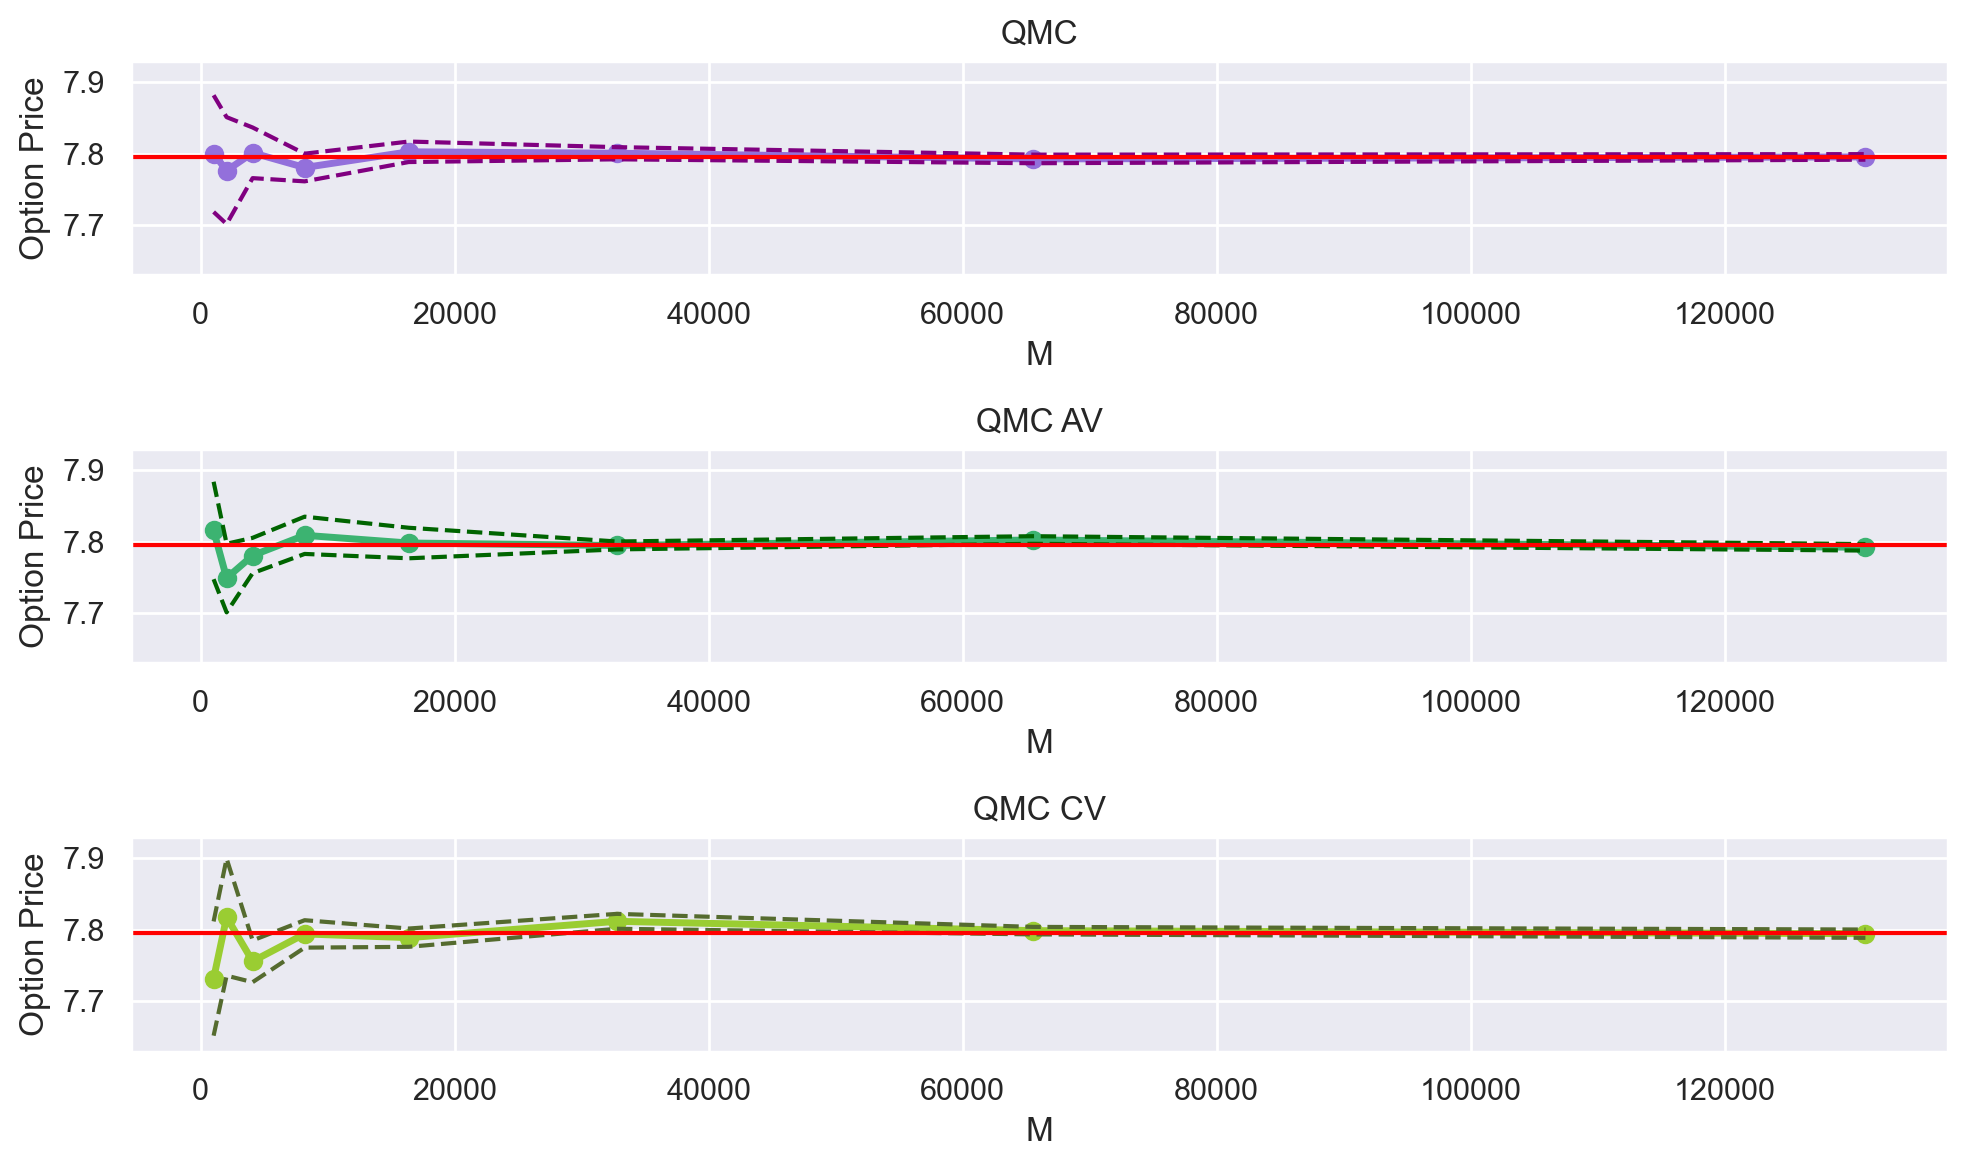

In [1846]:
sns.set()
f, ax = plt.subplots(3, 1,figsize=(10,6))
ax[0].plot(QMC_10.M, QMC_10['MC Put'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_10.M, QMC_10['MC Put Var Up'], color="Purple", linestyle="--")
ax[0].plot(QMC_10.M, QMC_10['MC Put Var Down'], color="Purple", linestyle="--")
ax[0].axhline(P0,color = 'red', label="Exact Solution")
ax[0].set_xlabel('M')
ax[0].set_ylabel('Option Price')
ax[0].set_title("QMC")
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Put'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Put Var Up'], color="darkgreen", linestyle="--")
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Put Var Down'], color="darkgreen", linestyle="--")
ax[1].axhline(P0,color = 'red', label="Exact Solution")
ax[1].set_xlabel('M')
ax[1].set_ylabel('Option Price')
ax[1].set_title("QMC AV")
ax[2].plot(QMC_CV_10.M, QMC_CV_10['MC Put'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[2].plot(QMC_CV_10.M, QMC_CV_10['MC Put Var Up'], color="darkolivegreen", linestyle="--")
ax[2].plot(QMC_CV_10.M, QMC_CV_10['MC Put Var Down'], color="darkolivegreen", linestyle="--")
ax[2].axhline(P0,color = 'red', label="Exact Solution")
ax[2].set_xlabel('M')
ax[2].set_ylabel('Option Price')
ax[2].set_title("QMC CV")

ax[0].set(ylim=(7.63,7.93))
ax[1].set(ylim=(7.63,7.93))
ax[2].set(ylim=(7.63,7.93))
f.tight_layout()
plt.show()

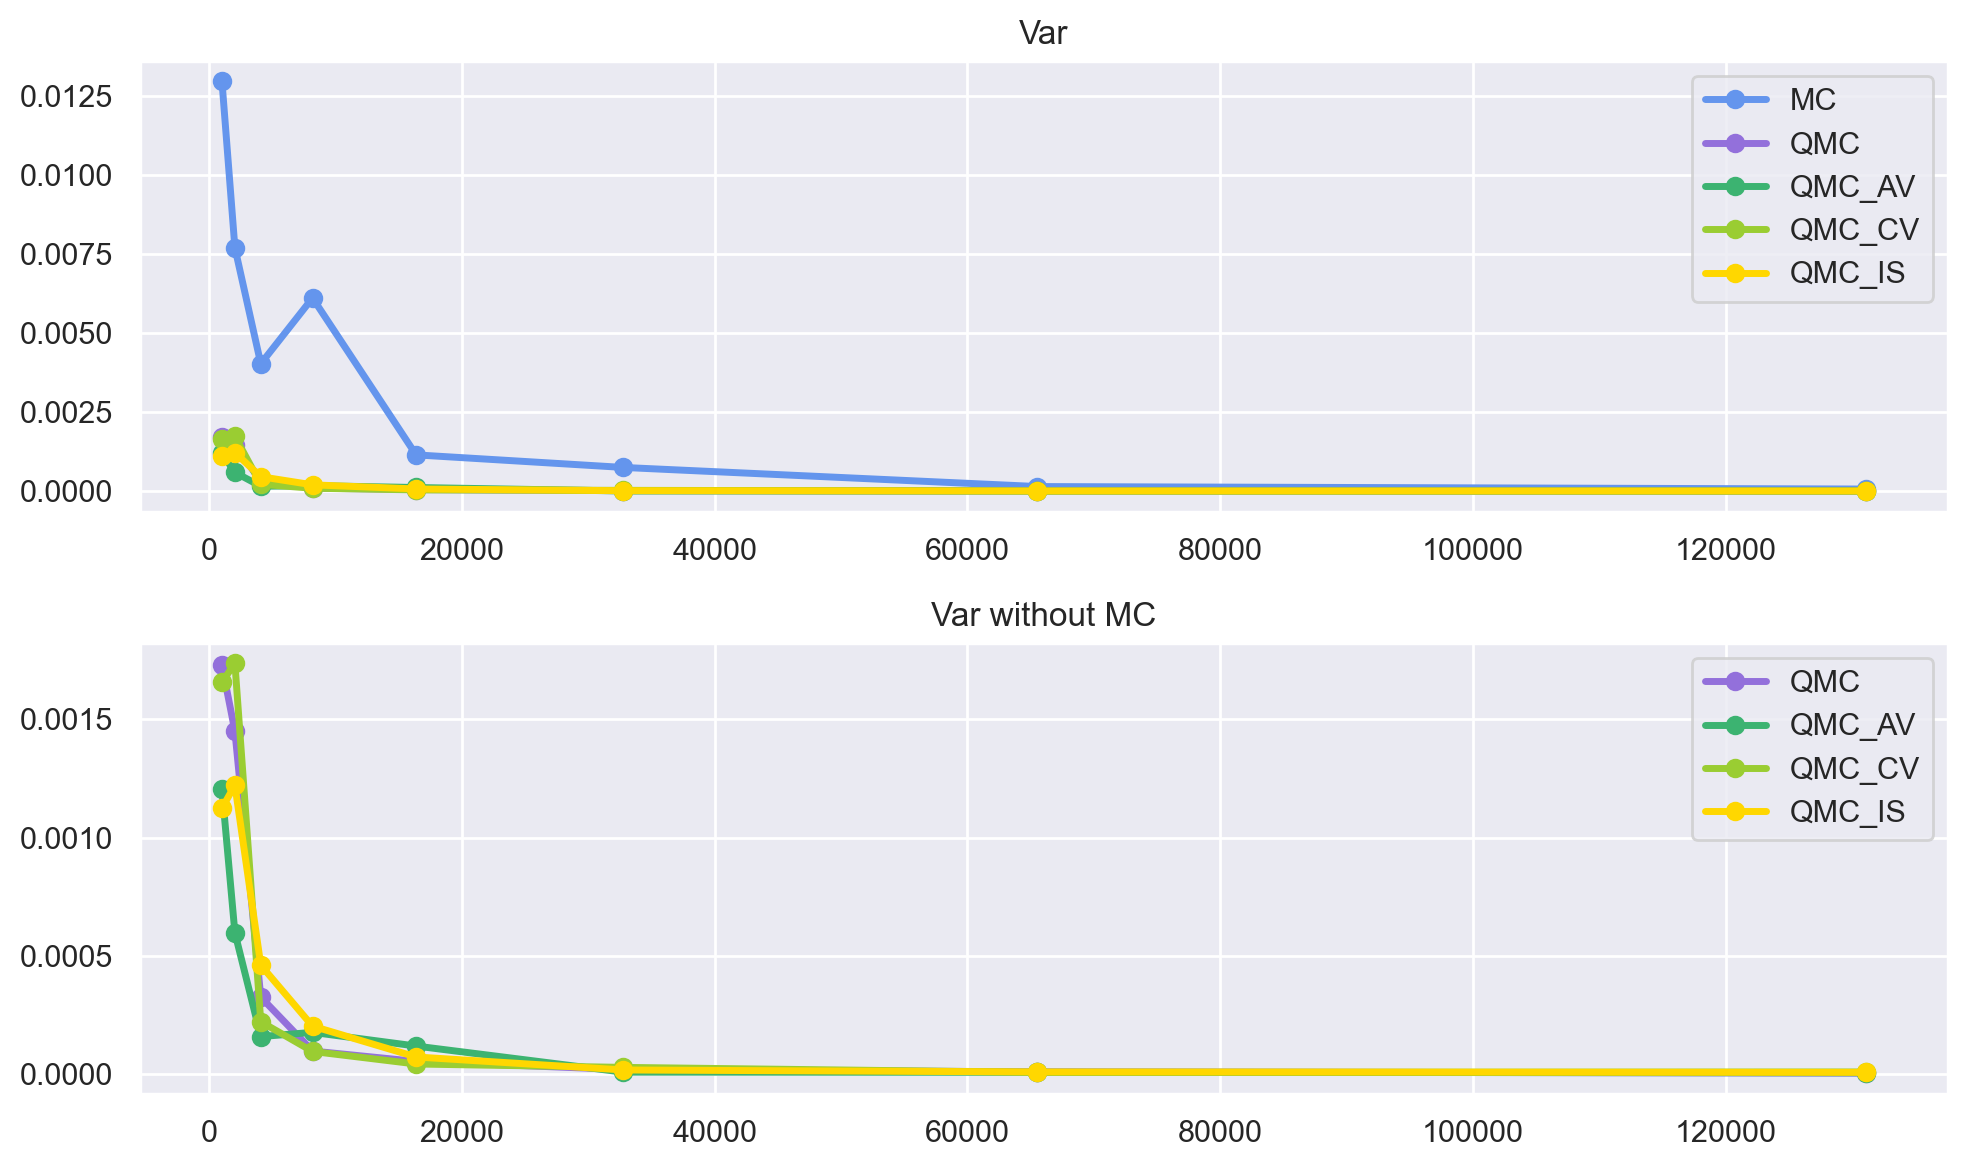

In [1974]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_10.M, MC_10['MC Put Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_10.M, QMC_10['MC Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AV_10.M, QMC_AV_10['MC Put Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_CV_10.M, QMC_CV_10['MC Put Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_IS_10.M, QMC_IS_10['MC Put Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title("Var")
ax[1].plot(QMC_10.M, QMC_10['MC Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV_10.M, QMC_AV_10['MC Put Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_CV_10.M, QMC_CV_10['MC Put Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_IS_10.M, QMC_IS_10['MC Put Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title("Var without MC")
f.tight_layout()
plt.show()

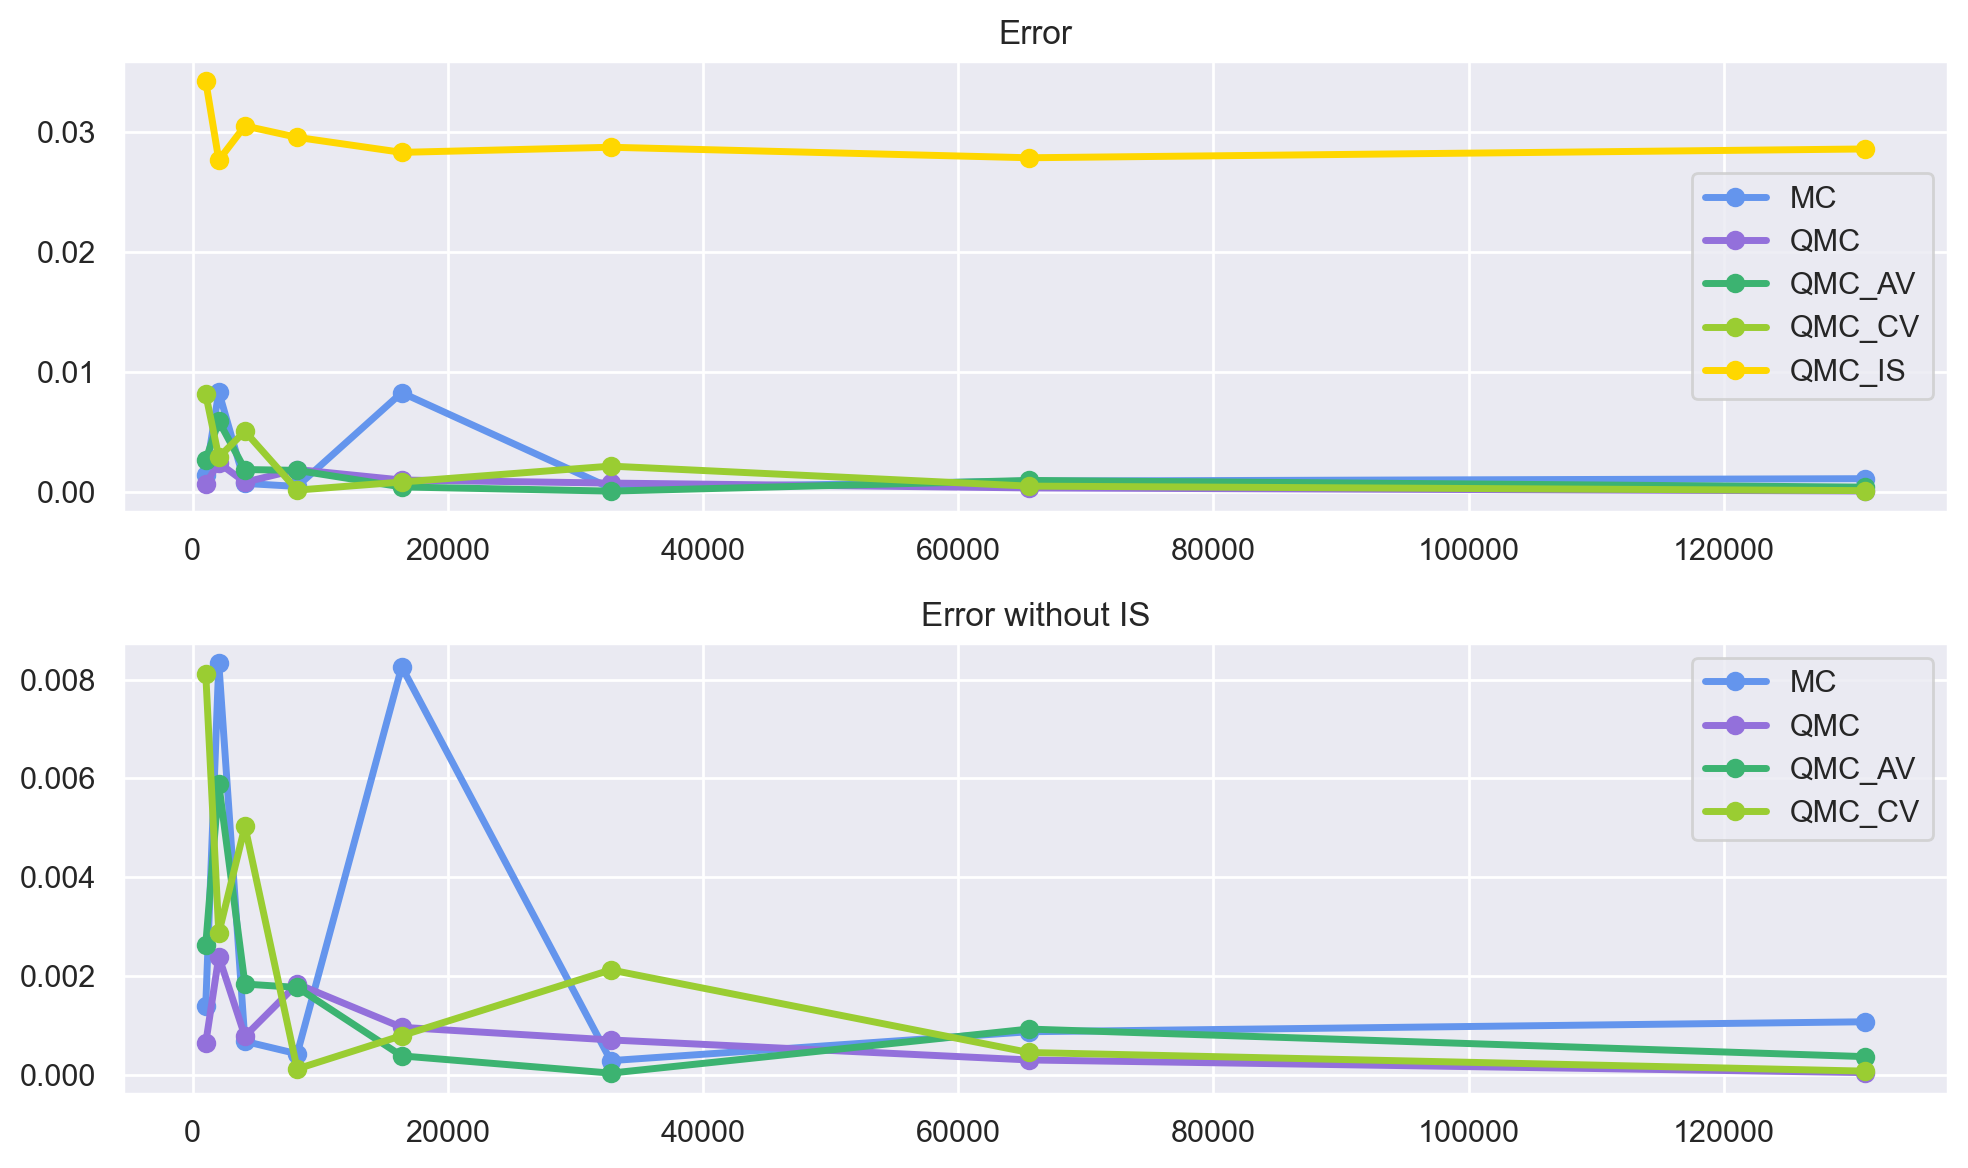

In [1975]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_10.M, MC_10['Put Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_10.M, QMC_10['Put Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AV_10.M, QMC_AV_10['Put Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_CV_10.M, QMC_CV_10['Put Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_IS_10.M, QMC_IS_10['Put Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title("Error")
ax[1].plot(MC_10.M, MC_10['Put Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_10.M, QMC_10['Put Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AV_10.M, QMC_AV_10['Put Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_CV_10.M, QMC_CV_10['Put Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title("Error without IS")
f.tight_layout()
plt.show()

In [458]:
def err(est,ans):
    e = np.abs(est-ans)/ans
    return e

In [555]:
#解
print('Call:',C0)
print('MC Call:',C0_M)
print('QMC Call:',C0_Q)
print('QMC AV Call:',C0_av)
print('QMC CV Call:',np.mean(CT_CV_M))
print('QMC IS Call:',np.mean(CTIS))
print('---------------------------------------')
print('Put:',P0)
print('MC Put:',P0_M)
print('QMC Put:',P0_Q)
print('QMC AV Put:',P0_av)
print('QMC CV Put:',np.mean(PT_CV_M))
print('QMC IS Put:',np.mean(PTIS))

Call: 17.311445098457696
MC Call: 17.51980876703998
QMC Call: 17.20359039215979
QMC AV Call: 17.164063063039478
QMC CV Call: 17.254110496813006
QMC IS Call: 17.287163050471317
---------------------------------------
Put: 7.795186902053633
MC Put: 7.797271354588497
QMC Put: 7.755550955251687
QMC AV Put: 7.738977886995577
QMC CV Put: 7.737845477850753
QMC IS Put: 7.794500347438596


In [556]:
#var
print('Var MC Call:',np.var(CT)/M)
print('Var QMC Call:',np.var(CTQ)/M)
print('Var QMC AV Call:',np.var(CT_av)/M)
print('Var QMC CV Call:',np.var(CT_CV_M)/M)
print('Var QMC IS Call:',CTIS.var()/(M))
print('---------------------------------------')
print('Var MC Put:',np.var(PT)/M)
print('Var QMC Put:',np.var(PTQ)/M)
print('Var QMC AV Put:',np.var(PT_av)/M)
print('Var QMC CV Put:',np.var(PT_CV_M)/M)
print('Var QMC IS Put:',PTIS.var()/(M))

Var MC Call: 0.06527918536580776
Var QMC Call: 0.06435411067528682
Var QMC AV Call: 0.016492020574662754
Var QMC CV Call: 0.006820964496195806
---------------------------------------
Var MC Put: 0.014505089219597915
Var QMC Put: 0.013887473106888553
Var QMC AV Put: 0.004011161862921804
Var QMC CV Put: 0.006820963991428484


In [570]:
#err
print('Error MC Call:',np.abs(C0_M-C0)/C0)
print('Error QMC Call:',np.abs(C0_Q-C0)/C0)
print('Error QMC AV Call:',np.abs(C0_av-C0)/C0)
print('Error QMC CV Call:',np.abs(np.mean(CT_CV_M)-C0)/C0)
print('Error QMC IS Call:',np.abs(np.mean(CTIS)-C0)/C0)
print('---------------------------------------')
print('Error MC Put:',np.abs(P0_M-P0)/P0)
print('Error QMC Put:',np.abs(P0_Q-P0)/P0)
print('Error QMC AV Put:',np.abs(P0_av-P0)/P0)
print('Error QMC CV Put:',np.abs(np.mean(PT_CV_M)-P0)/P0)
print('Error QMC IS Put:','{:.20f}'.format(np.abs(np.mean(PTIS)-P0)/P0))

Error MC Call: 0.012036179960553763
Error QMC Call: 0.006230254359730829
Error QMC AV Call: 0.008513560513290051
Error QMC CV Call: 0.003311947750092714
Error QMC IS Call: 0.0014026586370043776
---------------------------------------
Error MC Put: 0.0002674025088884825
Error QMC Put: 0.005084669206777297
Error QMC AV Put: 0.007210733464677786
Error QMC CV Put: 0.007356003765320045
Error QMC IS Put: 0.00008807416982595447


# Asian

## 精確解

In [128]:
# Black-Scholes Model參數
S0 = 100       # 資產價格
K = 100        # 履約價
r = 0.01       # 無風險利率
Tt = 10        # 時間
vol = 0.1      # 波動度
N = 20         # 期數
M = 10000      # 模擬次數
dt = Tt/N      # 一期時間長度

In [494]:
#精確解
# Geomatric Asian
#均值
m = np.log(S0)+(r-vol**2/2)*dt*(N+1)/2
#标准差
s = vol*np.sqrt(dt)/N*np.sqrt(N*(N+1)*(2*N+1)/6)
#参数
d1 = (m-np.log(K)+s**2)/s
d2 = d1-s
#价格
CG = np.exp(-r*Tt)*(np.exp(m+s**2/2)*norm.cdf(d1)-K*norm.cdf(d2))
PG = np.exp(-r*Tt)*(K*norm.cdf(-d2) - np.exp(m+s**2/2)*norm.cdf(-d1))

## MC

In [1627]:
def MC_AS(M):
    # 建立空的矩陣
    STG = np.zeros((M,N+1))
    # 設定初始價格
    STG[:,0] = np.log(S0)

    # 執行蒙地卡羅
    for n in range(N):
        e = np.random.standard_normal(M)
        STG[:,n+1] = STG[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e

    # Geomatric Asian
    STG = np.exp(STG)
    ST_GN = (STG[:,1:].prod(axis=1))**(1/N)
    # Arithmetic Asian
    ST_AN = (STG[:,1:].sum(axis=1))*(1/N)
    
    # Geomatric Asian
    CTG = np.zeros(M)
    for i in range(M):
        CTG[i] = np.exp(-r*Tt)*np.maximum(ST_GN[i]-K,0)
    PTG = np.zeros(M)
    for i in range(M):
        PTG[i] = np.exp(-r*Tt)*np.maximum(K-ST_GN[i],0)
    
    # Arithmetic Asian  
    CTA = np.zeros(M)
    for i in range(M):
        CTA[i] = np.exp(-r*Tt)*np.maximum(ST_AN[i]-K,0)
    PTA = np.zeros(M)
    for i in range(M):
        PTA[i] = np.exp(-r*Tt)*np.maximum(K-ST_AN[i],0)

    # 蒙地卡羅法的買權賣權價格
    CG_M = np.mean(np.exp(-r*Tt)*np.maximum(ST_GN-K,0))
    PG_M = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_GN,0))
    CA_M = np.mean(np.exp(-r*Tt)*np.maximum(ST_AN-K,0))
    PA_M = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_AN,0))
    return CTG, PTG, CTA, PTA, CG_M, PG_M, CA_M, PA_M

In [1628]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = MC_AS(2**10),MC_AS(2**11),MC_AS(2**12),MC_AS(2**13),MC_AS(2**14),MC_AS(2**15),MC_AS(2**16),MC_AS(2**17)

In [1629]:
MC_AS_D = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Geomatric Asian Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'MC Geomatric Asian Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'MC Arithmetic Asian Call': [EU1[2].mean(),EU2[2].mean(),EU3[2].mean(),EU4[2].mean(),EU5[2].mean(),
                                           EU6[2].mean(),EU7[2].mean(),EU8[2].mean()], 
              'MC Arithmetic Asian Put': [EU1[3].mean(),EU2[3].mean(),EU3[3].mean(),EU4[3].mean(),EU5[3].mean(),
                                          EU6[3].mean(),EU7[3].mean(),EU8[3].mean()],
              'MC Geomatric Asian Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                                               EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'MC Geomatric Asian Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                                              EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)],
              'MC Arithmetic Asian Call Var': [EU1[2].var()/(2**10-1),EU2[2].var()/(2**11-1),EU3[2].var()/(2**12-1),EU4[2].var()/(2**13-1),
                                               EU5[2].var()/(2**14-1),EU6[2].var()/(2**15-1),EU7[2].var()/(2**16-1),EU8[2].var()/(2**17-1)], 
              'MC Arithmetic Asian Put Var': [EU1[3].var()/(2**10-1),EU2[3].var()/(2**11-1),EU3[3].var()/(2**12-1),EU4[3].var()/(2**13-1),
                                              EU5[3].var()/(2**14-1),EU6[3].var()/(2**15-1),EU7[3].var()/(2**16-1),EU8[3].var()/(2**17-1)]})

In [1851]:
MC_AS_D['Call Geomatric Error'] = err(MC_AS_D['MC Geomatric Asian Call'],CG)
MC_AS_D['Put Geomatric Error'] = err(MC_AS_D['MC Geomatric Asian Put'],PG)

In [1852]:
MC_AS_D

M  MC Geomatric Asian Call  MC Geomatric Asian Put  \
0    1024                 9.311620                4.999703   
1    2048                 9.159523                4.912864   
2    4096                 9.420169                4.940064   
3    8192                 9.160264                5.159675   
4   16384                 9.259469                5.124477   
5   32768                 9.202330                5.126738   
6   65536                 9.199093                5.147470   
7  131072                 9.192994                5.129292   

   MC Arithmetic Asian Call  MC Arithmetic Asian Put  \
0                  9.872533                 4.740943   
1                  9.721397                 4.657874   
2                 10.009601                 4.690113   
3                  9.732084                 4.899652   
4                  9.827198                 4.865232   
5                  9.770842                 4.863365   
6                  9.768173                 4.888052   
7                  9.758140                 4.869265   

   MC Geomatric Asian Call Var  MC Geomatric Asian Put Var  \
0                     0.166700                    0.061140   
1                     0.078412                    0.028709   
2                     0.043365                    0.014600   
3                     0.020502                    0.007716   
4                     0.010360                    0.003860   
5                     0.005191                    0.001917   
6                     0.002565                    0.000960   
7                     0.001295                    0.000478   

   MC Arithmetic Asian Call Var  MC Arithmetic Asian Put Var  \
0                      0.185995                     0.056786   
1                      0.087910                     0.026568   
2                      0.048626                     0.013583   
3                      0.022958                     0.007168   
4                      0.011580                     0.003579   
5                      0.005808                     0.001776   
6                      0.002870                     0.000890   
7                      0.001446                     0.000444   

   Call Geomatric Error  Put Geomatric Error  
0              0.010633             0.024591  
1              0.005875             0.041533  
2              0.022414             0.036226  
3              0.005794             0.006619  
4              0.004973             0.000248  
5              0.001229             0.000193  
6              0.001580             0.004237  
7              0.002242             0.000691

In [1228]:
MC_AS_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Geomatric Asian Call': [np.mean(AS1_call),np.mean(AS2_call),np.mean(AS3_call),np.mean(AS4_call),
                          np.mean(AS5_call),np.mean(AS6_call),np.mean(AS7_call),np.mean(AS8_call)], 
              'MC Geomatric Asian Put': [np.mean(AS1_put),np.mean(AS2_put),np.mean(AS3_put),np.mean(AS4_put),
                          np.mean(AS5_put),np.mean(AS6_put),np.mean(AS7_put),np.mean(AS8_put)],
              'MC Arithmetic Asian Call': [np.mean(AS1_call_A),np.mean(AS2_call_A),np.mean(AS3_call_A),np.mean(AS4_call_A),
                          np.mean(AS5_call_A),np.mean(AS6_call_A),np.mean(AS7_call_A),np.mean(AS8_call_A)], 
              'MC Arithmetic Asian Put': [np.mean(AS1_put_A),np.mean(AS2_put_A),np.mean(AS3_put_A),np.mean(AS4_put_A),
                          np.mean(AS5_put_A),np.mean(AS6_put_A),np.mean(AS7_put_A),np.mean(AS8_put_A)],
                         
              'MC Geomatric Asian Call Var': [np.var(AS1_call)/9,np.var(AS2_call)/9,np.var(AS3_call)/9,np.var(AS4_call)/9,
                             np.var(AS5_call)/9,np.var(AS6_call)/9,np.var(AS7_call)/9,np.var(AS8_call)/9], 
              'MC Geomatric Asian Put Var': [np.var(AS1_put)/9,np.var(AS2_put)/9,np.var(AS3_put)/9,np.var(AS4_put)/9,
                             np.var(AS4_put)/9,np.var(AS6_put)/9,np.var(AS7_put)/9,np.var(AS8_put)/9],
              'MC Arithmetic Asian Call Var': [np.var(AS1_call_A)/9,np.var(AS2_call_A)/9,np.var(AS3_call_A)/9,np.var(AS4_call_A)/9,
                             np.var(AS5_call_A)/9,np.var(AS6_call_A)/9,np.var(AS7_call_A)/9,np.var(AS8_call_A)/9], 
              'MC Arithmetic Asian Put Var': [np.var(AS1_put_A)/9,np.var(AS2_put_A)/9,np.var(AS3_put_A)/9,np.var(AS4_put_A)/9,
                             np.var(AS5_put_A)/9,np.var(AS6_put_A)/9,np.var(AS7_put_A)/9,np.var(AS8_put_A)/9]})

In [1881]:
MC_AS_10['MC Geomatric Call Var Up'] = MC_AS_10['MC Geomatric Asian Call Var']**0.5*1.96+MC_AS_10['MC Geomatric Asian Call']
MC_AS_10['MC Geomatric Call Var Down'] = -MC_AS_10['MC Geomatric Asian Call Var']**0.5*1.96+MC_AS_10['MC Geomatric Asian Call']
MC_AS_10['MC Geomatric Put Var Up'] = MC_AS_10['MC Geomatric Asian Put Var']**0.5*1.96+MC_AS_10['MC Geomatric Asian Put']
MC_AS_10['MC Geomatric Put Var Down'] = -MC_AS_10['MC Geomatric Asian Put Var']**0.5*1.96+MC_AS_10['MC Geomatric Asian Put']

MC_AS_10['MC Arithmetic Call Var Up'] = MC_AS_10['MC Arithmetic Asian Call Var']**0.5*1.96+MC_AS_10['MC Arithmetic Asian Call']
MC_AS_10['MC Arithmetic Call Var Down'] = -MC_AS_10['MC Arithmetic Asian Call Var']**0.5*1.96+MC_AS_10['MC Arithmetic Asian Call']
MC_AS_10['MC Arithmetic Put Var Up'] = MC_AS_10['MC Arithmetic Asian Put Var']**0.5*1.96+MC_AS_10['MC Arithmetic Asian Put']
MC_AS_10['MC Arithmetic Put Var Down'] = -MC_AS_10['MC Arithmetic Asian Put Var']**0.5*1.96+MC_AS_10['MC Arithmetic Asian Put']

MC_AS_10['Call Error'] = err(MC_AS_10['MC Geomatric Asian Call'],CG)
MC_AS_10['Put Error'] = err(MC_AS_10['MC Geomatric Asian Put'],PG)

In [1882]:
MC_AS_10

M  MC Geomatric Asian Call  MC Geomatric Asian Put  \
0    1024                 9.292062                5.174023   
1    2048                 9.289749                5.103322   
2    4096                 9.141474                5.168842   
3    8192                 9.119995                5.131430   
4   16384                 9.204206                5.126672   
5   32768                 9.250829                5.112555   
6   65536                 9.220200                5.136745   
7  131072                 9.206442                5.123436   

   MC Arithmetic Asian Call  MC Arithmetic Asian Put  \
0                  9.868650                 4.915893   
1                  9.857390                 4.847379   
2                  9.709807                 4.906628   
3                  9.684620                 4.871318   
4                  9.772039                 4.865816   
5                  9.824043                 4.853516   
6                  9.790279                 4.876871   
7                  9.775083                 4.864203   

   MC Geomatric Asian Call Var  MC Geomatric Asian Put Var  \
0                     0.024573                    0.004110   
1                     0.006194                    0.001150   
2                     0.007418                    0.000940   
3                     0.001855                    0.000589   
4                     0.001103                    0.000589   
5                     0.000526                    0.000263   
6                     0.000151                    0.000040   
7                     0.000109                    0.000030   

   MC Arithmetic Asian Call Var  MC Arithmetic Asian Put Var  \
0                      0.027108                     0.003879   
1                      0.007465                     0.001045   
2                      0.008490                     0.000949   
3                      0.001987                     0.000568   
4                      0.001195                     0.000465   
5                      0.000604                     0.000254   
6                      0.000155                     0.000036   
7                      0.000121                     0.000028   

   MC Geomatric Call Var Up  MC Geomatric Call Var Down  \
0                  9.599310                    8.984815   
1                  9.444009                    9.135490   
2                  9.310283                    8.972666   
3                  9.204412                    9.035578   
4                  9.269314                    9.139099   
5                  9.295791                    9.205866   
6                  9.244290                    9.196110   
7                  9.226944                    9.185941   

   MC Geomatric Put Var Up  MC Geomatric Put Var Down  \
0                 5.299676                   5.048371   
1                 5.169787                   5.036857   
2                 5.228922                   5.108761   
3                 5.178993                   5.083867   
4                 5.174235                   5.079109   
5                 5.144345                   5.080764   
6                 5.149187                   5.124303   
7                 5.134249                   5.112624   

   MC Arithmetic Call Var Up  MC Arithmetic Call Var Down  \
0                  10.191355                     9.545945   
1                  10.026735                     9.688046   
2                   9.890400                     9.529213   
3                   9.771996                     9.597243   
4                   9.839794                     9.704284   
5                   9.872230                     9.775856   
6                   9.814650                     9.765909   
7                   9.796663                     9.753502   

   MC Arithmetic Put Var Up  MC Arithmetic Put Var Down  Call Error  Put Error  
0                  5.037964                    4.793821    0.008510   0.009418  
1                  4.910731                    4.7

## QMC Sobol

In [1638]:
def QMC_AS(M):
    # 建立空的矩陣
    STG = np.zeros((M,N+1))
    # 設定初始價格
    STG[:,0] = np.log(S0)

    #QMC
    num_results = M
    dim = N
    Sobol = tf.math.sobol_sample(dim, num_results, skip=0, dtype=tf.dtypes.float32, name=None)
    Sobol = Sobol.numpy()
    u = np.random.uniform(size=(N))
    Data = np.zeros((M,N))
    for i in range(N):
        Data[:,i] = Sobol[:,i] + u[i]
        Data[Data > 1] = Data[Data > 1] - 1
    e = norm.ppf(Data,0,1)

    # 執行蒙地卡羅
    for n in range(N):
        STG[:,n+1] = STG[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e[:,n]

    # Geomatric Asian
    STGQ = np.exp(STG)
    ST_GQ = (STGQ[:,1:].prod(axis=1))**(1/N)
    # Arithmetic Asian
    ST_AQ = (STGQ[:,1:].sum(axis=1))*(1/N)

    # Geomatric Asian
    CTGQ = np.zeros(M)
    for i in range(M):
        CTGQ[i] = np.exp(-r*Tt)*np.maximum(ST_GQ[i]-K,0)
    PTGQ = np.zeros(M)
    for i in range(M):
        PTGQ[i] = np.exp(-r*Tt)*np.maximum(K-ST_GQ[i],0)
    
    # Arithmetic Asian  
    CTAQ = np.zeros(M)
    for i in range(M):
        CTAQ[i] = np.exp(-r*Tt)*np.maximum(ST_AQ[i]-K,0)
    PTAQ = np.zeros(M)
    for i in range(M):
        PTAQ[i] = np.exp(-r*Tt)*np.maximum(K-ST_AQ[i],0)

    # 蒙地卡羅法的買權賣權價格
    CG_Q = np.mean(np.exp(-r*Tt)*np.maximum(ST_GQ-K,0))
    PG_Q = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_GQ,0))
    CA_Q = np.mean(np.exp(-r*Tt)*np.maximum(ST_AQ-K,0))
    PA_Q = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_AQ,0))
    return CTGQ, PTGQ, CTAQ, PTAQ, ST_GQ, CG_Q, PG_Q, CA_Q, PA_Q

In [1639]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_AS(2**10),QMC_AS(2**11),QMC_AS(2**12),QMC_AS(2**13),QMC_AS(2**14),QMC_AS(2**15),QMC_AS(2**16),QMC_AS(2**17)


In [1646]:
QMC_AS_D = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC Geomatric Asian Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'QMC Geomatric Asian Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'QMC Arithmetic Asian Call': [EU1[2].mean(),EU2[2].mean(),EU3[2].mean(),EU4[2].mean(),EU5[2].mean(),
                                           EU6[2].mean(),EU7[2].mean(),EU8[2].mean()], 
              'QMC Arithmetic Asian Put': [EU1[3].mean(),EU2[3].mean(),EU3[3].mean(),EU4[3].mean(),EU5[3].mean(),
                                          EU6[3].mean(),EU7[3].mean(),EU8[3].mean()],
              'QMC Geomatric Asian Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                                               EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'QMC Geomatric Asian Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                                              EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)],
              'QMC Arithmetic Asian Call Var': [EU1[2].var()/(2**10-1),EU2[2].var()/(2**11-1),EU3[2].var()/(2**12-1),EU4[2].var()/(2**13-1),
                                               EU5[2].var()/(2**14-1),EU6[2].var()/(2**15-1),EU7[2].var()/(2**16-1),EU8[2].var()/(2**17-1)], 
              'QMC Arithmetic Asian Put Var': [EU1[3].var()/(2**10-1),EU2[3].var()/(2**11-1),EU3[3].var()/(2**12-1),EU4[3].var()/(2**13-1),
                                              EU5[3].var()/(2**14-1),EU6[3].var()/(2**15-1),EU7[3].var()/(2**16-1),EU8[3].var()/(2**17-1)]})

In [1855]:
QMC_AS_D['Call Geomatric Error'] = err(QMC_AS_D['QMC Geomatric Asian Call'],CG)
QMC_AS_D['Put Geomatric Error'] = err(QMC_AS_D['QMC Geomatric Asian Put'],PG)

In [1648]:
QMC_AS_D

M  QMC Geomatric Asian Call  QMC Geomatric Asian Put  \
0    1024                  9.185229                 5.137997   
1    2048                  9.258150                 5.183322   
2    4096                  9.235516                 5.128195   
3    8192                  9.191727                 5.112265   
4   16384                  9.199830                 5.109634   
5   32768                  9.225292                 5.138861   
6   65536                  9.206150                 5.117108   
7  131072                  9.216631                 5.128078   

   QMC Arithmetic Asian Call  QMC Arithmetic Asian Put  \
0                   9.725705                  4.872861   
1                   9.839933                  4.935217   
2                   9.814222                  4.869052   
3                   9.759514                  4.852438   
4                   9.767389                  4.848231   
5                   9.794777                  4.878824   
6                   9.776501                  4.857942   
7                   9.786732                  4.869065   

   QMC Geomatric Asian Call Var  QMC Geomatric Asian Put Var  \
0                      0.159528                     0.059008   
1                      0.084356                     0.030419   
2                      0.041612                     0.015507   
3                      0.020546                     0.007606   
4                      0.010465                     0.003778   
5                      0.005154                     0.001915   
6                      0.002597                     0.000956   
7                      0.001292                     0.000478   

   QMC Arithmetic Asian Call Var  QMC Arithmetic Asian Put Var  
0                       0.177253                      0.054691  
1                       0.094783                      0.028295  
2                       0.046812                      0.014348  
3                       0.023027                      0.007049  
4                       0.011721                      0.003504  
5                       0.005774                      0.001776  
6                       0.002905                      0.000887  
7                       0.001445                      0.000444

In [1307]:
QMC_AS_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Geomatric Asian Call': [np.mean(AS1_call),np.mean(AS2_call),np.mean(AS3_call),np.mean(AS4_call),
                          np.mean(AS5_call),np.mean(AS6_call),np.mean(AS7_call),np.mean(AS8_call)], 
              'MC Geomatric Asian Put': [np.mean(AS1_put),np.mean(AS2_put),np.mean(AS3_put),np.mean(AS4_put),
                          np.mean(AS5_put),np.mean(AS6_put),np.mean(AS7_put),np.mean(AS8_put)],
              'MC Arithmetic Asian Call': [np.mean(AS1_call_A),np.mean(AS2_call_A),np.mean(AS3_call_A),np.mean(AS4_call_A),
                          np.mean(AS5_call_A),np.mean(AS6_call_A),np.mean(AS7_call_A),np.mean(AS8_call_A)], 
              'MC Arithmetic Asian Put': [np.mean(AS1_put_A),np.mean(AS2_put_A),np.mean(AS3_put_A),np.mean(AS4_put_A),
                          np.mean(AS5_put_A),np.mean(AS6_put_A),np.mean(AS7_put_A),np.mean(AS8_put_A)],
                         
              'MC Geomatric Asian Call Var': [np.var(AS1_call)/9,np.var(AS2_call)/9,np.var(AS3_call)/9,np.var(AS4_call)/9,
                             np.var(AS5_call)/9,np.var(AS6_call)/9,np.var(AS7_call)/9,np.var(AS8_call)/9], 
              'MC Geomatric Asian Put Var': [np.var(AS1_put)/9,np.var(AS2_put)/9,np.var(AS3_put)/9,np.var(AS4_put)/9,
                             np.var(AS4_put)/9,np.var(AS6_put)/9,np.var(AS7_put)/9,np.var(AS8_put)/9],
              'MC Arithmetic Asian Call Var': [np.var(AS1_call_A)/9,np.var(AS2_call_A)/9,np.var(AS3_call_A)/9,np.var(AS4_call_A)/9,
                             np.var(AS5_call_A)/9,np.var(AS6_call_A)/9,np.var(AS7_call_A)/9,np.var(AS8_call_A)/9], 
              'MC Arithmetic Asian Put Var': [np.var(AS1_put_A)/9,np.var(AS2_put_A)/9,np.var(AS3_put_A)/9,np.var(AS4_put_A)/9,
                             np.var(AS5_put_A)/9,np.var(AS6_put_A)/9,np.var(AS7_put_A)/9,np.var(AS8_put_A)/9]})

In [1883]:
QMC_AS_10['MC Geomatric Call Var Up'] = QMC_AS_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_10['MC Geomatric Asian Call']
QMC_AS_10['MC Geomatric Call Var Down'] = -QMC_AS_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_10['MC Geomatric Asian Call']
QMC_AS_10['MC Geomatric Put Var Up'] = QMC_AS_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_10['MC Geomatric Asian Put']
QMC_AS_10['MC Geomatric Put Var Down'] = -QMC_AS_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_10['MC Geomatric Asian Put']

QMC_AS_10['MC Arithmetic Call Var Up'] = QMC_AS_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_10['MC Arithmetic Asian Call']
QMC_AS_10['MC Arithmetic Call Var Down'] = -QMC_AS_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_10['MC Arithmetic Asian Call']
QMC_AS_10['MC Arithmetic Put Var Up'] = QMC_AS_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_10['MC Arithmetic Asian Put']
QMC_AS_10['MC Arithmetic Put Var Down'] = -QMC_AS_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_10['MC Arithmetic Asian Put']

QMC_AS_10['Call Error'] = err(QMC_AS_10['MC Geomatric Asian Call'],CG)
QMC_AS_10['Put Error'] = err(QMC_AS_10['MC Geomatric Asian Put'],PG)

In [1884]:
QMC_AS_10

M  MC Geomatric Asian Call  MC Geomatric Asian Put  \
0    1024                 9.270736                5.171305   
1    2048                 9.232566                5.132631   
2    4096                 9.211992                5.131901   
3    8192                 9.207703                5.118246   
4   16384                 9.215749                5.125465   
5   32768                 9.217471                5.128689   
6   65536                 9.208785                5.121668   
7  131072                 9.214808                5.127032   

   MC Arithmetic Asian Call  MC Arithmetic Asian Put  \
0                  9.838259                 4.909595   
1                  9.801083                 4.871952   
2                  9.781863                 4.873230   
3                  9.776986                 4.859100   
4                  9.784680                 4.863893   
5                  9.786830                 4.868977   
6                  9.778945                 4.864182   
7                  9.784079                 4.867140   

   MC Geomatric Asian Call Var  MC Geomatric Asian Put Var  \
0                     0.000999                6.305458e-04   
1                     0.000415                1.326289e-04   
2                     0.000207                1.082110e-04   
3                     0.000045                3.347782e-05   
4                     0.000013                3.347782e-05   
5                     0.000010                8.114631e-06   
6                     0.000004                2.099170e-06   
7                     0.000001                8.074812e-07   

   MC Arithmetic Asian Call Var  MC Arithmetic Asian Put Var  \
0                      0.000997                 6.254500e-04   
1                      0.000526                 1.201728e-04   
2                      0.000195                 1.040531e-04   
3                      0.000046                 3.098484e-05   
4                      0.000014                 1.200040e-05   
5                      0.000012                 8.864064e-06   
6                      0.000005                 3.173053e-06   
7                      0.000001                 6.765018e-07   

   MC Geomatric Call Var Up  MC Geomatric Call Var Down  \
0                  9.332693                    9.208779   
1                  9.272490                    9.192643   
2                  9.240218                    9.183765   
3                  9.220914                    9.194491   
4                  9.222718                    9.208781   
5                  9.223702                    9.211239   
6                  9.212923                    9.204648   
7                  9.216924                    9.212693   

   MC Geomatric Put Var Up  MC Geomatric Put Var Down  \
0                 5.220522                   5.122088   
1                 5.155203                   5.110059   
2                 5.152289                   5.111512   
3                 5.129587                   5.106906   
4                 5.136806                   5.114125   
5                 5.134272                   5.123106   
6                 5.124508                   5.118828   
7                 5.128793                   5.125270   

   MC Arithmetic Call Var Up  MC Arithmetic Call Var Down  \
0                   9.900147                     9.776371   
1                   9.846020                     9.756146   
2                   9.809265                     9.754461   
3                   9.790320                     9.763652   
4                   9.792112                     9.777248   
5                   9.793523                     9.780138   
6                   9.783327                     9.774564   
7                   9.786063                     9.782094   

   MC Arithmetic Put Var Up  MC Arithmetic Put Var Down  Call Error  Put Error  
0                  4.958613                    4.860578    0.006196   0.008888  
1                  4.893438                    4.8

## AV 

In [1652]:
def QMC_AS_AV(M):
    # av
    # 建立空的矩陣
    STG = np.zeros((M,N+1))
    STGa = np.zeros((M,N+1))

    # 設定初始價格
    STG[:,0] = np.log(S0)
    STGa[:,0] = np.log(S0)

    #QMC
    num_results = M
    dim = N
    Sobol = tf.math.sobol_sample(dim, num_results, skip=0, dtype=tf.dtypes.float32, name=None)
    Sobol = Sobol.numpy()
    u = np.random.uniform(size=(N))
    Data = np.zeros((M,N))
    for i in range(N):
        Data[:,i] = Sobol[:,i] + u[i]
        Data[Data > 1] = Data[Data > 1] - 1
    e = norm.ppf(Data,0,1)
    e_a = -e #AV
    
    #AV1
    # 執行蒙地卡羅
    for n in range(N):
        STG[:,n+1] = STG[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e[:,n]

    # Geomatric Asian
    STGQ = np.exp(STG)
    ST_GQ = (STGQ[:,1:].prod(axis=1))**(1/N)
    # Arithmetic Asian
    ST_AQ = (STGQ[:,1:].sum(axis=1))*(1/N)

    # Geomatric Asian
    CTGQ = np.zeros(M)
    for i in range(M):
        CTGQ[i] = np.exp(-r*Tt)*np.maximum(ST_GQ[i]-K,0)
    PTGQ = np.zeros(M)
    for i in range(M):
        PTGQ[i] = np.exp(-r*Tt)*np.maximum(K-ST_GQ[i],0)
    
    # Arithmetic Asian  
    CTAQ = np.zeros(M)
    for i in range(M):
        CTAQ[i] = np.exp(-r*Tt)*np.maximum(ST_AQ[i]-K,0)
    PTAQ = np.zeros(M)
    for i in range(M):
        PTAQ[i] = np.exp(-r*Tt)*np.maximum(K-ST_AQ[i],0)
        
    #AV2
    # 執行蒙地卡羅
    for n in range(N):
        STGa[:,n+1] = STGa[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*e_a[:,n]

    # Geomatric Asian
    STGQa = np.exp(STGa)
    ST_GQa = (STGQa[:,1:].prod(axis=1))**(1/N)
    # Arithmetic Asian
    ST_AQa = (STGQa[:,1:].sum(axis=1))*(1/N)

    # Geomatric Asian
    CTGQa = np.zeros(M)
    for i in range(M):
        CTGQa[i] = np.exp(-r*Tt)*np.maximum(ST_GQa[i]-K,0)

    PTGQa = np.zeros(M)
    for i in range(M):
        PTGQa[i] = np.exp(-r*Tt)*np.maximum(K-ST_GQa[i],0)
    
    # Arithmetic Asian  
    CTAQa = np.zeros(M)
    for i in range(M):
        CTAQa[i] = np.exp(-r*Tt)*np.maximum(ST_AQa[i]-K,0)
    PTAQa = np.zeros(M)
    for i in range(M):
        PTAQa[i] = np.exp(-r*Tt)*np.maximum(K-ST_AQa[i],0)

    #Create AV    
    CTGAV = 0.5*(CTGQ+CTGQa)
    PTGAV = 0.5*(PTGQ+PTGQa)
    CTAAV = 0.5*(CTAQ+CTAQa)
    PTAAV = 0.5*(PTAQ+PTAQa)

    # 蒙地卡羅法的買權賣權價格
    CG_QAV = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(ST_GQ-K,0)+np.maximum(ST_GQa-K,0))))
    PG_QAV = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(K-ST_GQ,0)+np.maximum(K-ST_GQa,0))))
    CA_QAV = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(ST_AQ-K,0)+np.maximum(ST_AQa-K,0))))
    PA_QAV = np.mean(np.exp(-r*Tt)*(0.5*(np.maximum(K-ST_AQ,0)+np.maximum(K-ST_AQa,0))))
    return     CTGAV, PTGAV, CTAAV, PTAAV, CG_QAV, PG_QAV, CA_QAV, PA_QAV

In [1653]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_AS_AV(2**10),QMC_AS_AV(2**11),QMC_AS_AV(2**12),QMC_AS_AV(2**13),QMC_AS_AV(2**14),QMC_AS_AV(2**15),QMC_AS_AV(2**16),QMC_AS_AV(2**17)

In [1856]:
QMC_AS_AV_D['Call Geomatric Error'] = err(QMC_AS_AV_D['QMC Geomatric Asian Call'],CG)
QMC_AS_AV_D['Put Geomatric Error'] = err(QMC_AS_AV_D['QMC Geomatric Asian Put'],PG)

In [1654]:
QMC_AS_AV_D = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC Geomatric Asian Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'QMC Geomatric Asian Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'QMC Arithmetic Asian Call': [EU1[2].mean(),EU2[2].mean(),EU3[2].mean(),EU4[2].mean(),EU5[2].mean(),
                                           EU6[2].mean(),EU7[2].mean(),EU8[2].mean()], 
              'QMC Arithmetic Asian Put': [EU1[3].mean(),EU2[3].mean(),EU3[3].mean(),EU4[3].mean(),EU5[3].mean(),
                                          EU6[3].mean(),EU7[3].mean(),EU8[3].mean()],
              'QMC Geomatric Asian Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                                               EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'QMC Geomatric Asian Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                                              EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)],
              'QMC Arithmetic Asian Call Var': [EU1[2].var()/(2**10-1),EU2[2].var()/(2**11-1),EU3[2].var()/(2**12-1),EU4[2].var()/(2**13-1),
                                               EU5[2].var()/(2**14-1),EU6[2].var()/(2**15-1),EU7[2].var()/(2**16-1),EU8[2].var()/(2**17-1)], 
              'QMC Arithmetic Asian Put Var': [EU1[3].var()/(2**10-1),EU2[3].var()/(2**11-1),EU3[3].var()/(2**12-1),EU4[3].var()/(2**13-1),
                                              EU5[3].var()/(2**14-1),EU6[3].var()/(2**15-1),EU7[3].var()/(2**16-1),EU8[3].var()/(2**17-1)]})

In [1857]:
QMC_AS_AV_D

M  QMC Geomatric Asian Call  QMC Geomatric Asian Put  \
0    1024                  9.252702                 5.119462   
1    2048                  9.211043                 5.117641   
2    4096                  9.206451                 5.120156   
3    8192                  9.203228                 5.107080   
4   16384                  9.193961                 5.108080   
5   32768                  9.217608                 5.129281   
6   65536                  9.205846                 5.117976   
7  131072                  9.208029                 5.120915   

   QMC Arithmetic Asian Call  QMC Arithmetic Asian Put  \
0                   9.844355                  4.859227   
1                   9.778800                  4.858754   
2                   9.778385                  4.858533   
3                   9.772688                  4.848687   
4                   9.764187                  4.848403   
5                   9.786904                  4.868595   
6                   9.776272                  4.859240   
7                   9.777612                  4.861893   

   QMC Geomatric Asian Call Var  QMC Geomatric Asian Put Var  \
0                      0.045316                     0.018781   
1                      0.021358                     0.008901   
2                      0.010514                     0.004413   
3                      0.005341                     0.002258   
4                      0.002624                     0.001114   
5                      0.001295                     0.000555   
6                      0.000652                     0.000279   
7                      0.000326                     0.000139   

   QMC Arithmetic Asian Call Var  QMC Arithmetic Asian Put Var  \
0                       0.050827                      0.017705   
1                       0.023735                      0.008437   
2                       0.011779                      0.004173   
3                       0.005961                      0.002135   
4                       0.002926                      0.001054   
5                       0.001442                      0.000525   
6                       0.000725                      0.000264   
7                       0.000363                      0.000131   

   Call Geomatric Error  Put Geomatric Error  
0              0.004238             0.001227  
1              0.000283             0.001582  
2              0.000782             0.001091  
3              0.001131             0.003642  
4              0.002137             0.003447  
5              0.000429             0.000689  
6              0.000847             0.001517  
7              0.000610             0.000943

In [1387]:
QMC_AS_AV_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Geomatric Asian Call': [np.mean(AS1_call),np.mean(AS2_call),np.mean(AS3_call),np.mean(AS4_call),
                          np.mean(AS5_call),np.mean(AS6_call),np.mean(AS7_call),np.mean(AS8_call)], 
              'MC Geomatric Asian Put': [np.mean(AS1_put),np.mean(AS2_put),np.mean(AS3_put),np.mean(AS4_put),
                          np.mean(AS5_put),np.mean(AS6_put),np.mean(AS7_put),np.mean(AS8_put)],
              'MC Arithmetic Asian Call': [np.mean(AS1_call_A),np.mean(AS2_call_A),np.mean(AS3_call_A),np.mean(AS4_call_A),
                          np.mean(AS5_call_A),np.mean(AS6_call_A),np.mean(AS7_call_A),np.mean(AS8_call_A)], 
              'MC Arithmetic Asian Put': [np.mean(AS1_put_A),np.mean(AS2_put_A),np.mean(AS3_put_A),np.mean(AS4_put_A),
                          np.mean(AS5_put_A),np.mean(AS6_put_A),np.mean(AS7_put_A),np.mean(AS8_put_A)],
                         
              'MC Geomatric Asian Call Var': [np.var(AS1_call)/9,np.var(AS2_call)/9,np.var(AS3_call)/9,np.var(AS4_call)/9,
                             np.var(AS5_call)/9,np.var(AS6_call)/9,np.var(AS7_call)/9,np.var(AS8_call)/9], 
              'MC Geomatric Asian Put Var': [np.var(AS1_put)/9,np.var(AS2_put)/9,np.var(AS3_put)/9,np.var(AS4_put)/9,
                             np.var(AS4_put)/9,np.var(AS6_put)/9,np.var(AS7_put)/9,np.var(AS8_put)/9],
              'MC Arithmetic Asian Call Var': [np.var(AS1_call_A)/9,np.var(AS2_call_A)/9,np.var(AS3_call_A)/9,np.var(AS4_call_A)/9,
                             np.var(AS5_call_A)/9,np.var(AS6_call_A)/9,np.var(AS7_call_A)/9,np.var(AS8_call_A)/9], 
              'MC Arithmetic Asian Put Var': [np.var(AS1_put_A)/9,np.var(AS2_put_A)/9,np.var(AS3_put_A)/9,np.var(AS4_put_A)/9,
                             np.var(AS5_put_A)/9,np.var(AS6_put_A)/9,np.var(AS7_put_A)/9,np.var(AS8_put_A)/9]})

In [1885]:
QMC_AS_AV_10['MC Geomatric Call Var Up'] = QMC_AS_AV_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_AV_10['MC Geomatric Asian Call']
QMC_AS_AV_10['MC Geomatric Call Var Down'] = -QMC_AS_AV_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_AV_10['MC Geomatric Asian Call']
QMC_AS_AV_10['MC Geomatric Put Var Up'] = QMC_AS_AV_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_AV_10['MC Geomatric Asian Put']
QMC_AS_AV_10['MC Geomatric Put Var Down'] = -QMC_AS_AV_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_AV_10['MC Geomatric Asian Put']

QMC_AS_AV_10['MC Arithmetic Call Var Up'] = QMC_AS_AV_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_AV_10['MC Arithmetic Asian Call']
QMC_AS_AV_10['MC Arithmetic Call Var Down'] = -QMC_AS_AV_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_AV_10['MC Arithmetic Asian Call']
QMC_AS_AV_10['MC Arithmetic Put Var Up'] = QMC_AS_AV_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_AV_10['MC Arithmetic Asian Put']
QMC_AS_AV_10['MC Arithmetic Put Var Down'] = -QMC_AS_AV_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_AV_10['MC Arithmetic Asian Put']

QMC_AS_AV_10['Call Error'] = err(QMC_AS_AV_10['MC Geomatric Asian Call'],CG)
QMC_AS_AV_10['Put Error'] = err(QMC_AS_AV_10['MC Geomatric Asian Put'],PG)

In [1886]:
QMC_AS_AV_10

M  MC Geomatric Asian Call  MC Geomatric Asian Put  \
0    1024                 9.210129                5.126081   
1    2048                 9.203126                5.117215   
2    4096                 9.223560                5.130221   
3    8192                 9.220848                5.128842   
4   16384                 9.206115                5.119088   
5   32768                 9.215680                5.127876   
6   65536                 9.218951                5.130027   
7  131072                 9.213137                5.126506   

   MC Arithmetic Asian Call  MC Arithmetic Asian Put  \
0                  9.778074                 4.865477   
1                  9.773094                 4.859056   
2                  9.794864                 4.870027   
3                  9.791045                 4.869486   
4                  9.775708                 4.859855   
5                  9.787868                 4.868518   
6                  9.783361                 4.870423   
7                  9.780940                 4.867004   

   MC Geomatric Asian Call Var  MC Geomatric Asian Put Var  \
0                     0.001133                    0.000648   
1                     0.000438                    0.000206   
2                     0.000102                    0.000065   
3                     0.000056                    0.000046   
4                     0.000019                    0.000046   
5                     0.000012                    0.000007   
6                     0.000002                    0.000003   
7                     0.000002                    0.000001   

   MC Arithmetic Asian Call Var  MC Arithmetic Asian Put Var  \
0                  1.104728e-03                     0.000623   
1                  4.837082e-04                     0.000187   
2                  1.083984e-04                     0.000061   
3                  5.200725e-05                     0.000047   
4                  1.895479e-05                     0.000013   
5                  9.044325e-06                     0.000007   
6                  4.809040e-06                     0.000003   
7                  9.996669e-07                     0.000001   

   MC Geomatric Call Var Up  MC Geomatric Call Var Down  \
0                  9.276089                    9.144169   
1                  9.244124                    9.162128   
2                  9.243324                    9.203796   
3                  9.235515                    9.206181   
4                  9.214562                    9.197668   
5                  9.222389                    9.208971   
6                  9.221859                    9.216043   
7                  9.215737                    9.210538   

   MC Geomatric Put Var Up  MC Geomatric Put Var Down  \
0                 5.175974                   5.076188   
1                 5.145326                   5.089103   
2                 5.146051                   5.114391   
3                 5.142162                   5.115522   
4                 5.132407                   5.105768   
5                 5.133221                   5.122531   
6                 5.133204                   5.126851   
7                 5.128824                   5.124188   

   MC Arithmetic Call Var Up  MC Arithmetic Call Var Down  \
0                   9.843219                     9.712928   
1                   9.816201                     9.729987   
2                   9.815271                     9.774458   
3                   9.805179                     9.776910   
4                   9.784241                     9.767174   
5                   9.793763                     9.781974   
6                   9.787660                     9.779063   
7                   9.782900                     9.778980   

   MC Arithmetic Put Var Up  MC Arithmetic Put Var Down  Call Error  Put Error  
0                  4.914402                    4.816552    0.000382   0.000065  
1                  4.885827                    4.8

## CV 

In [1658]:
def QMC_AS_CV(M):
    # cv
    # beta
    # Geomatric Asian
    CGQ = QMC_AS(M)
    CTGQ = CGQ[0]
    PTGQ = CGQ[1]
    CTAQ = CGQ[2]
    PTAQ = CGQ[3]
    ST_GQ = CGQ[4]
    beta_CG = np.cov(CTGQ,ST_GQ)/np.var(ST_GQ)
    beta_CG = beta_CG[0,1]
    beta_PG = np.cov(PTGQ,ST_GQ)/np.var(ST_GQ)
    beta_PG = beta_PG[0,1]

    # Arithmetic Asian  
    beta_CA = np.cov(CTAQ,CTGQ)/np.var(CTGQ)
    beta_CA = beta_CA[0,1]
    beta_PA = np.cov(PTAQ,PTGQ)/np.var(PTGQ)
    beta_PA = beta_PA[0,1]

    # CV
    m = np.log(S0)+(r-vol**2/2)*dt*(N+1)/2
    s = vol*np.sqrt(dt)/N*np.sqrt(N*(N+1)*(2*N+1)/6)
    CTGCV = CTGQ-beta_CG*(ST_GQ-np.exp(m+s**2/2))
    PTGCV = PTGQ-beta_PG*(ST_GQ-np.exp(m+s**2/2))
    CTACV = CTAQ-beta_CA*(CTGQ-CG)
    PTACV = PTAQ-beta_PA*(PTGQ-PG)
    return CTGCV,PTGCV,CTACV,PTACV,CTGCV.mean(),PTGCV.mean(),CTACV.mean(),PTACV.mean()

In [1659]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_AS_CV(2**10),QMC_AS_CV(2**11),QMC_AS_CV(2**12),QMC_AS_CV(2**13),QMC_AS_CV(2**14),QMC_AS_CV(2**15),QMC_AS_CV(2**16),QMC_AS_CV(2**17)

/Users/wangziwen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/wangziwen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [1671]:
QMC_AS_CV_D = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC Geomatric Asian Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                                          EU6[0].mean(),EU7[0].mean(),EU8], 
              'QMC Geomatric Asian Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                                         EU6[1].mean(),EU7[1].mean(),EU81],
              'QMC Arithmetic Asian Call': [EU1[2].mean(),EU2[2].mean(),EU3[2].mean(),EU4[2].mean(),EU5[2].mean(),
                                           EU6[2].mean(),EU7[2].mean(),EU82], 
              'QMC Arithmetic Asian Put': [EU1[3].mean(),EU2[3].mean(),EU3[3].mean(),EU4[3].mean(),EU5[3].mean(),
                                          EU6[3].mean(),EU7[3].mean(),EU83],
              'QMC Geomatric Asian Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                                               EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8v.var()/(2**17-1)], 
              'QMC Geomatric Asian Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                                              EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU81v.var()/(2**17-1)],
              'QMC Arithmetic Asian Call Var': [EU1[2].var()/(2**10-1),EU2[2].var()/(2**11-1),EU3[2].var()/(2**12-1),EU4[2].var()/(2**13-1),
                                               EU5[2].var()/(2**14-1),EU6[2].var()/(2**15-1),EU7[2].var()/(2**16-1),EU82v.var()/(2**17-1)], 
              'QMC Arithmetic Asian Put Var': [EU1[3].var()/(2**10-1),EU2[3].var()/(2**11-1),EU3[3].var()/(2**12-1),EU4[3].var()/(2**13-1),
                                              EU5[3].var()/(2**14-1),EU6[3].var()/(2**15-1),EU7[3].var()/(2**16-1),EU83v.var()/(2**17-1)]})

In [1858]:
QMC_AS_CV_D['Call Geomatric Error'] = err(QMC_AS_CV_D['QMC Geomatric Asian Call'],CG)
QMC_AS_CV_D['Put Geomatric Error'] = err(QMC_AS_CV_D['QMC Geomatric Asian Put'],PG)

In [1859]:
QMC_AS_CV_D

M  QMC Geomatric Asian Call  QMC Geomatric Asian Put  \
0    1024                  9.327328                 5.239464   
1    2048                  9.233230                 5.145331   
2    4096                  9.200835                 5.112932   
3    8192                  9.219385                 5.131483   
4   16384                  9.199452                 5.111549   
5   32768                  9.210169                 5.122267   
6   65536                  9.224286                 5.136384   
7  131072                  9.212091                 5.120124   

   QMC Arithmetic Asian Call  QMC Arithmetic Asian Put  \
0                   9.759802                  4.858977   
1                   9.775483                  4.863992   
2                   9.790131                  4.872237   
3                   9.779141                  4.865236   
4                   9.782955                  4.866263   
5                   9.785551                  4.868609   
6                   9.781779                  4.866655   
7                   9.782763                  4.866558   

   QMC Geomatric Asian Call Var  QMC Geomatric Asian Put Var  \
0                      0.024912                     0.024912   
1                      0.012665                     0.012665   
2                      0.006158                     0.006158   
3                      0.003119                     0.003119   
4                      0.001575                     0.001575   
5                      0.000789                     0.000789   
6                      0.000390                     0.000390   
7                      0.000195                     0.000196   

   QMC Arithmetic Asian Call Var  QMC Arithmetic Asian Put Var  \
0                       0.000274                  8.664405e-05   
1                       0.000174                  4.903293e-05   
2                       0.000091                  2.060415e-05   
3                       0.000048                  1.121049e-05   
4                       0.000024                  5.544785e-06   
5                       0.000012                  2.680889e-06   
6                       0.000006                  1.375528e-06   
7                       0.000003                  6.896073e-07   

   Call Geomatric Error  Put Geomatric Error  
0              0.012338             0.022185  
1              0.002125             0.003820  
2              0.001391             0.002501  
3              0.000622             0.001118  
4              0.001541             0.002770  
5              0.000378             0.000679  
6              0.001154             0.002075  
7              0.000169             0.001098

In [1495]:
QMC_AS_CV_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Geomatric Asian Call': [np.mean(AS1_call),np.mean(AS2_call),np.mean(AS3_call),np.mean(AS4_call),
                          np.mean(AS5_call),np.mean(AS6_call),np.mean(AS7_call),np.mean(AS8_call)], 
              'MC Geomatric Asian Put': [np.mean(AS1_put),np.mean(AS2_put),np.mean(AS3_put),np.mean(AS4_put),
                          np.mean(AS5_put),np.mean(AS6_put),np.mean(AS7_put),np.mean(AS8_put)],
              'MC Arithmetic Asian Call': [np.mean(AS1_call_A),np.mean(AS2_call_A),np.mean(AS3_call_A),np.mean(AS4_call_A),
                          np.mean(AS5_call_A),np.mean(AS6_call_A),np.mean(AS7_call_A),np.mean(AS8_call_A)], 
              'MC Arithmetic Asian Put': [np.mean(AS1_put_A),np.mean(AS2_put_A),np.mean(AS3_put_A),np.mean(AS4_put_A),
                          np.mean(AS5_put_A),np.mean(AS6_put_A),np.mean(AS7_put_A),np.mean(AS8_put_A)],
                         
              'MC Geomatric Asian Call Var': [np.var(AS1_call)/9,np.var(AS2_call)/9,np.var(AS3_call)/9,np.var(AS4_call)/9,
                             np.var(AS5_call)/9,np.var(AS6_call)/9,np.var(AS7_call)/9,np.var(AS8_call)/9], 
              'MC Geomatric Asian Put Var': [np.var(AS1_put)/9,np.var(AS2_put)/9,np.var(AS3_put)/9,np.var(AS4_put)/9,
                             np.var(AS4_put)/9,np.var(AS6_put)/9,np.var(AS7_put)/9,np.var(AS8_put)/9],
              'MC Arithmetic Asian Call Var': [np.var(AS1_call_A)/9,np.var(AS2_call_A)/9,np.var(AS3_call_A)/9,np.var(AS4_call_A)/9,
                             np.var(AS5_call_A)/9,np.var(AS6_call_A)/9,np.var(AS7_call_A)/9,np.var(AS8_call_A)/9], 
              'MC Arithmetic Asian Put Var': [np.var(AS1_put_A)/9,np.var(AS2_put_A)/9,np.var(AS3_put_A)/9,np.var(AS4_put_A)/9,
                             np.var(AS5_put_A)/9,np.var(AS6_put_A)/9,np.var(AS7_put_A)/9,np.var(AS8_put_A)/9]})

In [1887]:
QMC_AS_CV_10['MC Geomatric Call Var Up'] = QMC_AS_CV_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_CV_10['MC Geomatric Asian Call']
QMC_AS_CV_10['MC Geomatric Call Var Down'] = -QMC_AS_CV_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_CV_10['MC Geomatric Asian Call']
QMC_AS_CV_10['MC Geomatric Put Var Up'] = QMC_AS_CV_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_CV_10['MC Geomatric Asian Put']
QMC_AS_CV_10['MC Geomatric Put Var Down'] = -QMC_AS_CV_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_CV_10['MC Geomatric Asian Put']

QMC_AS_CV_10['MC Arithmetic Call Var Up'] = QMC_AS_CV_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_CV_10['MC Arithmetic Asian Call']
QMC_AS_CV_10['MC Arithmetic Call Var Down'] = -QMC_AS_CV_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_CV_10['MC Arithmetic Asian Call']
QMC_AS_CV_10['MC Arithmetic Put Var Up'] = QMC_AS_CV_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_CV_10['MC Arithmetic Asian Put']
QMC_AS_CV_10['MC Arithmetic Put Var Down'] = -QMC_AS_CV_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_CV_10['MC Arithmetic Asian Put']

QMC_AS_CV_10['Call Error'] = err(QMC_AS_CV_10['MC Geomatric Asian Call'],CG)
QMC_AS_CV_10['Put Error'] = err(QMC_AS_CV_10['MC Geomatric Asian Put'],PG)

In [1888]:
QMC_AS_CV_10

M  MC Geomatric Asian Call  MC Geomatric Asian Put  \
0    1024                 9.210387                5.122489   
1    2048                 9.222148                5.134240   
2    4096                 9.214094                5.126194   
3    8192                 9.209194                5.121292   
4   16384                 9.207026                5.119123   
5   32768                 9.213785                5.127431   
6   65536                 9.214795                5.127999   
7  131072                 9.213383                5.124521   

   MC Arithmetic Asian Call  MC Arithmetic Asian Put  \
0                  9.781814                 4.866372   
1                  9.776938                 4.867163   
2                  9.784425                 4.866122   
3                  9.786083                 4.868467   
4                  9.784156                 4.866479   
5                  9.782705                 4.866113   
6                  9.782708                 4.865828   
7                  9.783155                 4.866388   

   MC Geomatric Asian Call Var  MC Geomatric Asian Put Var  \
0                     0.001342                    0.001343   
1                     0.000171                    0.000171   
2                     0.000175                    0.000175   
3                     0.000075                    0.000075   
4                     0.000025                    0.000075   
5                     0.000015                    0.000015   
6                     0.000002                    0.000003   
7                     0.000002                    0.000001   

   MC Arithmetic Asian Call Var  MC Arithmetic Asian Put Var  \
0                  2.872504e-05                 1.666306e-06   
1                  5.702171e-06                 1.933574e-06   
2                  4.013487e-06                 1.486437e-06   
3                  1.394645e-06                 6.885709e-07   
4                  3.515965e-07                 2.703270e-07   
5                  1.349568e-07                 9.256427e-08   
6                  1.835453e-07                 7.629471e-08   
7                  8.297062e-08                 1.963177e-08   

   MC Geomatric Call Var Up  MC Geomatric Call Var Down  \
0                  9.282191                    9.138583   
1                  9.247752                    9.196544   
2                  9.240039                    9.188149   
3                  9.226188                    9.192201   
4                  9.216799                    9.197252   
5                  9.221372                    9.206198   
6                  9.217635                    9.211954   
7                  9.215838                    9.210928   

   MC Geomatric Put Var Up  MC Geomatric Put Var Down  \
0                 5.194317                   5.050660   
1                 5.159851                   5.108629   
2                 5.152140                   5.100247   
3                 5.138285                   5.104298   
4                 5.136117                   5.102130   
5                 5.134970                   5.119893   
6                 5.131383                   5.124615   
7                 5.126868                   5.122173   

   MC Arithmetic Call Var Up  MC Arithmetic Call Var Down  \
0                   9.792319                     9.771309   
1                   9.781618                     9.772258   
2                   9.788352                     9.780499   
3                   9.788398                     9.783768   
4                   9.785318                     9.782994   
5                   9.783425                     9.781985   
6                   9.783548                     9.781869   
7                   9.783720                     9.782591   

   MC Arithmetic Put Var Up  MC Arithmetic Put Var Down  Call Error  Put Error  
0                  4.868902                    4.863842    0.000354   0.000636  
1                  4.869888                    4.8

## IS

In [1674]:
def QMC_AS_IS(M):
    #IS new
    # 建立空的矩陣
    ST = np.zeros((M,N+1))
    # 設定初始價格
    ST[:,0] = np.log(S0)

    # 測度轉換後的Y_i~N(z_star,1) by Sobol
    #QMC
    num_results = M
    dim = N
    Sobol = tf.math.sobol_sample(dim, num_results, skip=0, dtype=tf.dtypes.float32, name=None)
    Sobol = Sobol.numpy()
    u = np.random.uniform(size=(N))
    Data = np.zeros((M,N))
    for i in range(N):
        Data[:,i] = Sobol[:,i] + u[i]
        Data[Data > 1] = Data[Data > 1] - 1
    z_star = (np.log(K/S0)-(r-vol**2/2)*dt*(N+1)/2) /vol*np.sqrt(dt)/N*np.sqrt(N*(N+1)*(2*N+1)/6)
    a = norm.ppf(Data,z_star,1)

    # 執行蒙地卡羅
    for n in range(N):
        ST[:,n+1] = ST[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*a[:,n]*(norm.pdf(a)/norm.pdf(a,z_star,1))[:,n]
    
    # Geomatric Asian
    ST_N = np.exp(ST)
    ST_GQ = (ST_N[:,1:].prod(axis=1))**(1/N)
    # Arithmetic Asian
    ST_AQ = (ST_N[:,1:].sum(axis=1))*(1/N)

    # IS
    # Geomatric Asian
    CTGIS = np.zeros(M)
    for i in range(M):
        CTGIS[i] = np.exp(-r*Tt)*np.maximum(ST_GQ[i]-K,0)
    PTGIS = np.zeros(M)
    for i in range(M):
        PTGIS[i] = np.exp(-r*Tt)*np.maximum(K-ST_GQ[i],0)
    
    # Arithmetic Asian  
    CTAIS = np.zeros(M)
    for i in range(M):
        CTAIS[i] = np.exp(-r*Tt)*np.maximum(ST_AQ[i]-K,0)
    PTAIS = np.zeros(M)
    for i in range(M):
        PTAIS[i] = np.exp(-r*Tt)*np.maximum(K-ST_AQ[i],0)

    # 蒙地卡羅法的買權賣權價格
    CG_Q_IS = np.mean(np.exp(-r*Tt)*np.maximum(ST_GQ-K,0))
    PG_Q_IS = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_GQ,0))
    CA_Q_IS = np.mean(np.exp(-r*Tt)*np.maximum(ST_AQ-K,0))
    PA_Q_IS = np.mean(np.exp(-r*Tt)*np.maximum(K-ST_AQ,0))
    return CTGIS, PTGIS, CTAIS, PTAIS, CG_Q_IS, PG_Q_IS, CA_Q_IS, PA_Q_IS

In [1675]:
EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8 = QMC_AS_IS(2**10),QMC_AS_IS(2**11),QMC_AS_IS(2**12),QMC_AS_IS(2**13),QMC_AS_IS(2**14),QMC_AS_IS(2**15),QMC_AS_IS(2**16),QMC_AS_IS(2**17)

<ipython-input-1674-ffa0d6554e48>:24: RuntimeWarning: invalid value encountered in true_divide
  ST[:,n+1] = ST[:,n] + (r-0.5*vol**2)*dt + vol*(dt**0.5)*a[:,n]*(norm.pdf(a)/norm.pdf(a,z_star,1))[:,n]


In [1680]:
QMC_AS_IS_D = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'QMC Geomatric Asian Call': [EU1[0].mean(),EU2[0].mean(),EU3[0].mean(),EU4[0].mean(),EU5[0].mean(),
                                          EU6[0].mean(),EU7[0].mean(),EU8[0].mean()], 
              'QMC Geomatric Asian Put': [EU1[1].mean(),EU2[1].mean(),EU3[1].mean(),EU4[1].mean(),EU5[1].mean(),
                                         EU6[1].mean(),EU7[1].mean(),EU8[1].mean()],
              'QMC Arithmetic Asian Call': [EU1[2].mean(),EU2[2].mean(),EU3[2].mean(),EU4[2].mean(),EU5[2].mean(),
                                           EU6[2].mean(),EU7[2].mean(),EU8[2].mean()], 
              'QMC Arithmetic Asian Put': [EU1[3].mean(),EU2[3].mean(),EU3[3].mean(),EU4[3].mean(),EU5[3].mean(),
                                          EU6[3].mean(),EU7[3].mean(),EU8[3].mean()],
              'QMC Geomatric Asian Call Var': [EU1[0].var()/(2**10-1),EU2[0].var()/(2**11-1),EU3[0].var()/(2**12-1),EU4[0].var()/(2**13-1),
                                               EU5[0].var()/(2**14-1),EU6[0].var()/(2**15-1),EU7[0].var()/(2**16-1),EU8[0].var()/(2**17-1)], 
              'QMC Geomatric Asian Put Var': [EU1[1].var()/(2**10-1),EU2[1].var()/(2**11-1),EU3[1].var()/(2**12-1),EU4[1].var()/(2**13-1),
                                              EU5[1].var()/(2**14-1),EU6[1].var()/(2**15-1),EU7[1].var()/(2**16-1),EU8[1].var()/(2**17-1)],
              'QMC Arithmetic Asian Call Var': [EU1[2].var()/(2**10-1),EU2[2].var()/(2**11-1),EU3[2].var()/(2**12-1),EU4[2].var()/(2**13-1),
                                               EU5[2].var()/(2**14-1),EU6[2].var()/(2**15-1),EU7[2].var()/(2**16-1),EU8[2].var()/(2**17-1)], 
              'QMC Arithmetic Asian Put Var': [EU1[3].var()/(2**10-1),EU2[3].var()/(2**11-1),EU3[3].var()/(2**12-1),EU4[3].var()/(2**13-1),
                                              EU5[3].var()/(2**14-1),EU6[3].var()/(2**15-1),EU7[3].var()/(2**16-1),EU8[3].var()/(2**17-1)]})

In [1679]:
EU7 = QMC_AS_IS(2**16)

In [1860]:
QMC_AS_IS_D['Call Geomatric Error'] = err(QMC_AS_IS_D['QMC Geomatric Asian Call'],CG)
QMC_AS_IS_D['Put Geomatric Error'] = err(QMC_AS_IS_D['QMC Geomatric Asian Put'],PG)

In [1861]:
QMC_AS_IS_D

M  QMC Geomatric Asian Call  QMC Geomatric Asian Put  \
0    1024                 12.324137                 6.445991   
1    2048                 11.671475                 6.331895   
2    4096                 11.661902                 6.321398   
3    8192                 11.692319                 6.302535   
4   16384                 11.715574                 6.315360   
5   32768                 11.717832                 6.307013   
6   65536                 11.739772                 6.328981   
7  131072                 11.735288                 6.323127   

   QMC Arithmetic Asian Call  QMC Arithmetic Asian Put  \
0                  13.903867                  6.176348   
1                  13.050085                  6.041399   
2                  13.052678                  6.033175   
3                  13.110319                  6.016388   
4                  13.077312                  6.028394   
5                  13.094554                  6.018813   
6                  13.144136                  6.041009   
7                  13.119380                  6.034681   

   QMC Geomatric Asian Call Var  QMC Geomatric Asian Put Var  \
0                      0.627649                     0.066377   
1                      0.258128                     0.032180   
2                      0.131085                     0.015817   
3                      0.068952                     0.007898   
4                      0.034901                     0.003967   
5                      0.017871                     0.001976   
6                      0.008806                     0.000988   
7                      0.004491                     0.000494   

   QMC Arithmetic Asian Call Var  QMC Arithmetic Asian Put Var  \
0                       0.947498                      0.062215   
1                       0.347746                      0.030186   
2                       0.172095                      0.014835   
3                       0.095343                      0.007411   
4                       0.046418                      0.003721   
5                       0.024417                      0.001853   
6                       0.012616                      0.000926   
7                       0.006197                      0.000463   

   Call Geomatric Error  Put Geomatric Error  
0              0.337595             0.257570  
1              0.266759             0.235311  
2              0.265720             0.233263  
3              0.269021             0.229583  
4              0.271545             0.232085  
5              0.271790             0.230457  
6              0.274171             0.234742  
7              0.273685             0.233600

In [1577]:
QMC_AS_IS_10 = pd.DataFrame({'M': [2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17],
              'MC Geomatric Asian Call': [np.mean(AS1_call),np.mean(AS2_call),np.mean(AS3_call),np.mean(AS4_call),
                          np.mean(AS5_call),np.mean(AS6_call),np.mean(AS7_call),np.mean(AS8_call)], 
              'MC Geomatric Asian Put': [np.mean(AS1_put),np.mean(AS2_put),np.mean(AS3_put),np.mean(AS4_put),
                          np.mean(AS5_put),np.mean(AS6_put),np.mean(AS7_put),np.mean(AS8_put)],
              'MC Arithmetic Asian Call': [np.mean(AS1_call_A),np.mean(AS2_call_A),np.mean(AS3_call_A),np.mean(AS4_call_A),
                          np.mean(AS5_call_A),np.mean(AS6_call_A),np.mean(AS7_call_A),np.mean(AS8_call_A)], 
              'MC Arithmetic Asian Put': [np.mean(AS1_put_A),np.mean(AS2_put_A),np.mean(AS3_put_A),np.mean(AS4_put_A),
                          np.mean(AS5_put_A),np.mean(AS6_put_A),np.mean(AS7_put_A),np.mean(AS8_put_A)],
                         
              'MC Geomatric Asian Call Var': [np.var(AS1_call)/9,np.var(AS2_call)/9,np.var(AS3_call)/9,np.var(AS4_call)/9,
                             np.var(AS5_call)/9,np.var(AS6_call)/9,np.var(AS7_call)/9,np.var(AS8_call)/9], 
              'MC Geomatric Asian Put Var': [np.var(AS1_put)/9,np.var(AS2_put)/9,np.var(AS3_put)/9,np.var(AS4_put)/9,
                             np.var(AS4_put)/9,np.var(AS6_put)/9,np.var(AS7_put)/9,np.var(AS8_put)/9],
              'MC Arithmetic Asian Call Var': [np.var(AS1_call_A)/9,np.var(AS2_call_A)/9,np.var(AS3_call_A)/9,np.var(AS4_call_A)/9,
                             np.var(AS5_call_A)/9,np.var(AS6_call_A)/9,np.var(AS7_call_A)/9,np.var(AS8_call_A)/9], 
              'MC Arithmetic Asian Put Var': [np.var(AS1_put_A)/9,np.var(AS2_put_A)/9,np.var(AS3_put_A)/9,np.var(AS4_put_A)/9,
                             np.var(AS5_put_A)/9,np.var(AS6_put_A)/9,np.var(AS7_put_A)/9,np.var(AS8_put_A)/9]})

In [1889]:
QMC_AS_IS_10['MC Geomatric Call Var Up'] = QMC_AS_IS_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_IS_10['MC Geomatric Asian Call']
QMC_AS_IS_10['MC Geomatric Call Var Down'] = -QMC_AS_IS_10['MC Geomatric Asian Call Var']**0.5*1.96+QMC_AS_IS_10['MC Geomatric Asian Call']
QMC_AS_IS_10['MC Geomatric Put Var Up'] = QMC_AS_IS_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_IS_10['MC Geomatric Asian Put']
QMC_AS_IS_10['MC Geomatric Put Var Down'] = -QMC_AS_IS_10['MC Geomatric Asian Put Var']**0.5*1.96+QMC_AS_IS_10['MC Geomatric Asian Put']

QMC_AS_IS_10['MC Arithmetic Call Var Up'] = QMC_AS_IS_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_IS_10['MC Arithmetic Asian Call']
QMC_AS_IS_10['MC Arithmetic Call Var Down'] = -QMC_AS_IS_10['MC Arithmetic Asian Call Var']**0.5*1.96+QMC_AS_IS_10['MC Arithmetic Asian Call']
QMC_AS_IS_10['MC Arithmetic Put Var Up'] = QMC_AS_IS_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_IS_10['MC Arithmetic Asian Put']
QMC_AS_IS_10['MC Arithmetic Put Var Down'] = -QMC_AS_IS_10['MC Arithmetic Asian Put Var']**0.5*1.96+QMC_AS_IS_10['MC Arithmetic Asian Put']

QMC_AS_IS_10['Call Error'] = err(QMC_AS_IS_10['MC Geomatric Asian Call'],CG)
QMC_AS_IS_10['Put Error'] = err(QMC_AS_IS_10['MC Geomatric Asian Put'],PG)

In [1872]:
QMC_AS_IS_10

M  MC Geomatric Asian Call  MC Geomatric Asian Put  \
0    1024                11.569538                6.260077   
1    2048                11.753694                6.323554   
2    4096                11.783734                6.327716   
3    8192                11.718549                6.315272   
4   16384                11.739533                6.327281   
5   32768                11.753614                6.321816   
6   65536                11.730417                6.323677   
7  131072                11.736979                6.321892   

   MC Arithmetic Asian Call  MC Arithmetic Asian Put  \
0                 12.907593                 5.978433   
1                 13.134569                 6.037347   
2                 13.225076                 6.040094   
3                 13.079238                 6.026783   
4                 13.120742                 6.040310   
5                 13.139339                 6.034894   
6                 13.126895                 6.035265   
7                 13.123536                 6.035036   

   MC Geomatric Asian Call Var  MC Geomatric Asian Put Var  \
0                     0.006816                8.040875e-04   
1                     0.002950                3.336990e-04   
2                     0.000850                2.164894e-04   
3                     0.000185                6.051865e-05   
4                     0.000356                6.051865e-05   
5                     0.000381                1.132182e-05   
6                     0.000038                2.102003e-06   
7                     0.000015                8.508650e-07   

   MC Arithmetic Asian Call Var  MC Arithmetic Asian Put Var  \
0                      0.009614                     0.000726   
1                      0.009965                     0.000362   
2                      0.004896                     0.000219   
3                      0.000379                     0.000062   
4                      0.001025                     0.000018   
5                      0.000627                     0.000013   
6                      0.000165                     0.000002   
7                      0.000034                     0.000002   

   MC Geomatric Call Var Up  MC Geomatric Call Var Down  \
0                 18.236287                    4.902790   
1                 18.473292                    5.034097   
2                 18.511913                    5.055555   
3                 18.428093                    5.009005   
4                 18.455081                    5.023985   
5                 18.473189                    5.034040   
6                 18.443357                    5.017476   
7                 18.451797                    5.022161   

   MC Geomatric Put Var Up  MC Geomatric Put Var Down  \
0                11.164025                   1.356128   
1                11.252303                   1.394805   
2                11.258086                   1.397345   
3                11.240793                   1.389752   
4                11.257482                   1.397080   
5                11.249887                   1.393744   
6                11.252474                   1.394880   
7                11.249993                   1.393791   

   MC Arithmetic Call Var Up  MC Arithmetic Call Var Down  \
0                  19.949313                     5.865874   
1                  20.237932                     6.031207   
2                  20.352870                     6.097282   
3                  20.167623                     5.990853   
4                  20.220364                     6.021119   
5                  20.243991                     6.034687   
6                  20.228182                     6.025608   
7                  20.223915                     6.023158   

   MC Arithmetic Put Var Up  MC Arithmetic Put Var Down  Call Error  Put Error  
0                 10.770797                    1.186070    0.255695   0.221300  
1                 10.853266                    1.2

## Contrast 

### Asian Geomatric  Call 

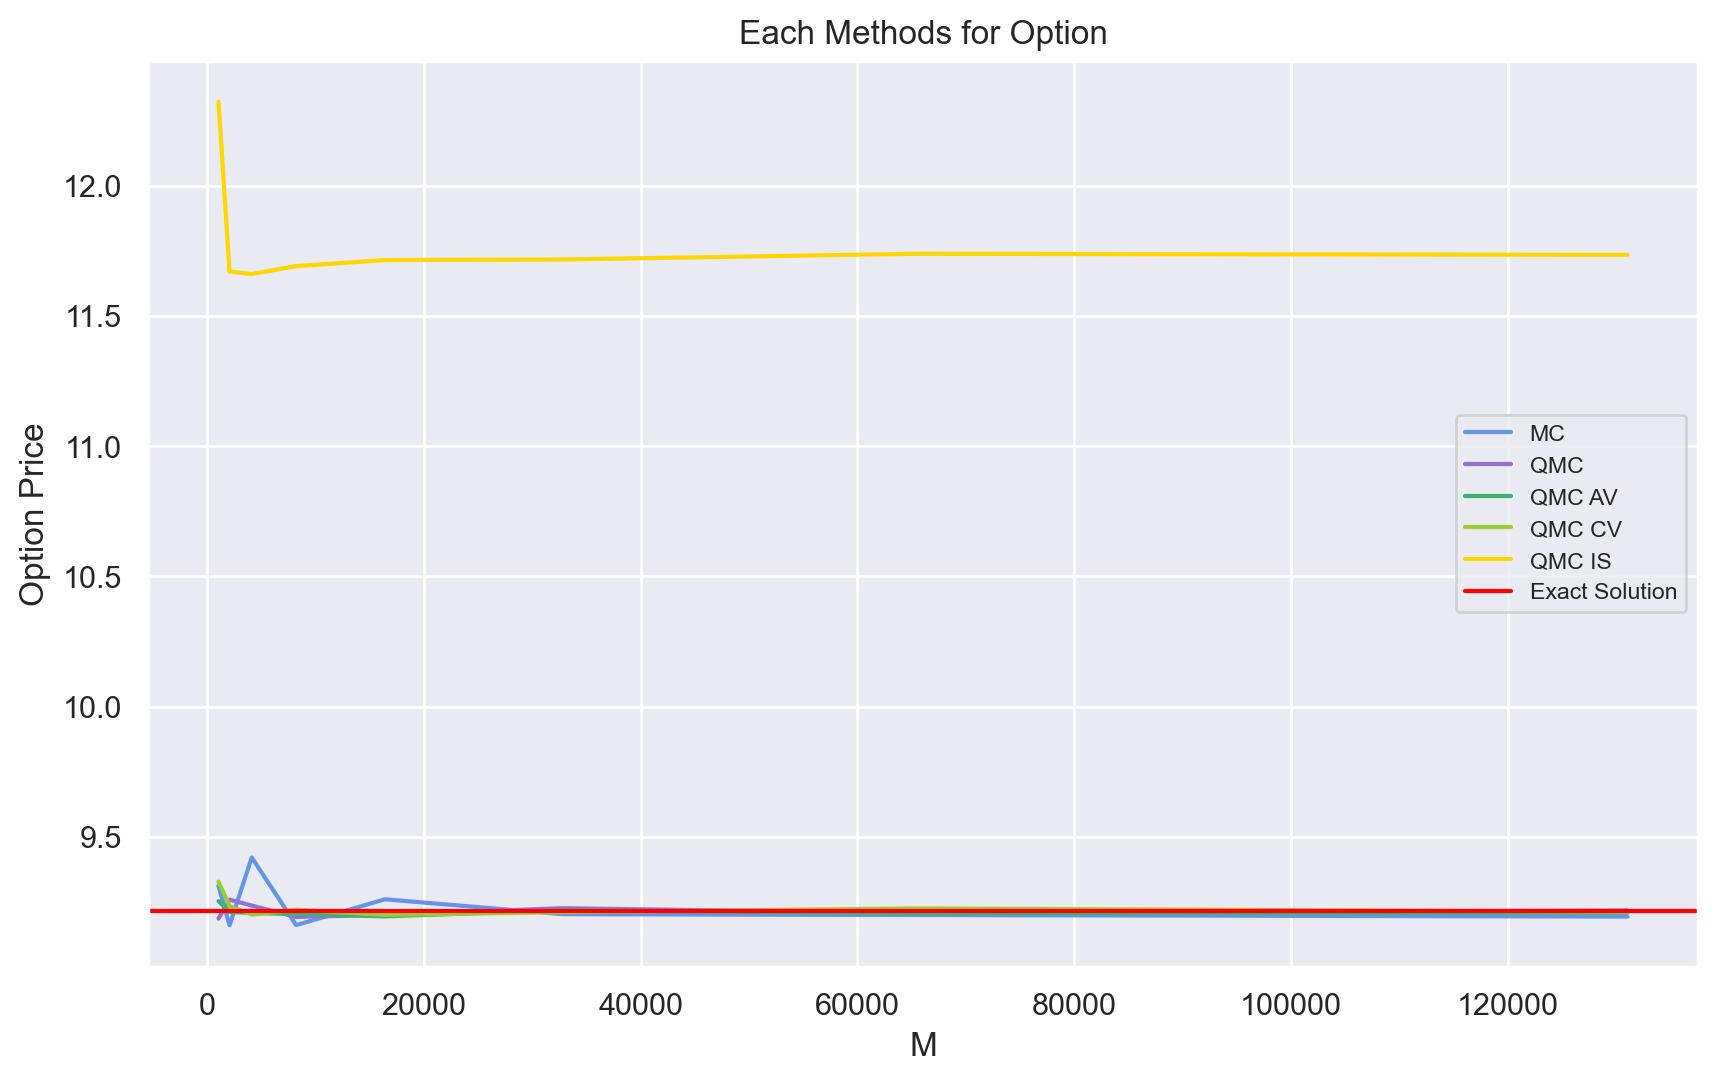

In [1874]:
sns.set()
f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(MC_AS_D.M, MC_AS_D['MC Geomatric Asian Call'], color="cornflowerblue", label="MC", linestyle="-")
ax.plot(QMC_AS_D.M, QMC_AS_D['QMC Geomatric Asian Call'], color="mediumpurple", label="QMC", linestyle="-")
ax.plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Geomatric Asian Call'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax.plot(QMC_AS_CV_D.M,QMC_AS_CV_D['QMC Geomatric Asian Call'], color="yellowgreen", label="QMC CV", linestyle="-")
ax.plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Geomatric Asian Call'], color="gold", label="QMC IS", linestyle="-")
ax.axhline(CG,color = 'red', label="Exact Solution")
ax.set_xlabel('M')
ax.set_ylabel('Option Price')
ax.legend(loc='right', fontsize = 'x-small')
ax.set_title("Each Methods for Option")
plt.show()

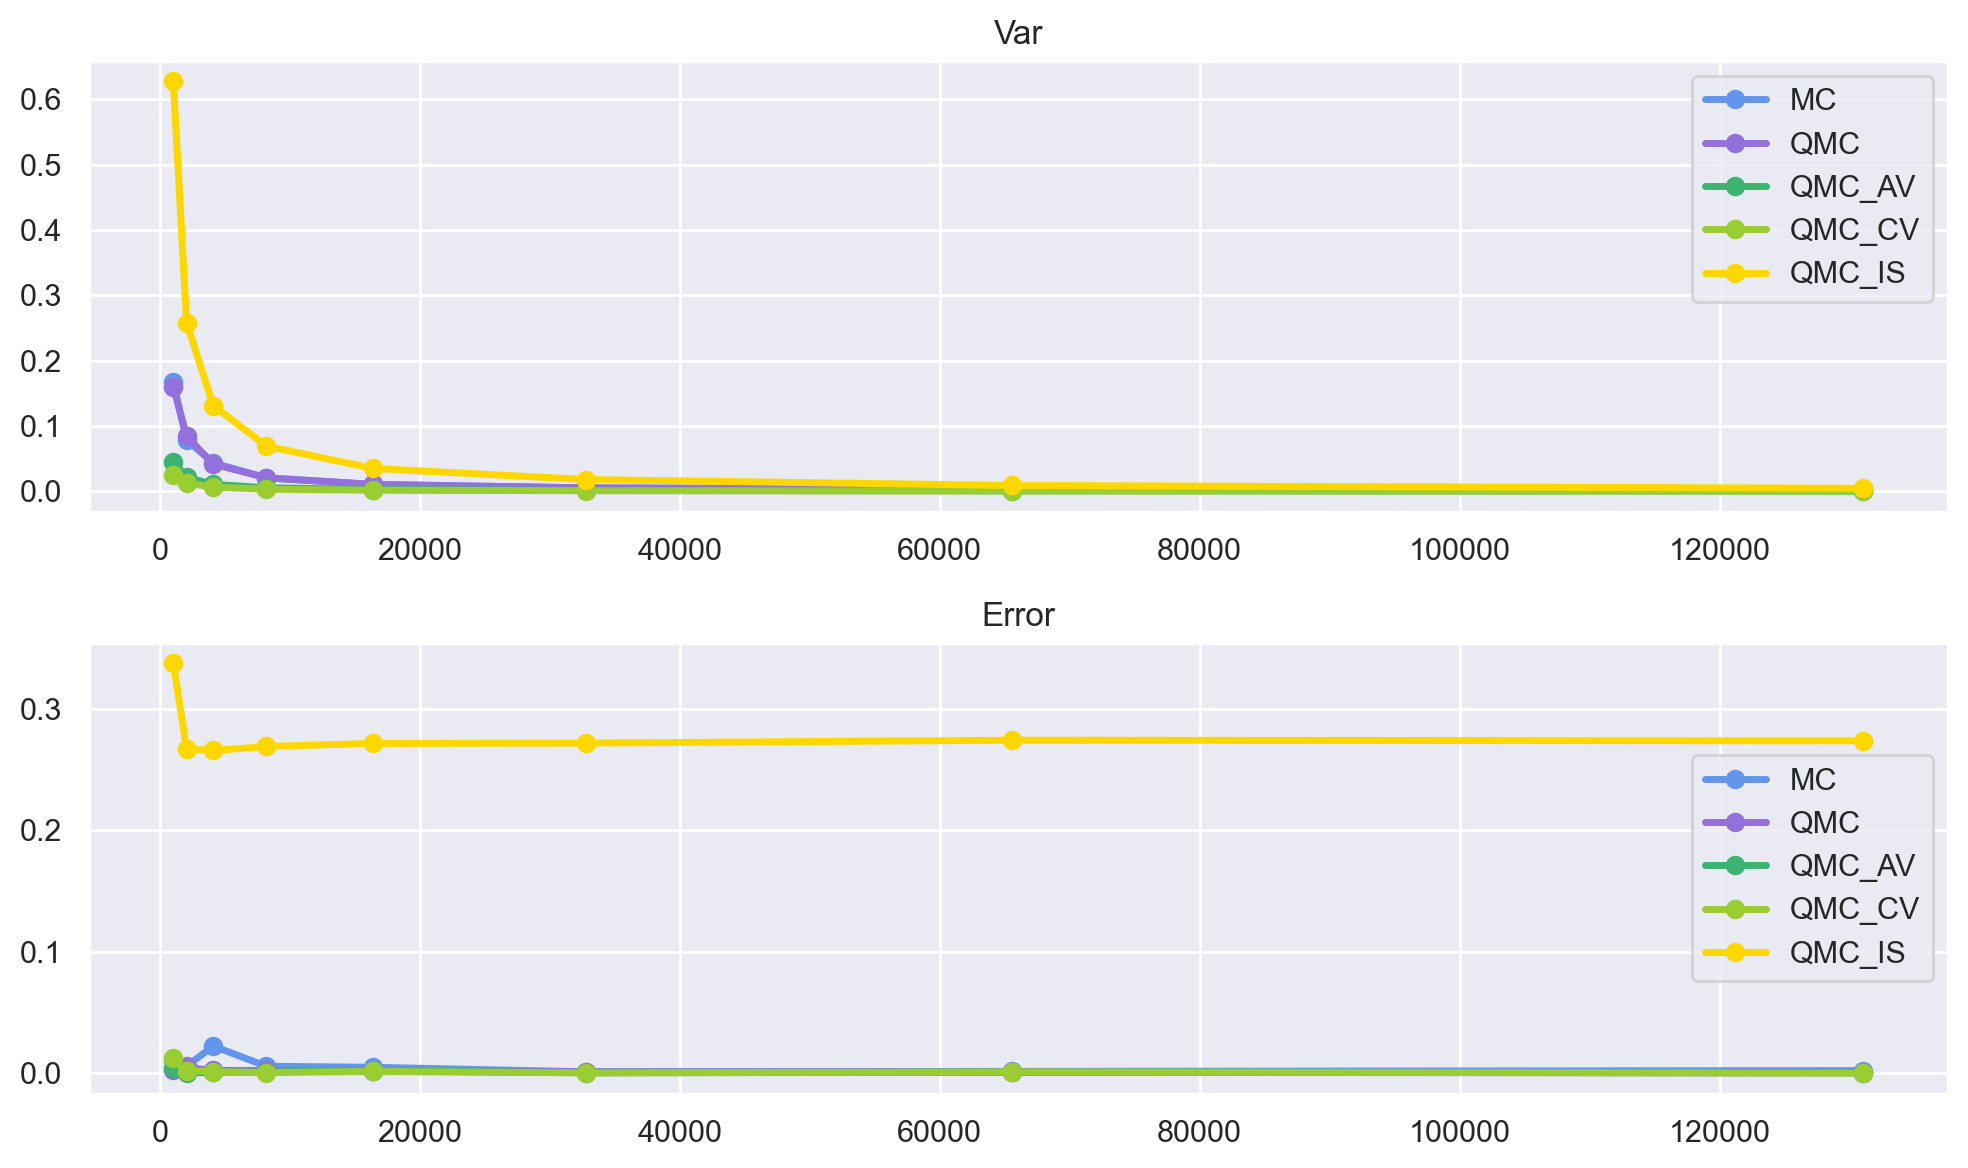

In [1976]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_D.M, MC_AS_D['MC Geomatric Asian Call Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_D.M, QMC_AS_D['QMC Geomatric Asian Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Geomatric Asian Call Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_D.M, QMC_AS_CV_D['QMC Geomatric Asian Call Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Geomatric Asian Call Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(MC_AS_D.M, MC_AS_D['Call Geomatric Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_D.M, QMC_AS_D['Call Geomatric Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_D.M, QMC_AS_AV_D['Call Geomatric Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_D.M, QMC_AS_CV_D['Call Geomatric Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_IS_D.M, QMC_AS_IS_D['Call Geomatric Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Error')
f.tight_layout()
plt.show()

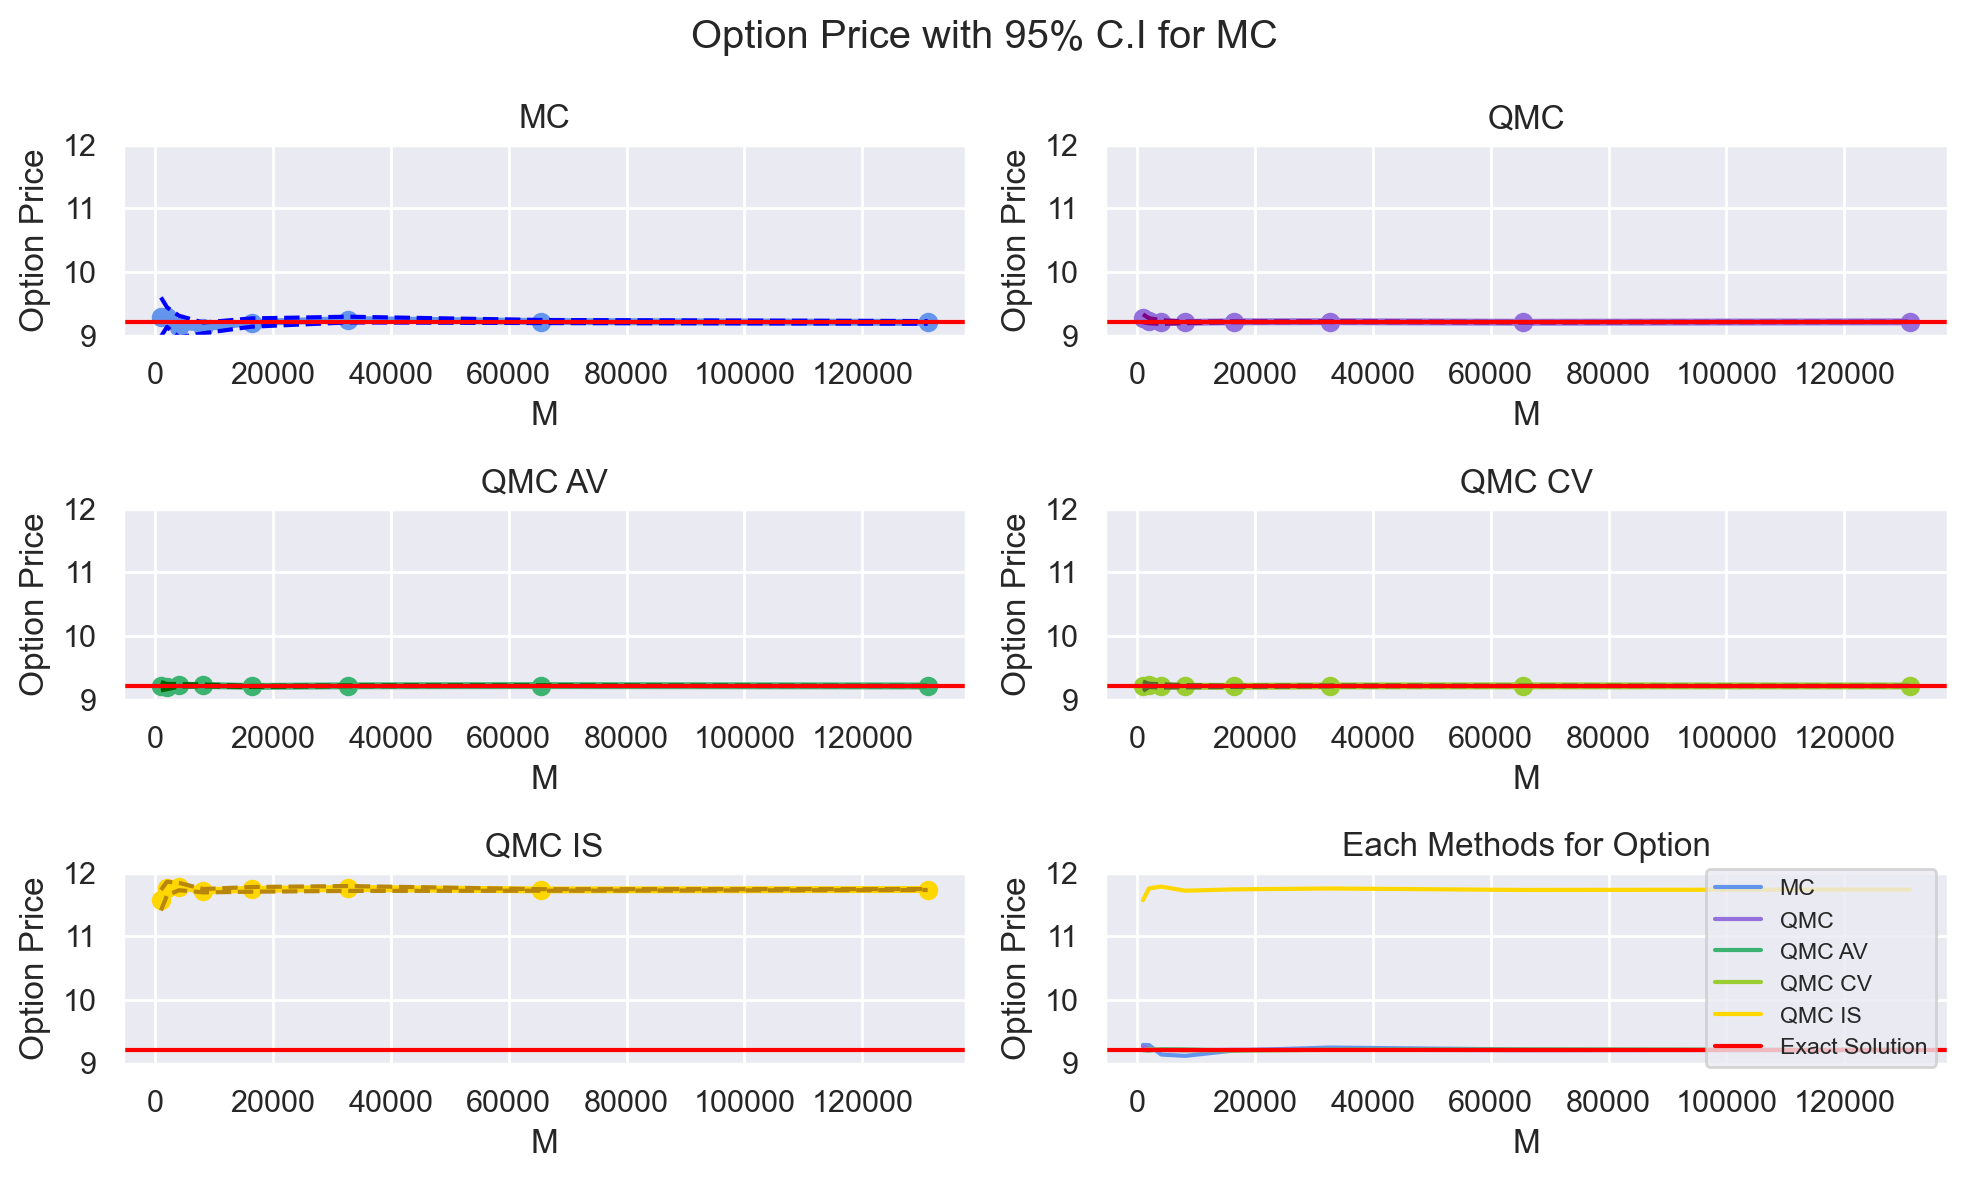

In [1978]:
sns.set()
f, ax = plt.subplots(3, 2,figsize=(10,6))
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Asian Call'], color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Call Var Up'], color="Blue", linestyle="--")
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Call Var Down'], color="Blue", linestyle="--")
ax[0,0].axhline(CG,color = 'red', label="Exact Solution")
ax[0,0].set_xlabel('M')
ax[0,0].set_ylabel('Option Price')
ax[0,0].set_title("MC")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Call'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Call Var Up'], color="Purple", linestyle="--")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Call Var Down'], color="Purple", linestyle="--")
ax[0,1].axhline(CG,color = 'red', label="Exact Solution")
ax[0,1].set_xlabel('M')
ax[0,1].set_ylabel('Option Price')
ax[0,1].set_title("QMC")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Call'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Call Var Up'], color="darkgreen", linestyle="--")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Call Var Down'], color="darkgreen", linestyle="--")
ax[1,0].axhline(CG,color = 'red', label="Exact Solution")
ax[1,0].set_xlabel('M')
ax[1,0].set_ylabel('Option Price')
ax[1,0].set_title("QMC AV")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Call'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Call Var Up'], color="darkolivegreen", linestyle="--")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Call Var Down'], color="darkolivegreen", linestyle="--")
ax[1,1].axhline(CG,color = 'red', label="Exact Solution")
ax[1,1].set_xlabel('M')
ax[1,1].set_ylabel('Option Price')
ax[1,1].set_title("QMC CV")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Call'], color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Call Var Up'], color="darkgoldenrod", linestyle="--")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Call Var Down'], color="darkgoldenrod", linestyle="--")
ax[2,0].axhline(CG,color = 'red', label="Exact Solution")
ax[2,0].set_xlabel('M')
ax[2,0].set_ylabel('Option Price')
ax[2,0].set_title("QMC IS")
ax[2,1].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Asian Call'], color="cornflowerblue", label="MC", linestyle="-")
ax[2,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Call'], color="mediumpurple", label="QMC", linestyle="-")
ax[2,1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Call'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax[2,1].plot(QMC_AS_CV_10.M,QMC_AS_CV_10['MC Geomatric Asian Call'], color="yellowgreen", label="QMC CV", linestyle="-")
ax[2,1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Call'], color="gold", label="QMC IS", linestyle="-")
ax[2,1].axhline(CG,color = 'red', label="Exact Solution")
ax[2,1].set_xlabel('M')
ax[2,1].set_ylabel('Option Price')
ax[2,1].legend(loc='right', fontsize = 'x-small')
ax[2,1].set_title("Each Methods for Option")

ax[0,0].set(ylim=(9,12))
ax[0,1].set(ylim=(9,12))
ax[1,0].set(ylim=(9,12))
ax[1,1].set(ylim=(9,12))
ax[2,0].set(ylim=(9,12))
ax[2,1].set(ylim=(9,12))

f.suptitle('Option Price with 95% C.I for MC')
f.tight_layout()
plt.show()

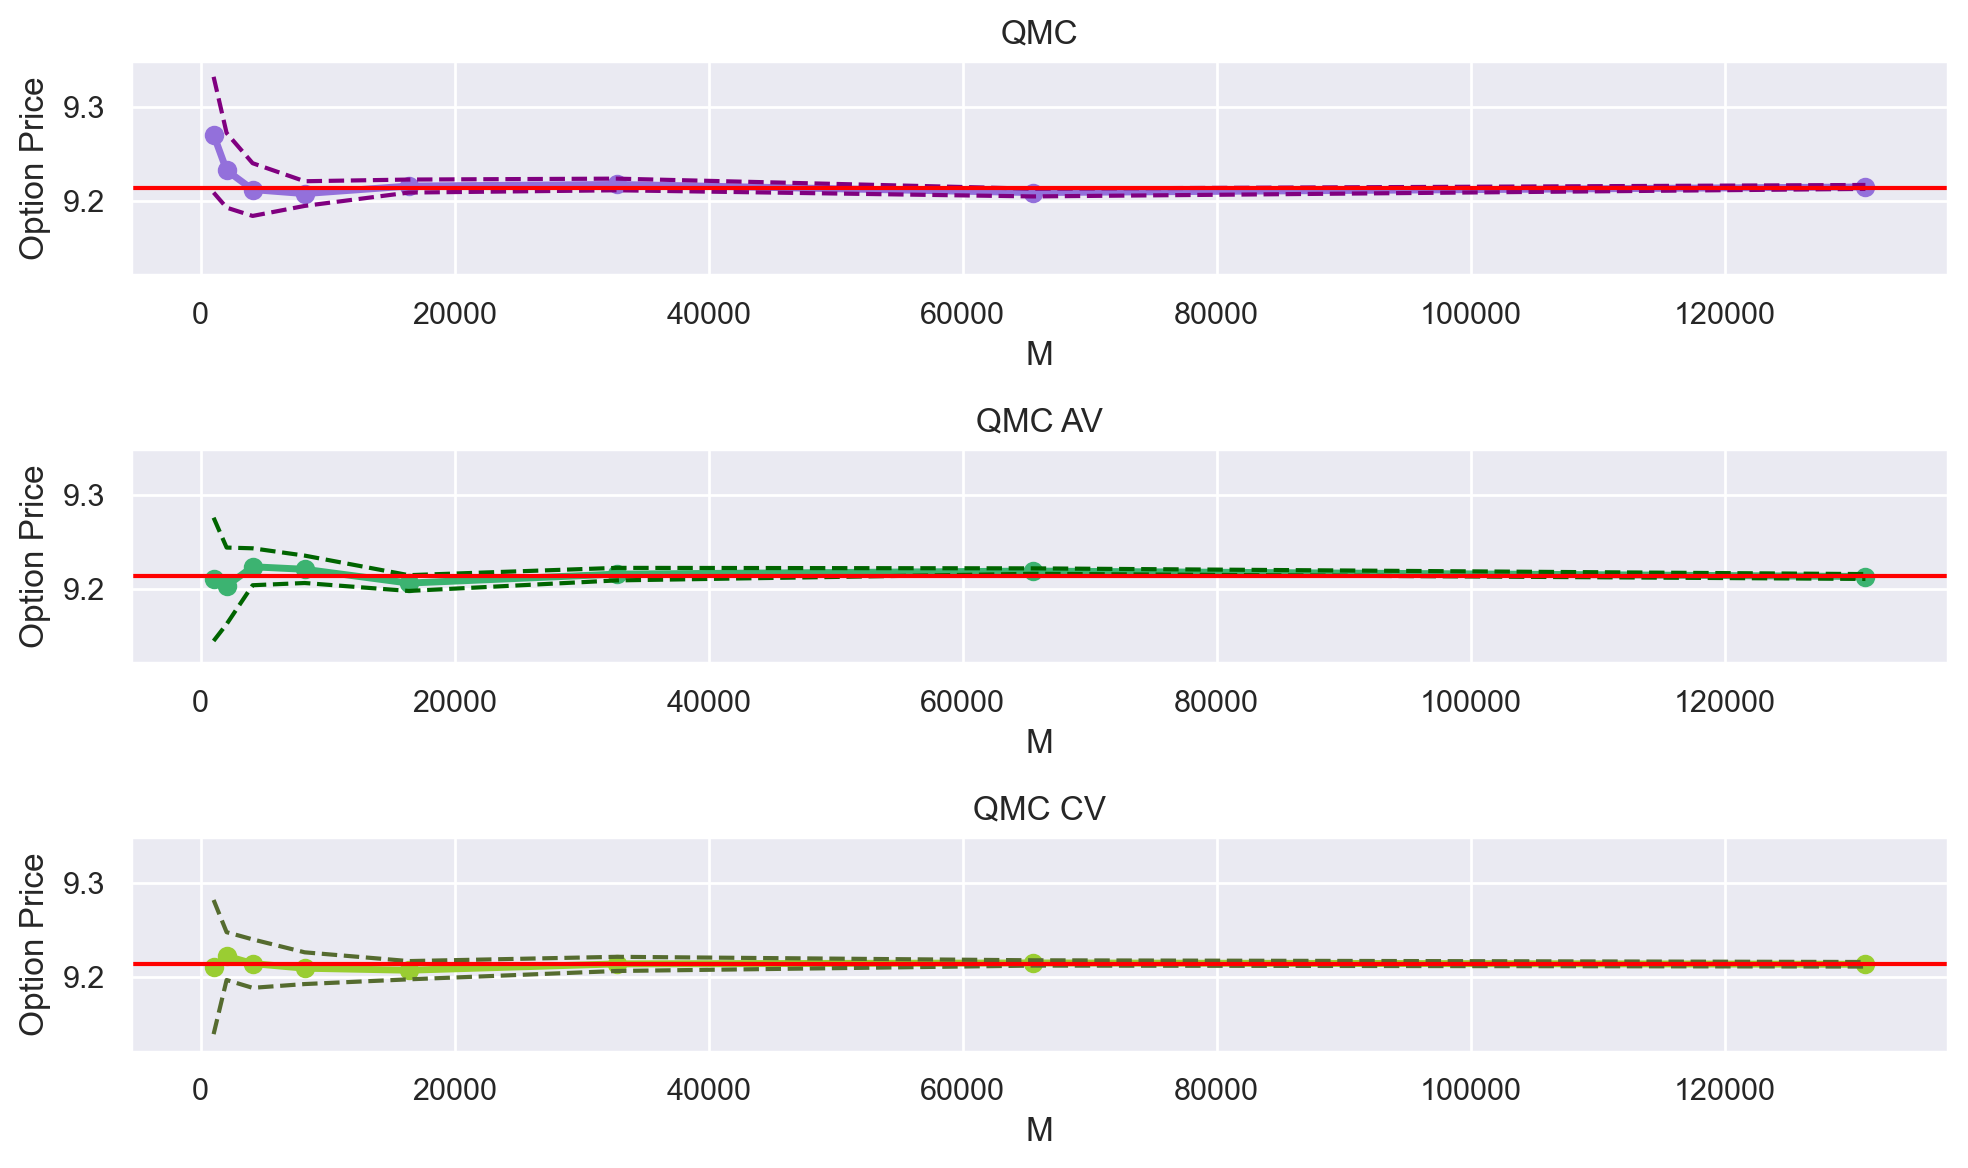

In [1900]:
sns.set()
f, ax = plt.subplots(3, 1,figsize=(10,6))
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Call'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Call Var Up'], color="Purple", linestyle="--")
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Call Var Down'], color="Purple", linestyle="--")
ax[0].axhline(CG,color = 'red', label="Exact Solution")
ax[0].set_xlabel('M')
ax[0].set_ylabel('Option Price')
ax[0].set_title("QMC")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Call'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Call Var Up'], color="darkgreen", linestyle="--")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Call Var Down'], color="darkgreen", linestyle="--")
ax[1].axhline(CG,color = 'red', label="Exact Solution")
ax[1].set_xlabel('M')
ax[1].set_ylabel('Option Price')
ax[1].set_title("QMC AV")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Call'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Call Var Up'], color="darkolivegreen", linestyle="--")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Call Var Down'], color="darkolivegreen", linestyle="--")
ax[2].axhline(CG,color = 'red', label="Exact Solution")
ax[2].set_xlabel('M')
ax[2].set_ylabel('Option Price')
ax[2].set_title("QMC CV")

ax[0].set(ylim=(9.12,9.35))
ax[1].set(ylim=(9.12,9.35))
ax[2].set(ylim=(9.12,9.35))
f.tight_layout()
plt.show()


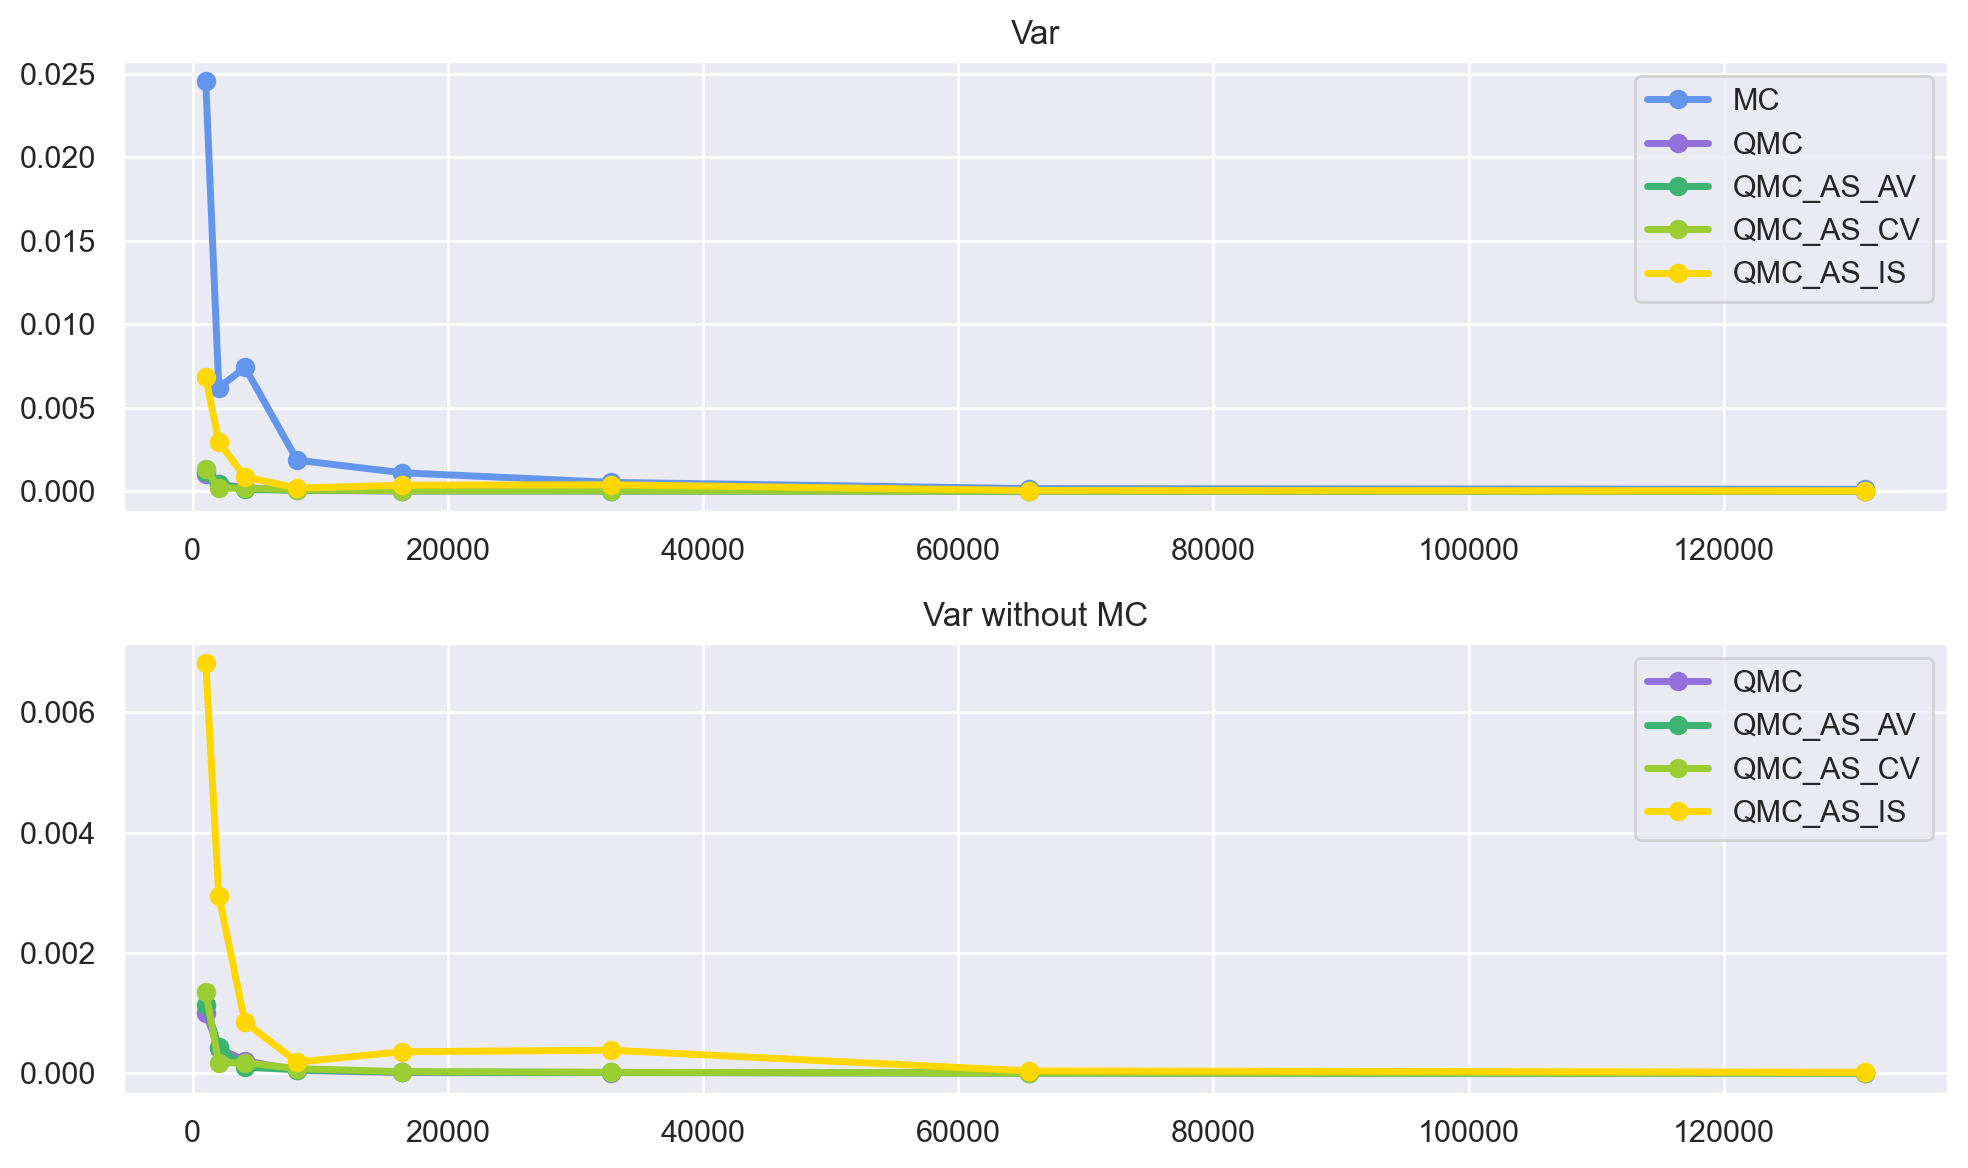

In [1979]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Asian Call Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Call Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Call Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Call Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Call Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Call Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Call Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Var without MC')
f.tight_layout()
plt.show()

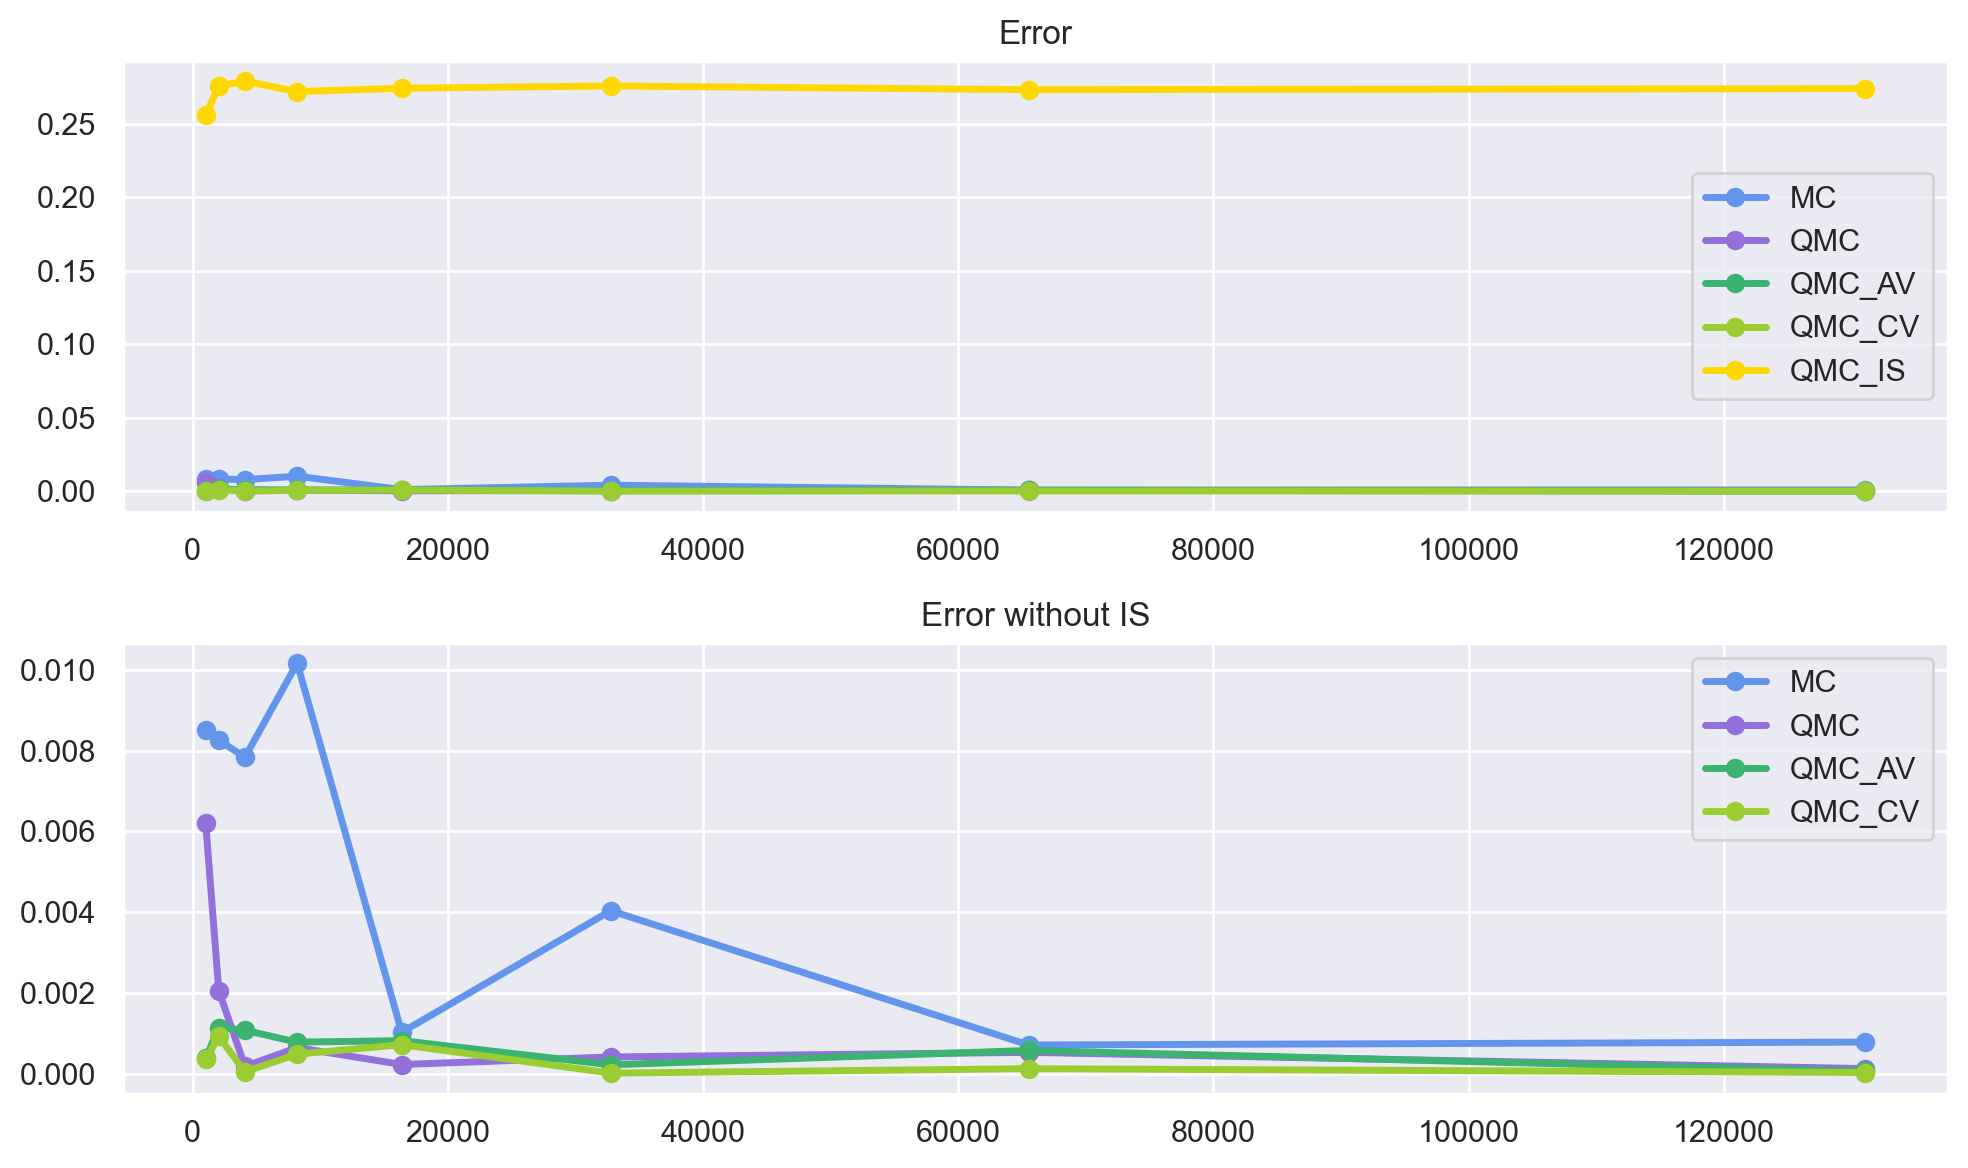

In [1980]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_10.M, MC_AS_10['Call Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['Call Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['Call Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['Call Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['Call Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Error')
ax[1].plot(MC_AS_10.M, MC_AS_10['Call Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_10.M, QMC_AS_10['Call Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['Call Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['Call Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Error without IS')
f.tight_layout()
plt.show()

### Asian Geomatric  Put 

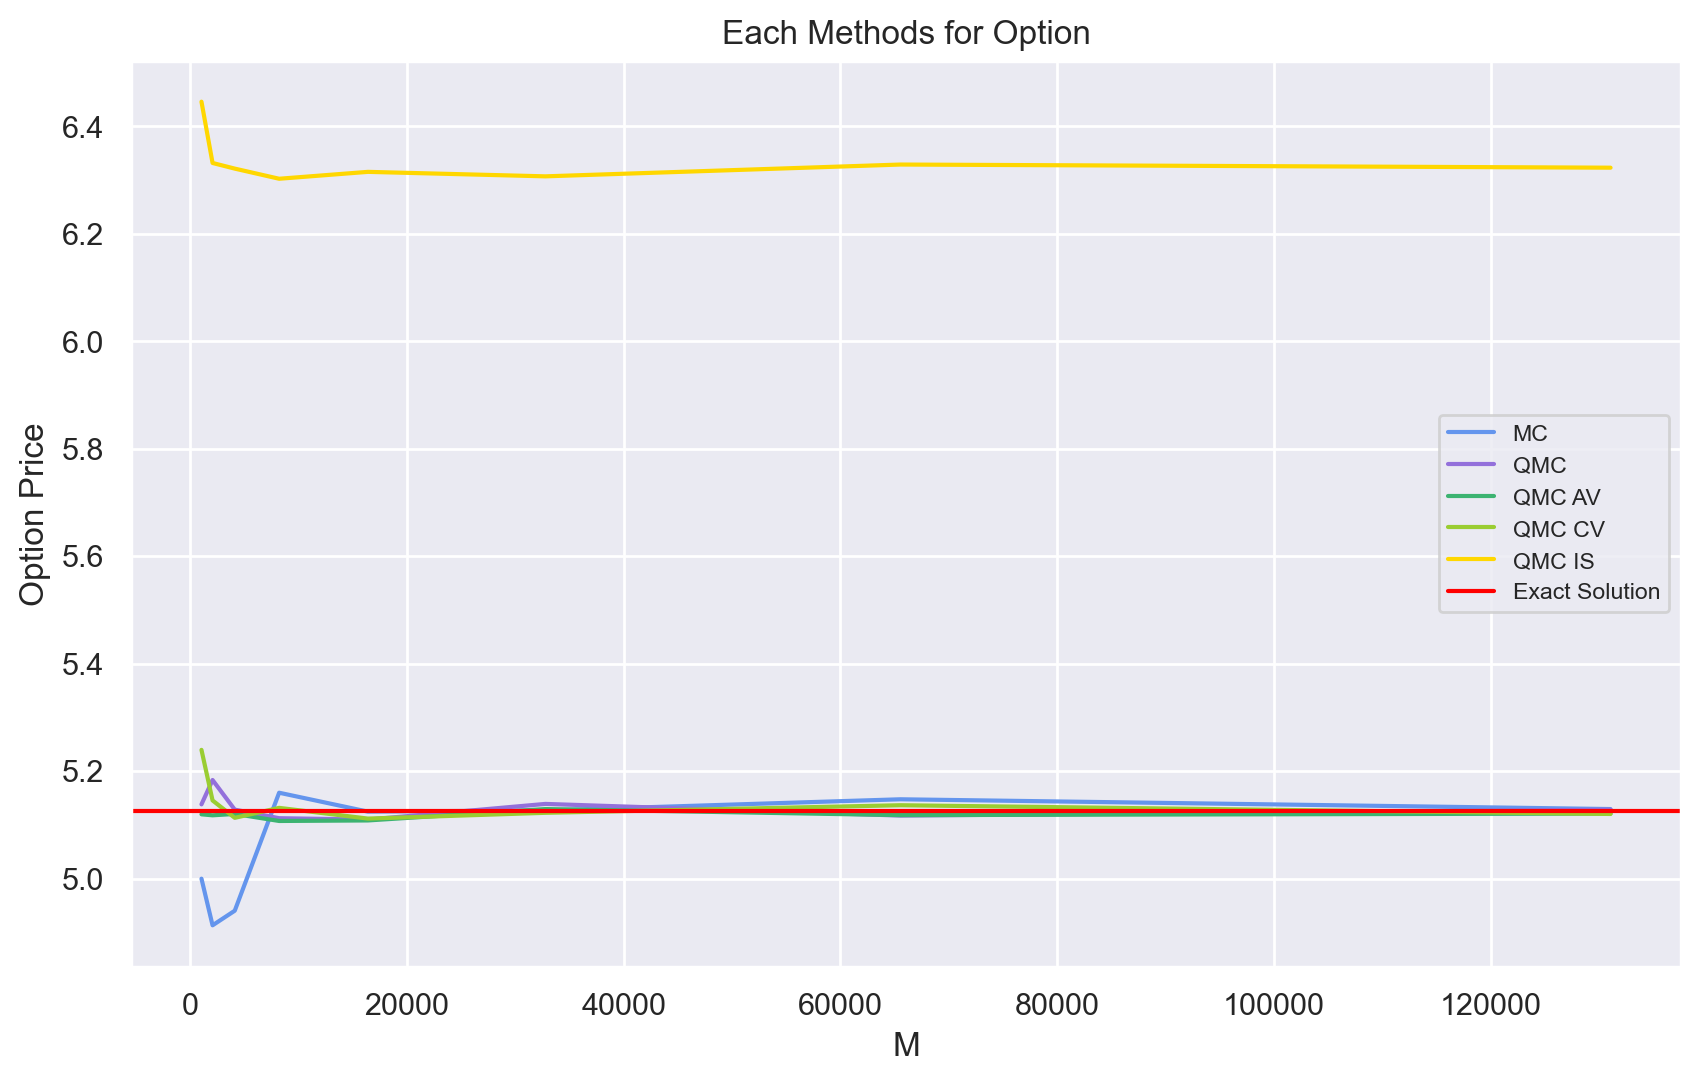

In [1904]:
sns.set()
f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(MC_AS_D.M, MC_AS_D['MC Geomatric Asian Put'], color="cornflowerblue", label="MC", linestyle="-")
ax.plot(QMC_AS_D.M, QMC_AS_D['QMC Geomatric Asian Put'], color="mediumpurple", label="QMC", linestyle="-")
ax.plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Geomatric Asian Put'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax.plot(QMC_AS_CV_D.M,QMC_AS_CV_D['QMC Geomatric Asian Put'], color="yellowgreen", label="QMC CV", linestyle="-")
ax.plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Geomatric Asian Put'], color="gold", label="QMC IS", linestyle="-")
ax.axhline(PG,color = 'red', label="Exact Solution")
ax.set_xlabel('M')
ax.set_ylabel('Option Price')
ax.legend(loc='right', fontsize = 'x-small')
ax.set_title("Each Methods for Option")
plt.show()

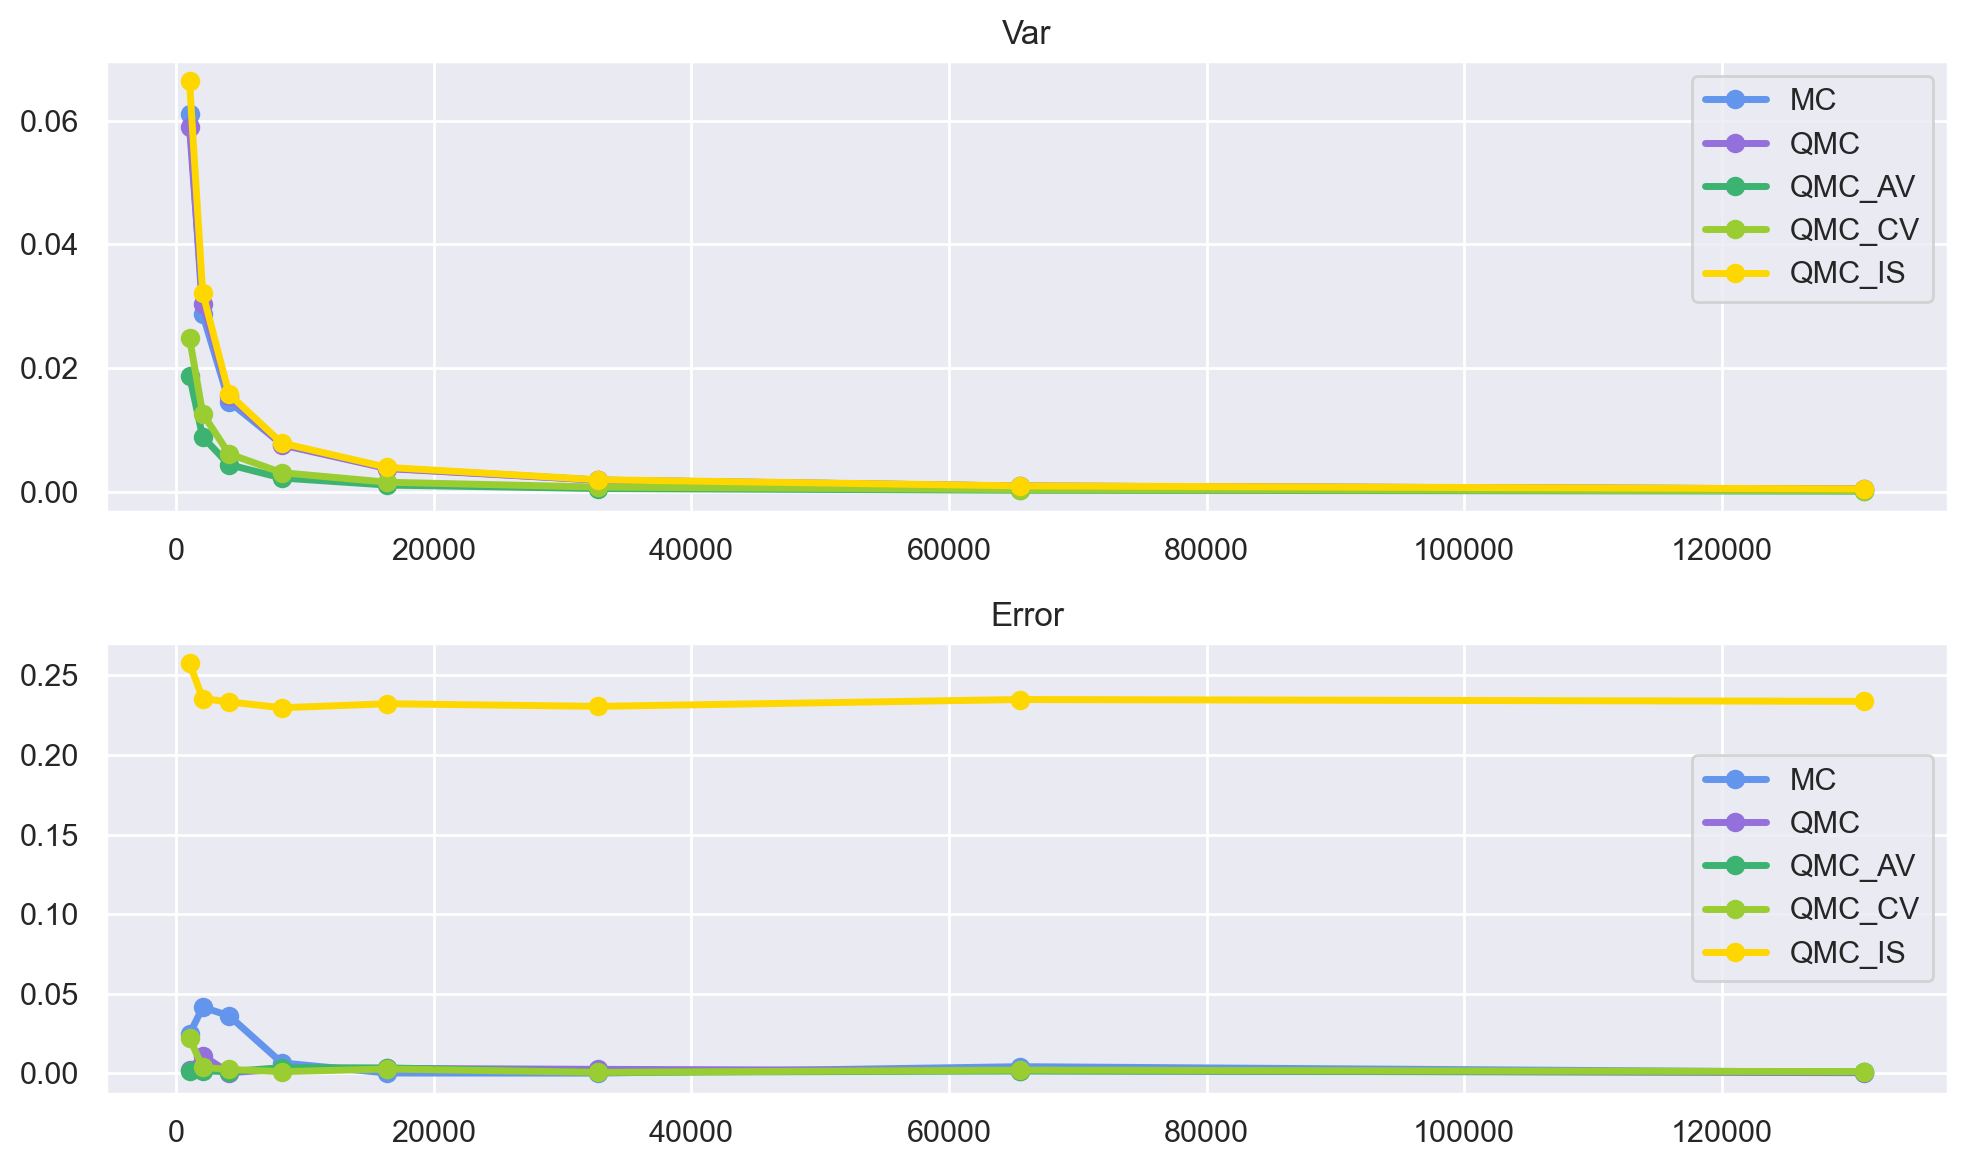

In [1982]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_D.M, MC_AS_D['MC Geomatric Asian Put Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_D.M, QMC_AS_D['QMC Geomatric Asian Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Geomatric Asian Put Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_D.M, QMC_AS_CV_D['QMC Geomatric Asian Put Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Geomatric Asian Put Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(MC_AS_D.M, MC_AS_D['Put Geomatric Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_D.M, QMC_AS_D['Put Geomatric Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_D.M, QMC_AS_AV_D['Put Geomatric Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_D.M, QMC_AS_CV_D['Put Geomatric Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_IS_D.M, QMC_AS_IS_D['Put Geomatric Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Error')
f.tight_layout()
plt.show()

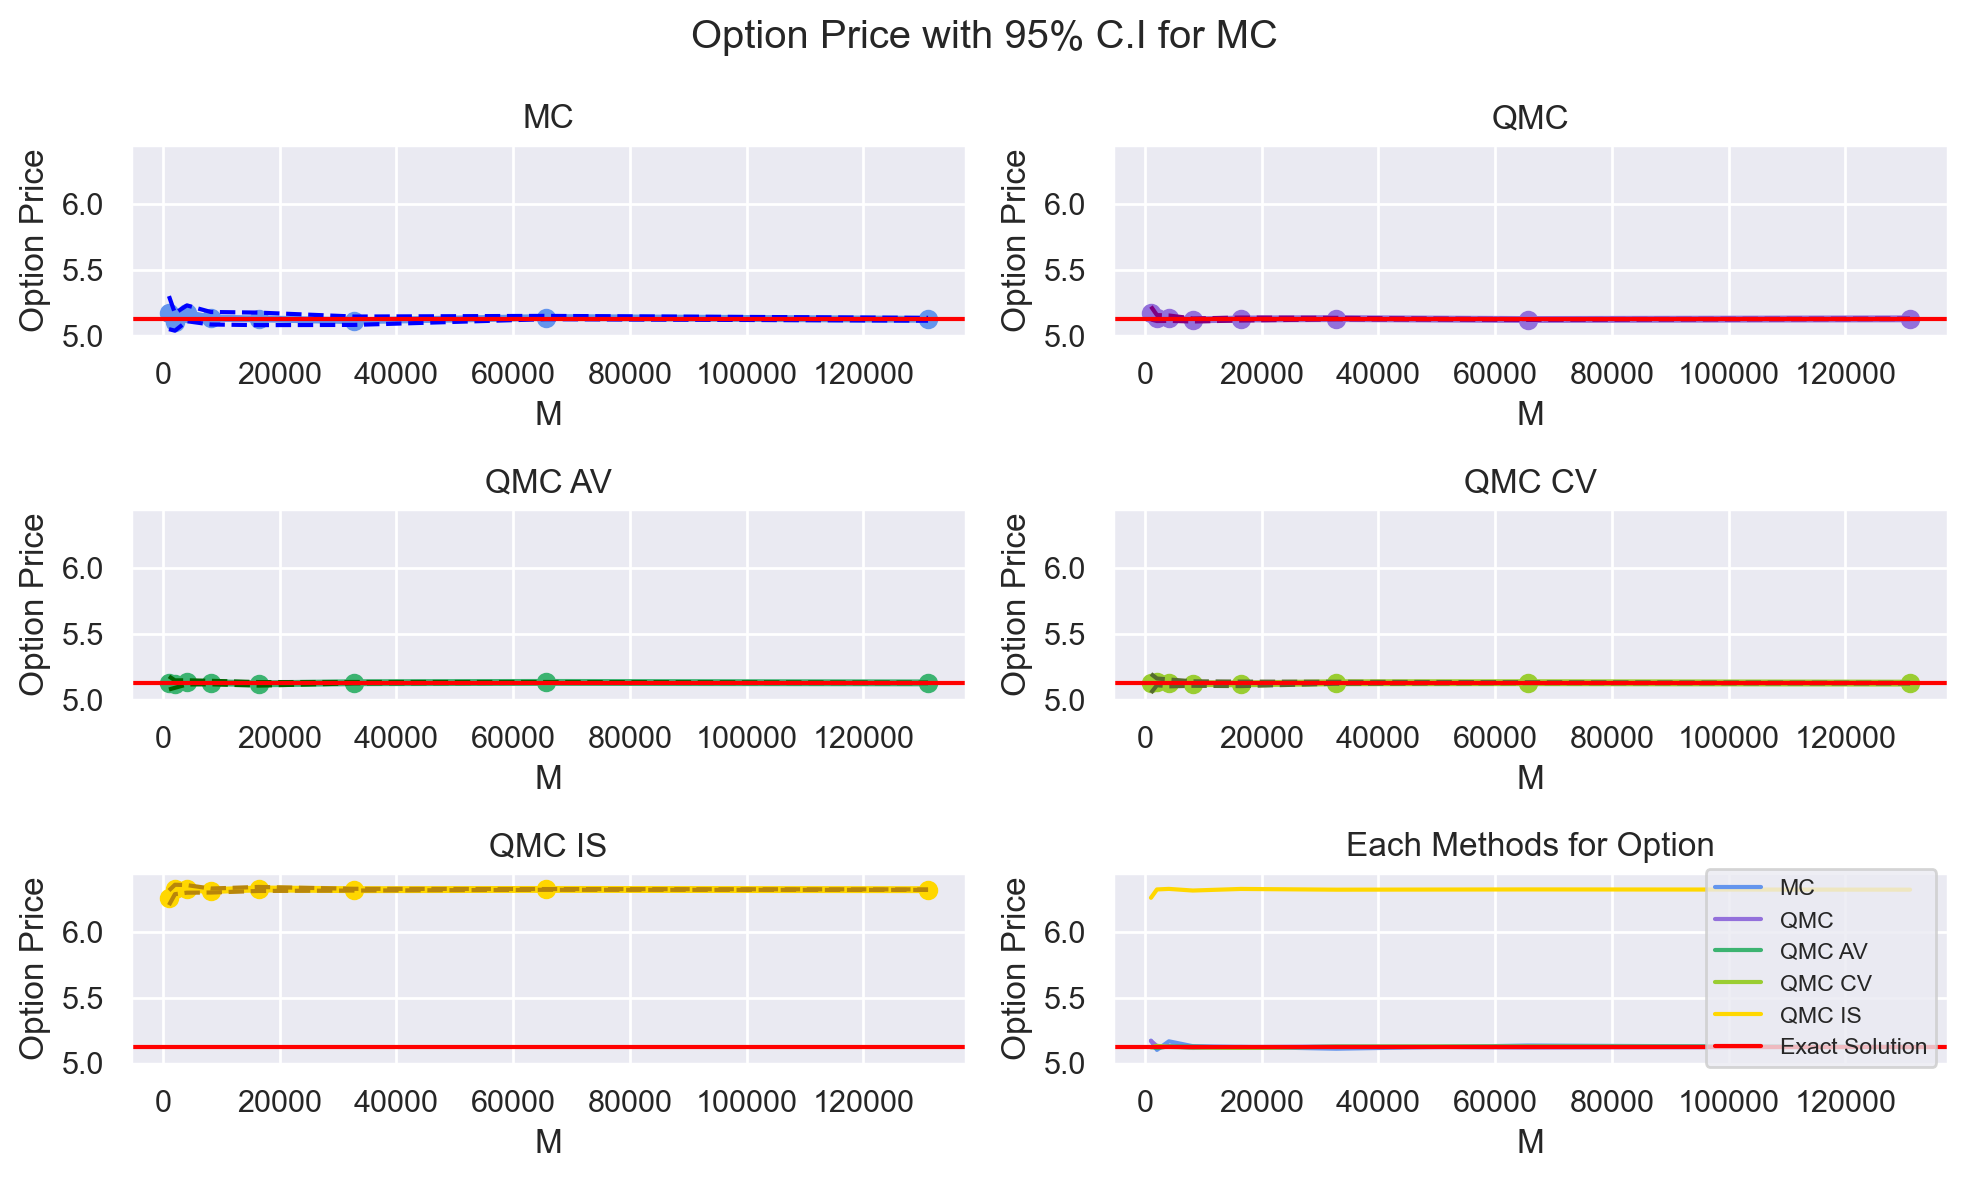

In [1981]:
sns.set()
f, ax = plt.subplots(3, 2,figsize=(10,6))
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Asian Put'], color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Put Var Up'], color="Blue", linestyle="--")
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Put Var Down'], color="Blue", linestyle="--")
ax[0,0].axhline(PG,color = 'red', label="Exact Solution")
ax[0,0].set_xlabel('M')
ax[0,0].set_ylabel('Option Price')
ax[0,0].set_title("MC")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Put'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Put Var Up'], color="Purple", linestyle="--")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Put Var Down'], color="Purple", linestyle="--")
ax[0,1].axhline(PG,color = 'red', label="Exact Solution")
ax[0,1].set_xlabel('M')
ax[0,1].set_ylabel('Option Price')
ax[0,1].set_title("QMC")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Put'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Put Var Up'], color="darkgreen", linestyle="--")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Put Var Down'], color="darkgreen", linestyle="--")
ax[1,0].axhline(PG,color = 'red', label="Exact Solution")
ax[1,0].set_xlabel('M')
ax[1,0].set_ylabel('Option Price')
ax[1,0].set_title("QMC AV")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Put'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Put Var Up'], color="darkolivegreen", linestyle="--")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Put Var Down'], color="darkolivegreen", linestyle="--")
ax[1,1].axhline(PG,color = 'red', label="Exact Solution")
ax[1,1].set_xlabel('M')
ax[1,1].set_ylabel('Option Price')
ax[1,1].set_title("QMC CV")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Put'], color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Put Var Up'], color="darkgoldenrod", linestyle="--")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Put Var Down'], color="darkgoldenrod", linestyle="--")
ax[2,0].axhline(PG,color = 'red', label="Exact Solution")
ax[2,0].set_xlabel('M')
ax[2,0].set_ylabel('Option Price')
ax[2,0].set_title("QMC IS")
ax[2,1].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Asian Put'], color="cornflowerblue", label="MC", linestyle="-")
ax[2,1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Put'], color="mediumpurple", label="QMC", linestyle="-")
ax[2,1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Put'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax[2,1].plot(QMC_AS_CV_10.M,QMC_AS_CV_10['MC Geomatric Asian Put'], color="yellowgreen", label="QMC CV", linestyle="-")
ax[2,1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Put'], color="gold", label="QMC IS", linestyle="-")
ax[2,1].axhline(PG,color = 'red', label="Exact Solution")
ax[2,1].set_xlabel('M')
ax[2,1].set_ylabel('Option Price')
ax[2,1].legend(loc='right', fontsize = 'x-small')
ax[2,1].set_title("Each Methods for Option")

ax[0,0].set(ylim=(5,6.45))
ax[0,1].set(ylim=(5,6.45))
ax[1,0].set(ylim=(5,6.45))
ax[1,1].set(ylim=(5,6.45))
ax[2,0].set(ylim=(5,6.45))
ax[2,1].set(ylim=(5,6.45))

f.suptitle('Option Price with 95% C.I for MC')
f.tight_layout()
plt.show()


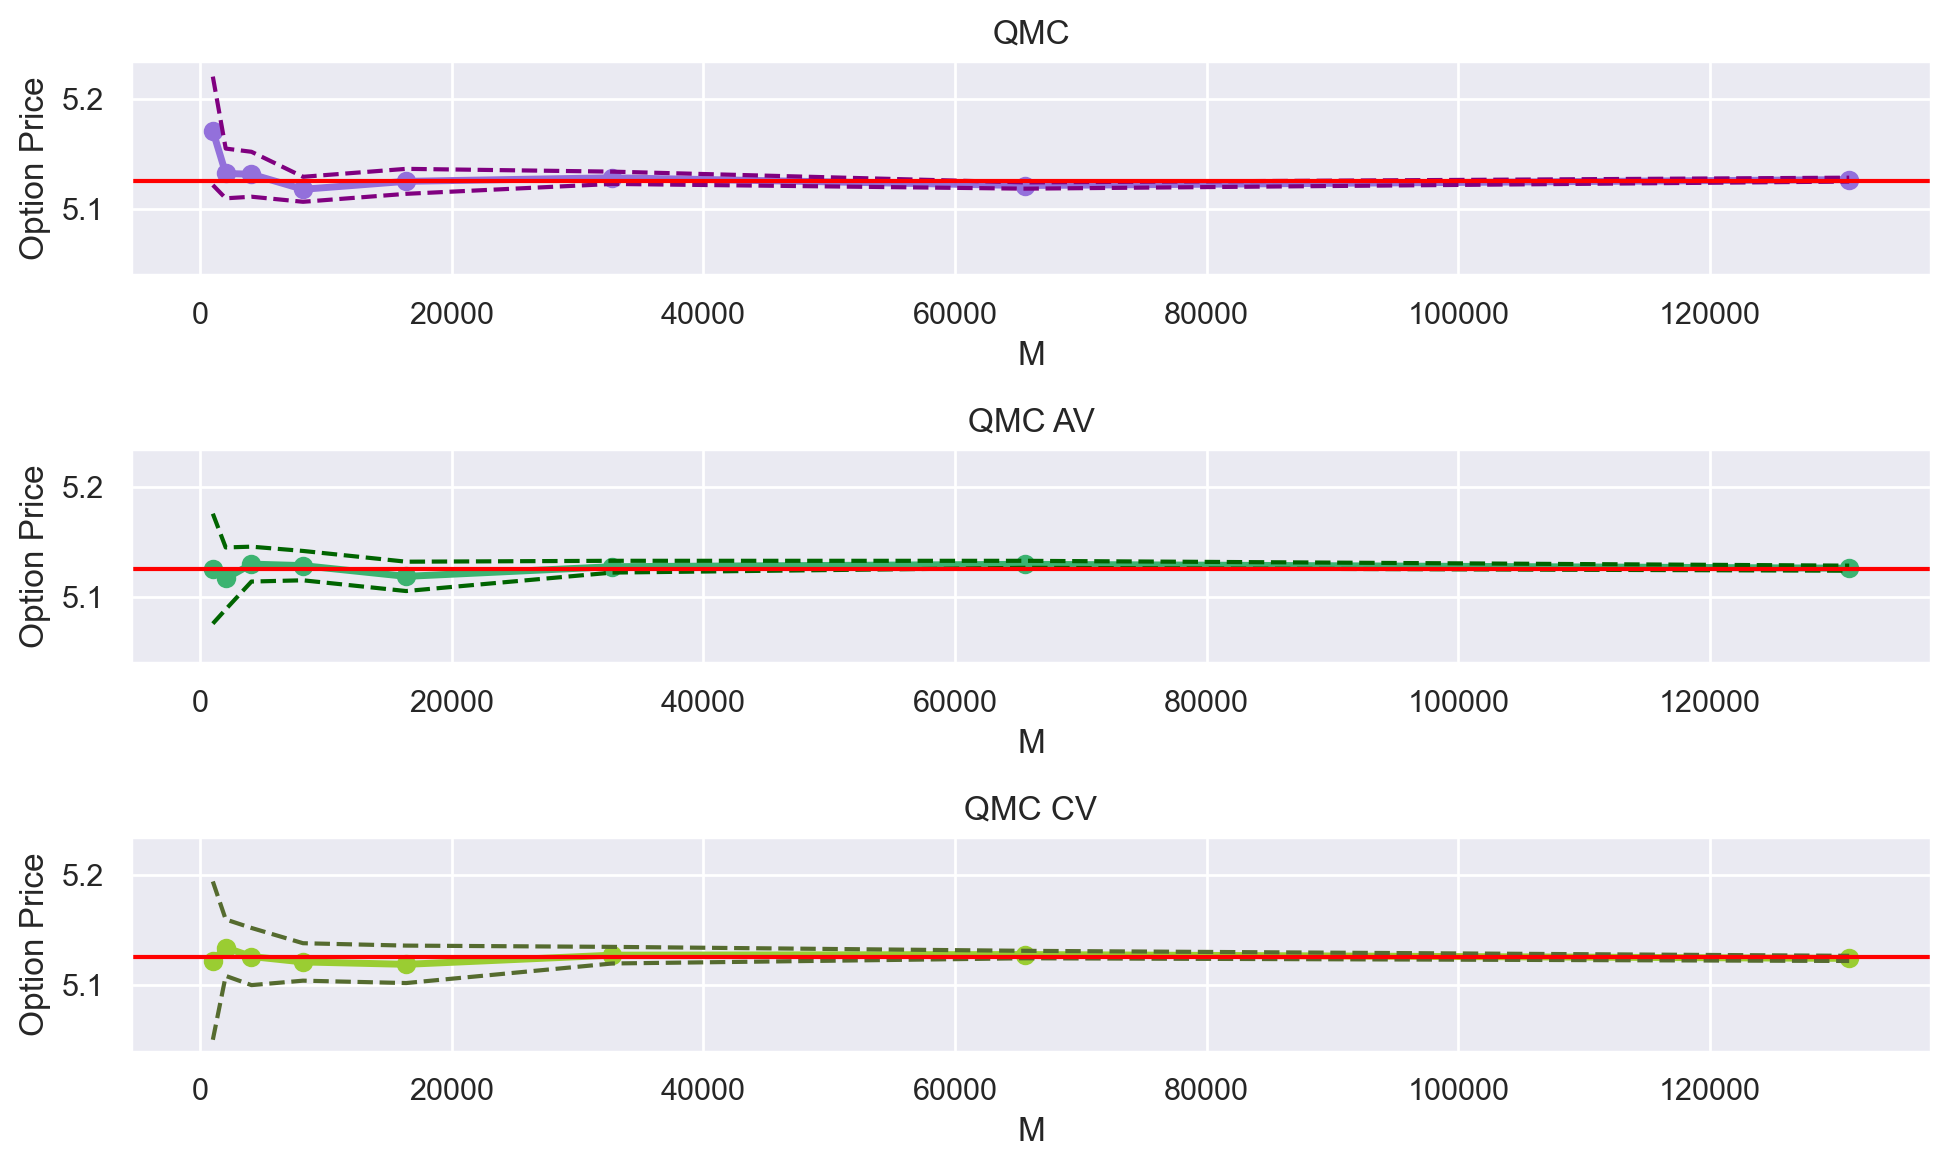

In [1920]:
sns.set()
f, ax = plt.subplots(3, 1,figsize=(10,6))
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Put'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Put Var Up'], color="Purple", linestyle="--")
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Put Var Down'], color="Purple", linestyle="--")
ax[0].axhline(PG,color = 'red', label="Exact Solution")
ax[0].set_xlabel('M')
ax[0].set_ylabel('Option Price')
ax[0].set_title("QMC")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Put'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Put Var Up'], color="darkgreen", linestyle="--")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Put Var Down'], color="darkgreen", linestyle="--")
ax[1].axhline(PG,color = 'red', label="Exact Solution")
ax[1].set_xlabel('M')
ax[1].set_ylabel('Option Price')
ax[1].set_title("QMC AV")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Put'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Put Var Up'], color="darkolivegreen", linestyle="--")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Put Var Down'], color="darkolivegreen", linestyle="--")
ax[2].axhline(PG,color = 'red', label="Exact Solution")
ax[2].set_xlabel('M')
ax[2].set_ylabel('Option Price')
ax[2].set_title("QMC CV")

ax[0].set(ylim=(5.04,5.235))
ax[1].set(ylim=(5.04,5.235))
ax[2].set(ylim=(5.04,5.235))
f.tight_layout()
plt.show()

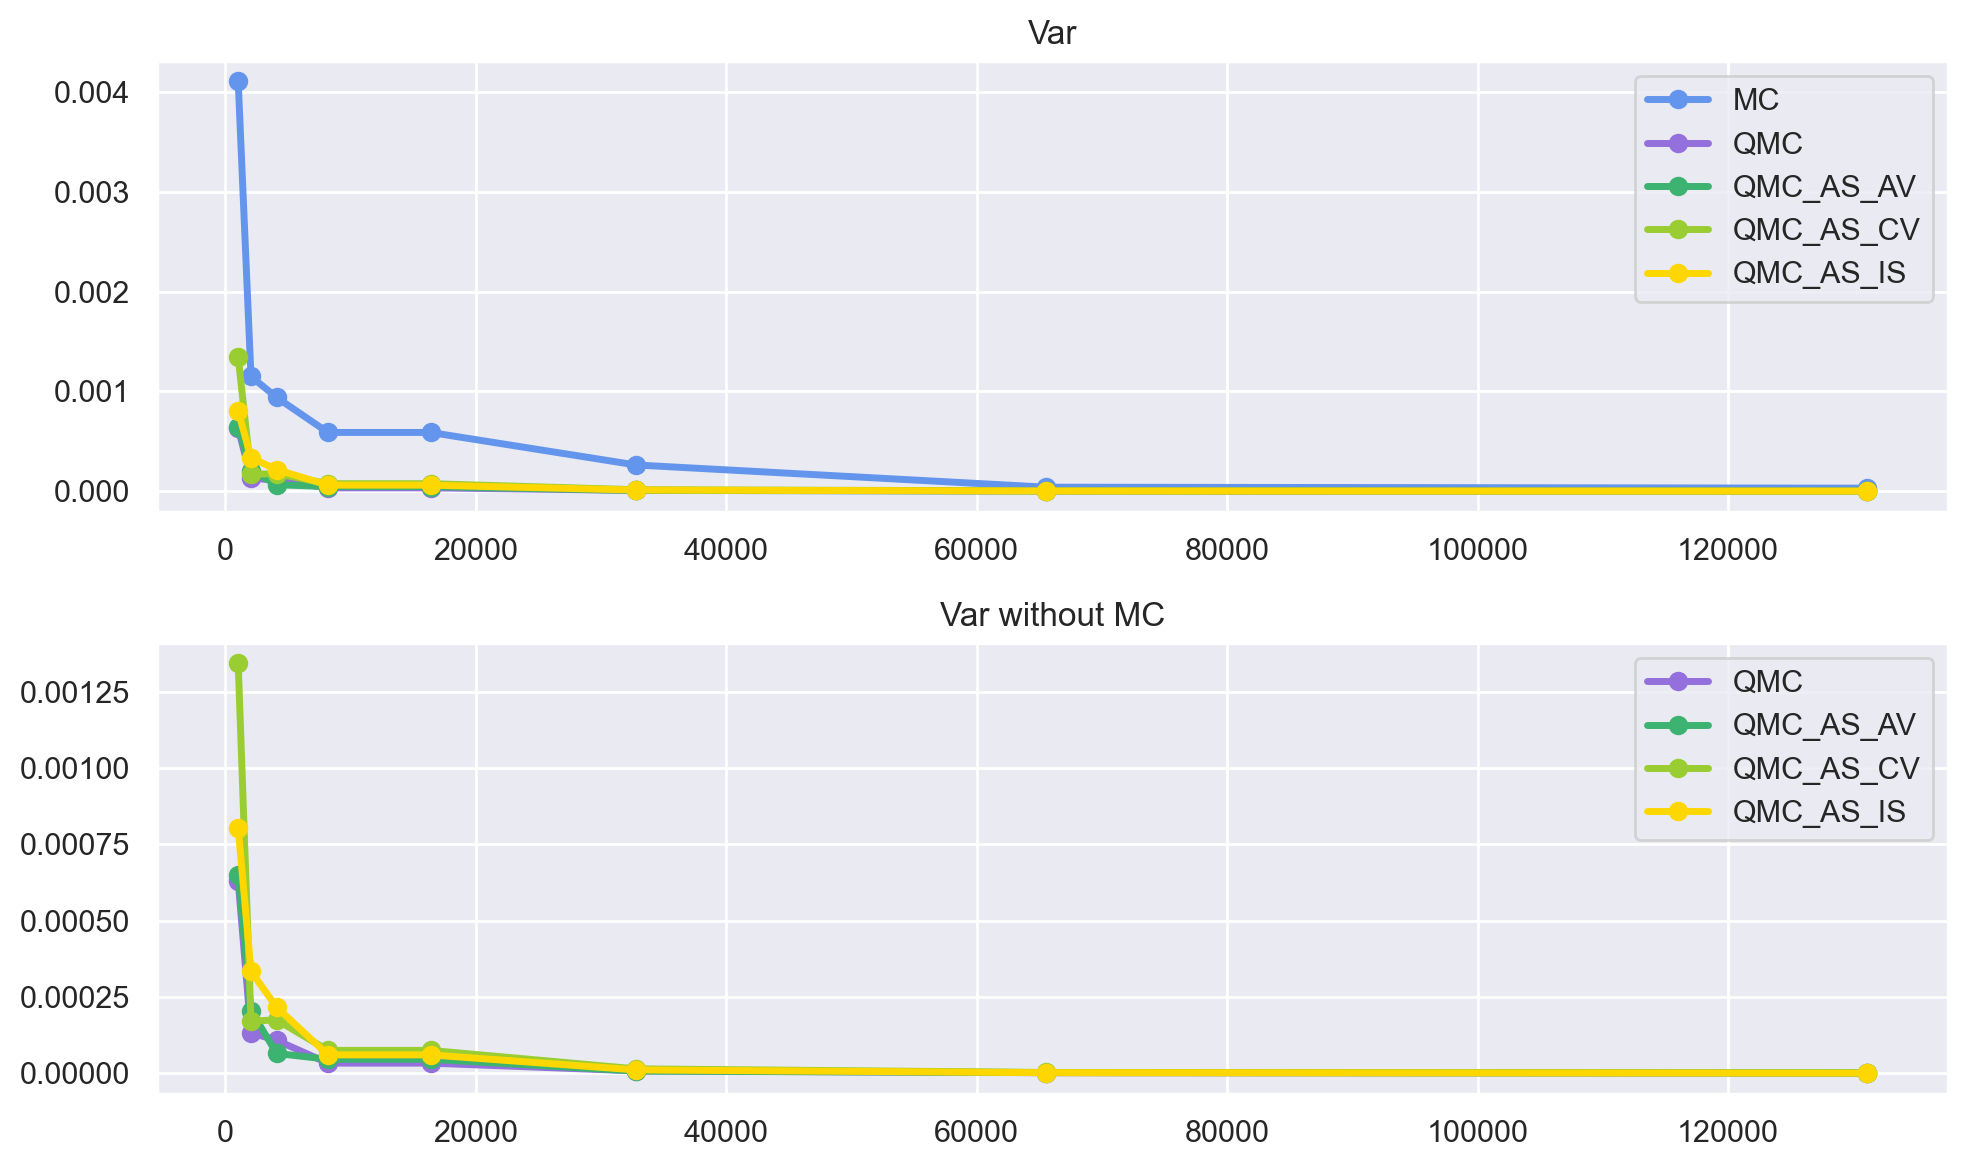

In [1983]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_10.M, MC_AS_10['MC Geomatric Asian Put Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Put Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Put Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Put Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(QMC_AS_10.M, QMC_AS_10['MC Geomatric Asian Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Geomatric Asian Put Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Geomatric Asian Put Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Geomatric Asian Put Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Var without MC')
f.tight_layout()
plt.show()

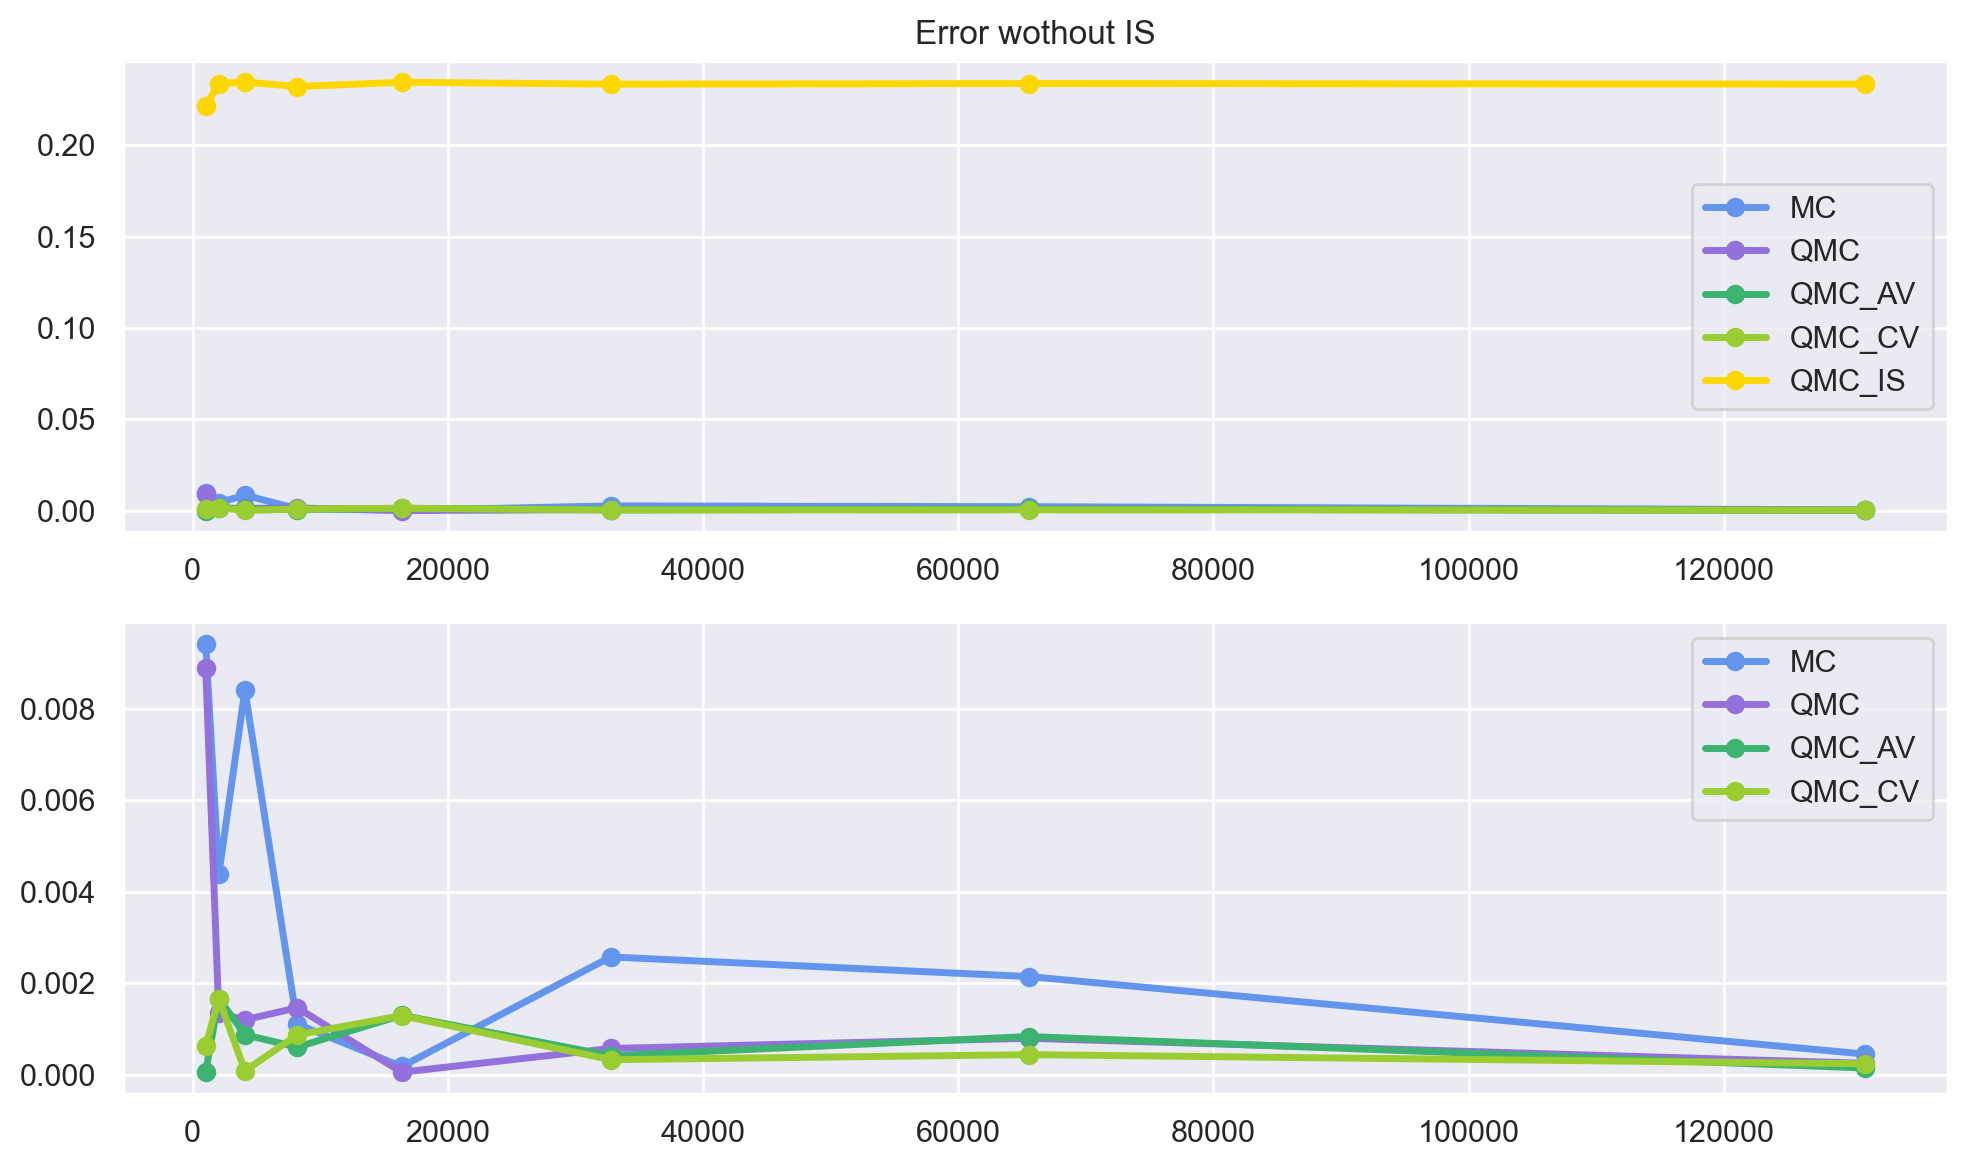

In [1984]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_10.M, MC_AS_10['Put Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['Put Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['Put Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['Put Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['Put Error'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Error')
ax[1].plot(MC_AS_10.M, MC_AS_10['Put Error'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_10.M, QMC_AS_10['Put Error'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['Put Error'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['Put Error'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[0].set_title('Error wothout IS')
f.tight_layout()
plt.show()

### Asian Arithmetic Call 

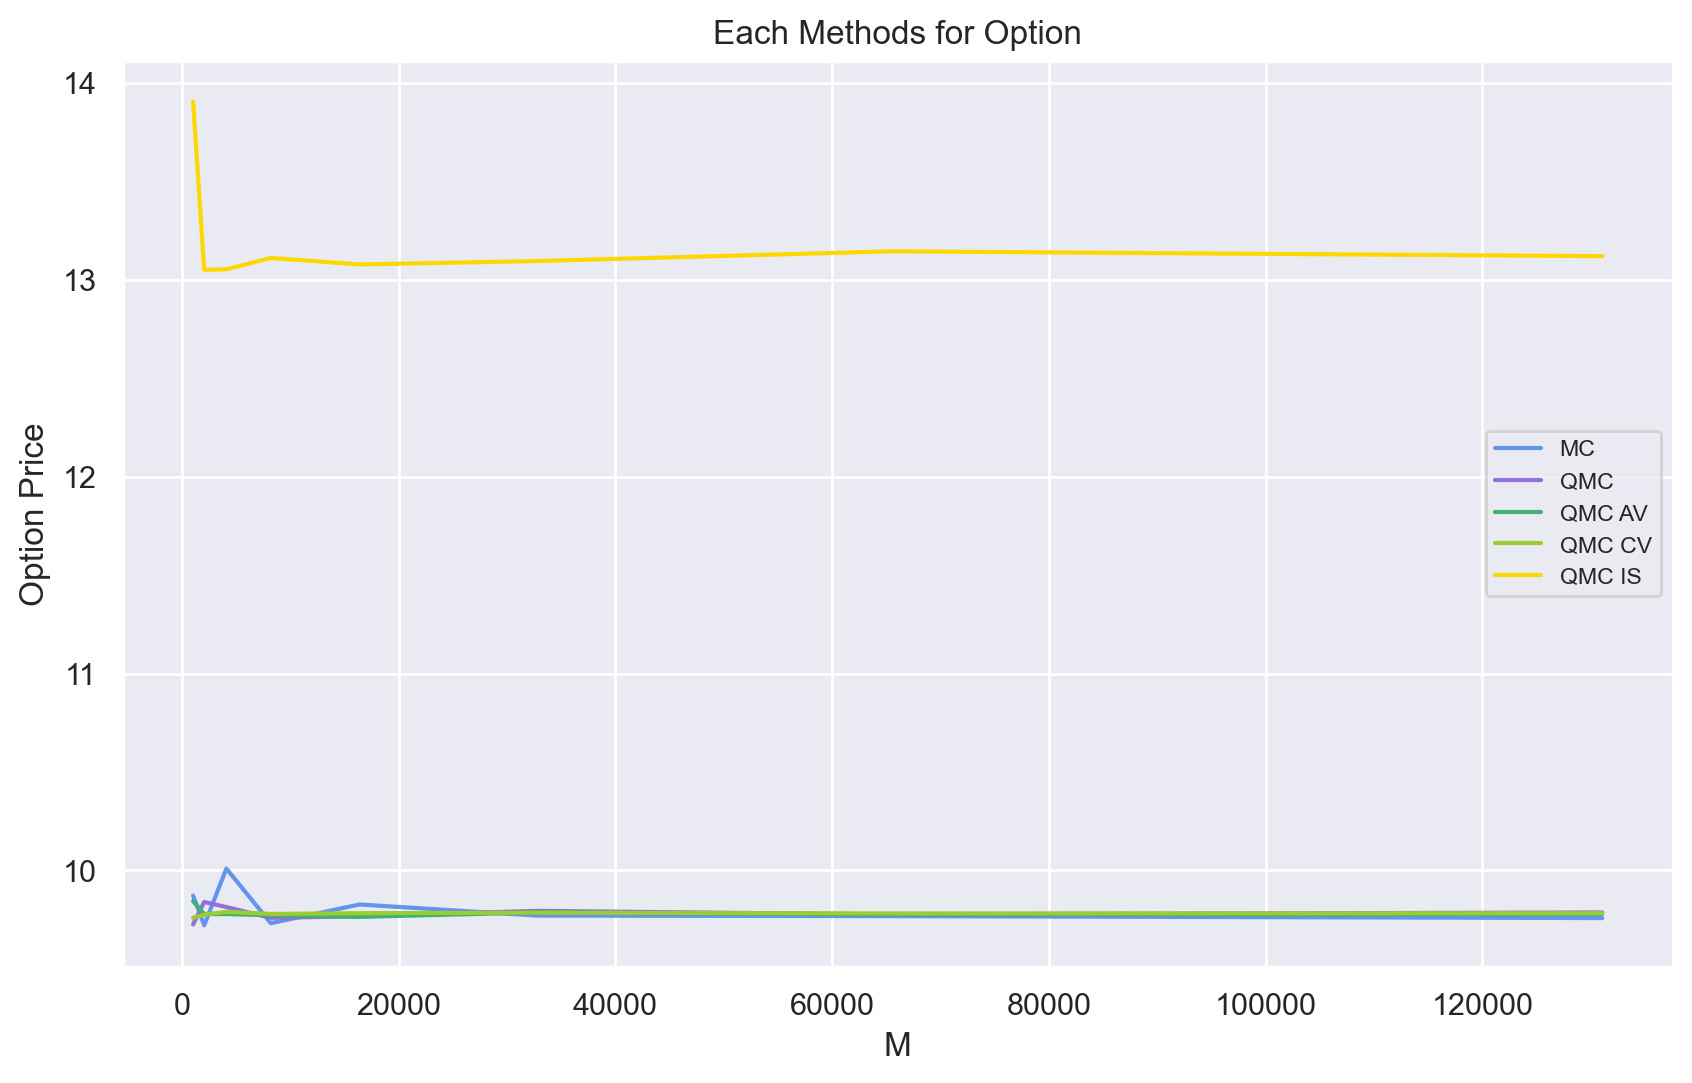

In [1924]:
sns.set()
f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(MC_AS_D.M, MC_AS_D['MC Arithmetic Asian Call'], color="cornflowerblue", label="MC", linestyle="-")
ax.plot(QMC_AS_D.M, QMC_AS_D['QMC Arithmetic Asian Call'], color="mediumpurple", label="QMC", linestyle="-")
ax.plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Arithmetic Asian Call'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax.plot(QMC_AS_CV_D.M,QMC_AS_CV_D['QMC Arithmetic Asian Call'], color="yellowgreen", label="QMC CV", linestyle="-")
ax.plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Arithmetic Asian Call'], color="gold", label="QMC IS", linestyle="-")
ax.set_xlabel('M')
ax.set_ylabel('Option Price')
ax.legend(loc='right', fontsize = 'x-small')
ax.set_title("Each Methods for Option")
plt.show()

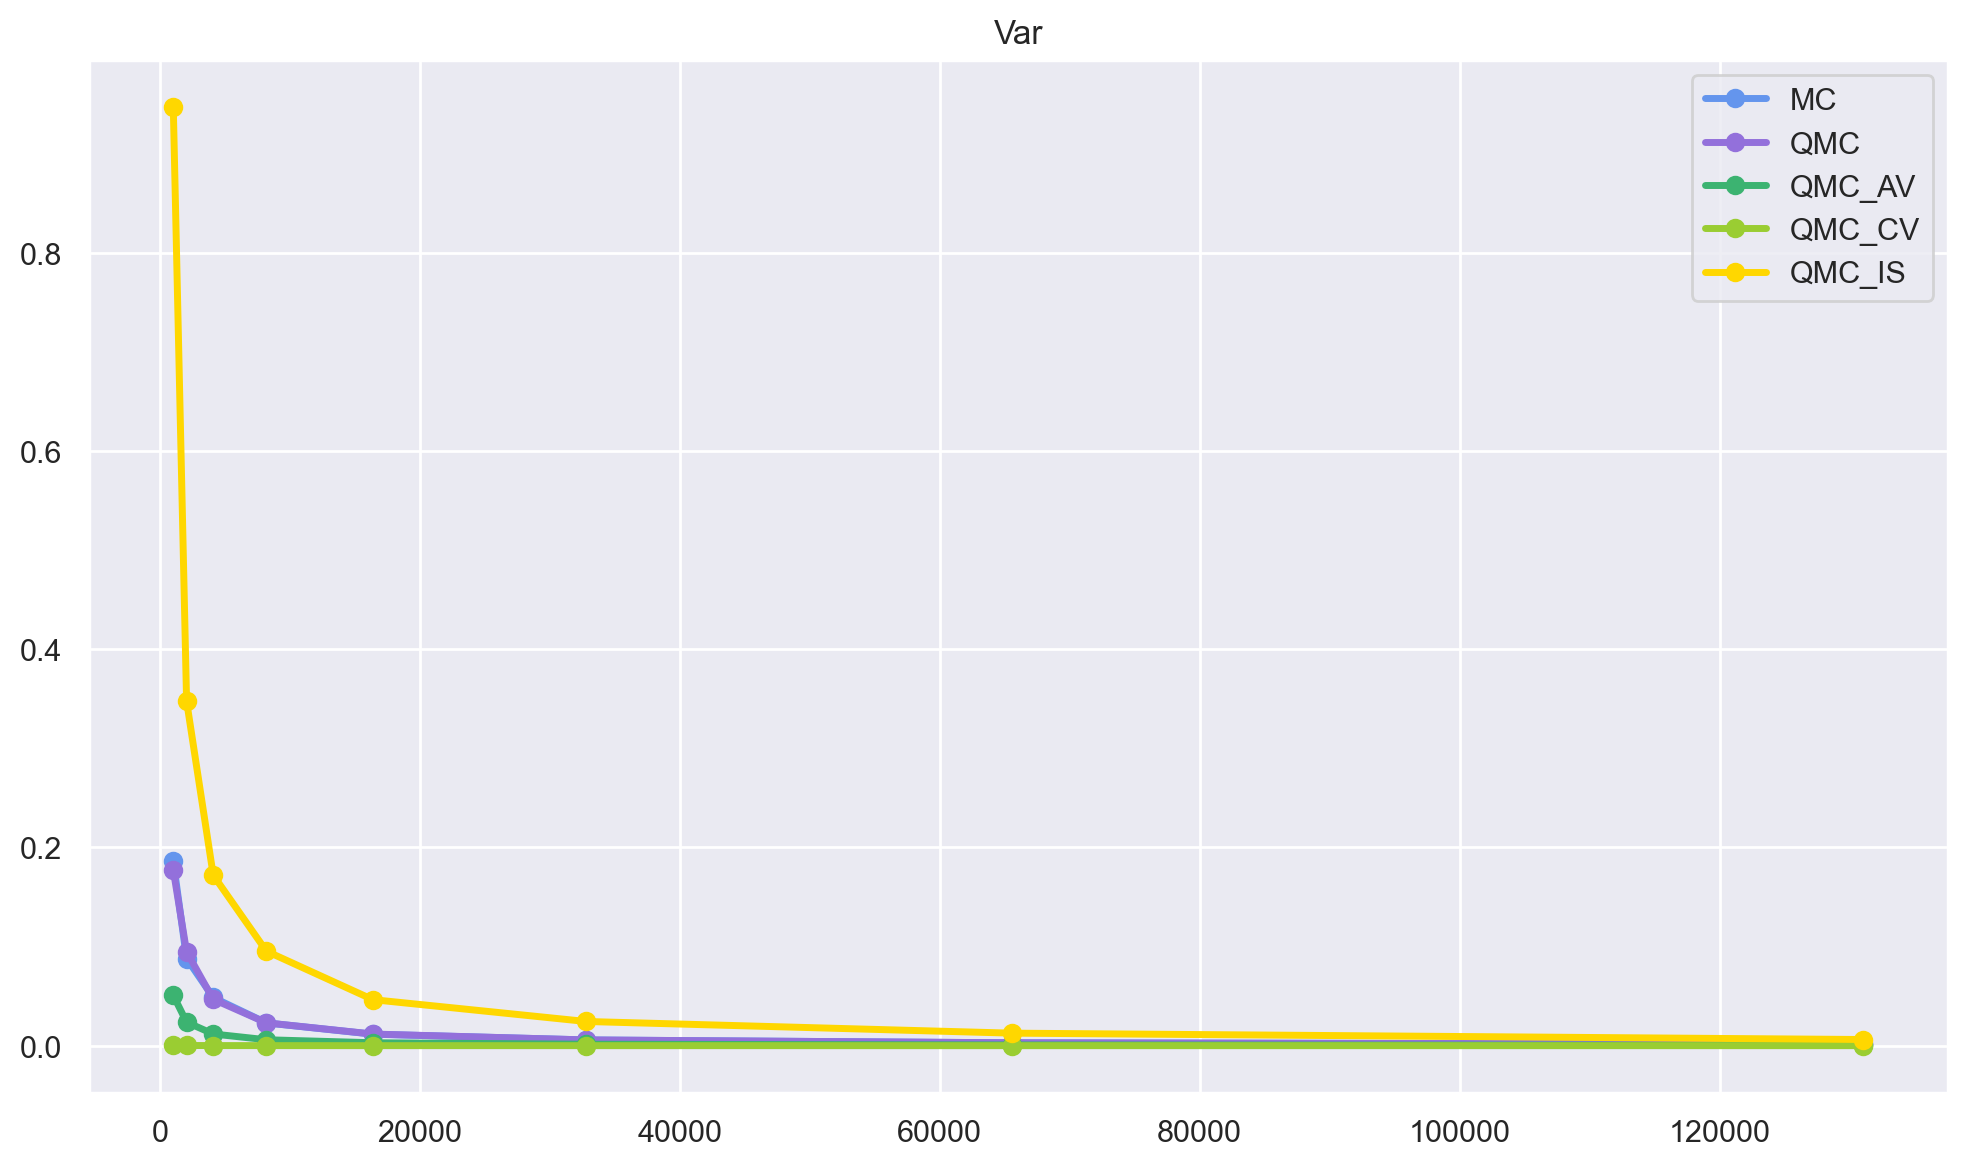

In [1985]:
sns.set()
f, ax = plt.subplots(1, 1,figsize=(10,6))
ax.plot(MC_AS_D.M, MC_AS_D['MC Arithmetic Asian Call Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_D.M, QMC_AS_D['QMC Arithmetic Asian Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Arithmetic Asian Call Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_CV_D.M, QMC_AS_CV_D['QMC Arithmetic Asian Call Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Arithmetic Asian Call Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax.legend()
ax.set_title("Var")
f.tight_layout()
plt.show()

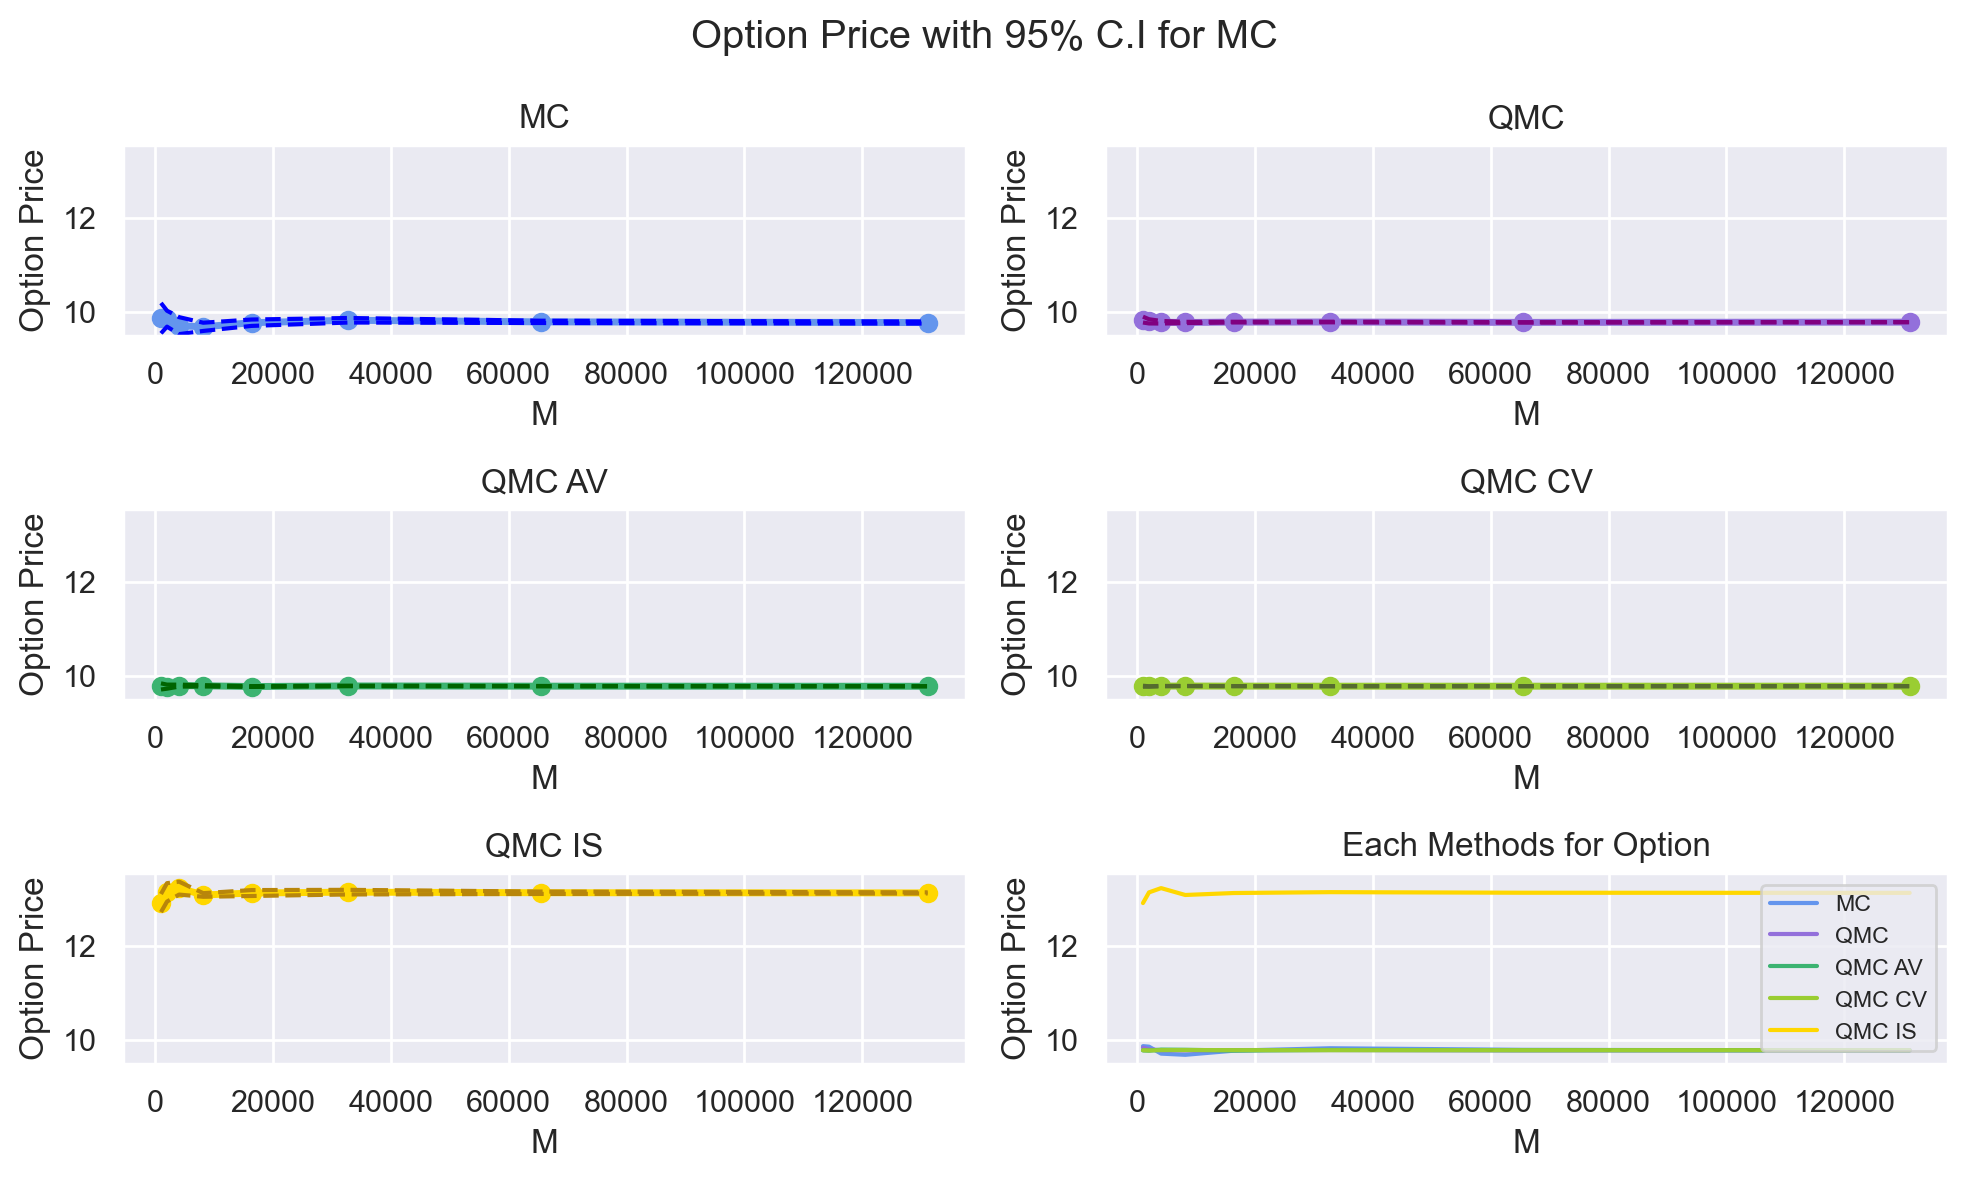

In [1986]:
sns.set()
f, ax = plt.subplots(3, 2,figsize=(10,6))
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Asian Call'], color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Call Var Up'], color="Blue", linestyle="--")
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Call Var Down'], color="Blue", linestyle="--")
ax[0,0].set_xlabel('M')
ax[0,0].set_ylabel('Option Price')
ax[0,0].set_title("MC")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Call'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Call Var Up'], color="Purple", linestyle="--")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Call Var Down'], color="Purple", linestyle="--")
ax[0,1].set_xlabel('M')
ax[0,1].set_ylabel('Option Price')
ax[0,1].set_title("QMC")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Call'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Call Var Up'], color="darkgreen", linestyle="--")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Call Var Down'], color="darkgreen", linestyle="--")
ax[1,0].set_xlabel('M')
ax[1,0].set_ylabel('Option Price')
ax[1,0].set_title("QMC AV")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Call'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Call Var Up'], color="darkolivegreen", linestyle="--")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Call Var Down'], color="darkolivegreen", linestyle="--")
ax[1,1].set_xlabel('M')
ax[1,1].set_ylabel('Option Price')
ax[1,1].set_title("QMC CV")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Call'], color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Call Var Up'], color="darkgoldenrod", linestyle="--")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Call Var Down'], color="darkgoldenrod", linestyle="--")
ax[2,0].set_xlabel('M')
ax[2,0].set_ylabel('Option Price')
ax[2,0].set_title("QMC IS")
ax[2,1].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Asian Call'], color="cornflowerblue", label="MC", linestyle="-")
ax[2,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Call'], color="mediumpurple", label="QMC", linestyle="-")
ax[2,1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Call'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax[2,1].plot(QMC_AS_CV_10.M,QMC_AS_CV_10['MC Arithmetic Asian Call'], color="yellowgreen", label="QMC CV", linestyle="-")
ax[2,1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Call'], color="gold", label="QMC IS", linestyle="-")
ax[2,1].set_xlabel('M')
ax[2,1].set_ylabel('Option Price')
ax[2,1].legend(loc='right', fontsize = 'x-small')
ax[2,1].set_title("Each Methods for Option")

ax[0,0].set(ylim=(9.5,13.55))
ax[0,1].set(ylim=(9.5,13.55))
ax[1,0].set(ylim=(9.5,13.55))
ax[1,1].set(ylim=(9.5,13.55))
ax[2,0].set(ylim=(9.5,13.55))
ax[2,1].set(ylim=(9.5,13.55))
f.suptitle('Option Price with 95% C.I for MC')
f.tight_layout()
plt.show()

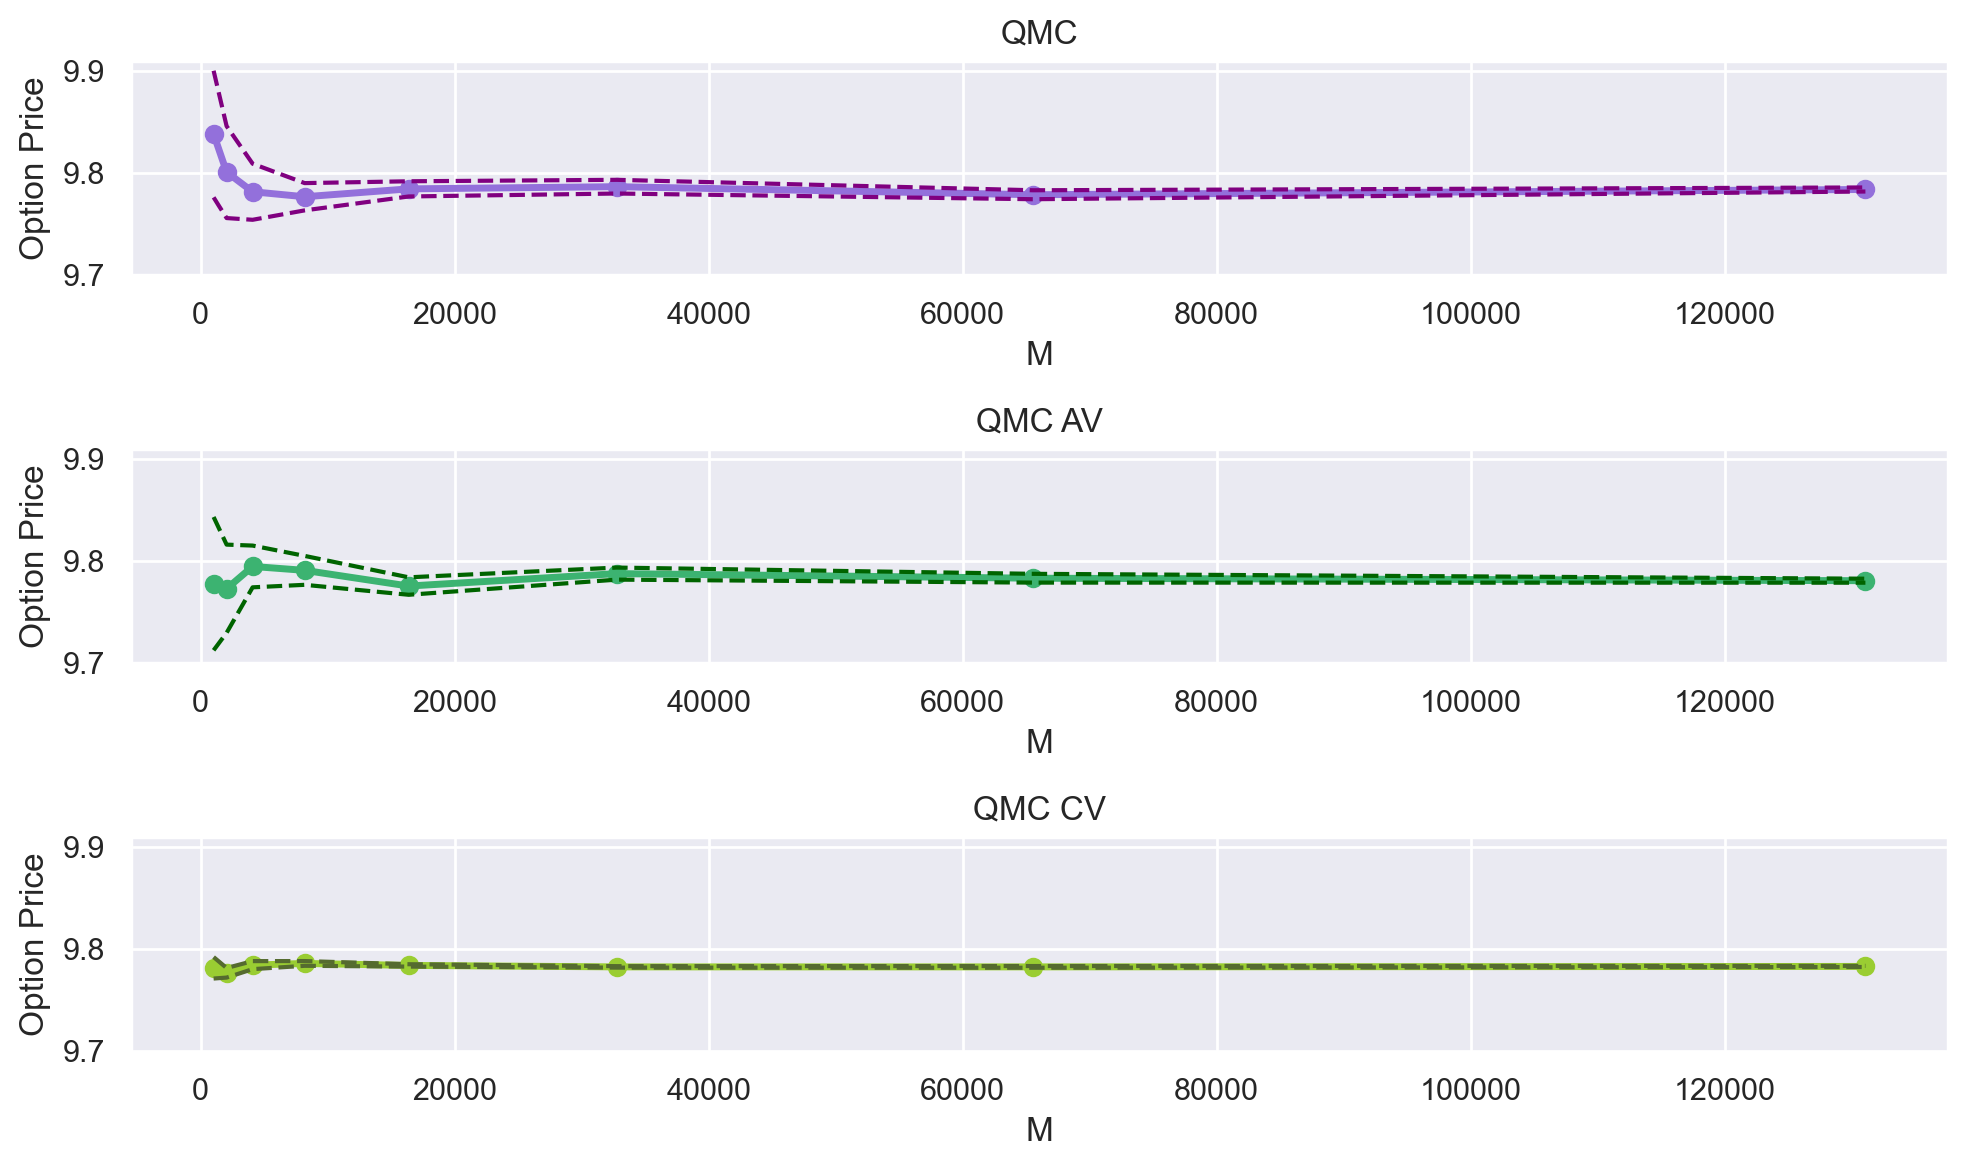

In [1944]:
sns.set()
f, ax = plt.subplots(3, 1,figsize=(10,6))
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Call'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Call Var Up'], color="Purple", linestyle="--")
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Call Var Down'], color="Purple", linestyle="--")
ax[0].set_xlabel('M')
ax[0].set_ylabel('Option Price')
ax[0].set_title("QMC")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Call'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Call Var Up'], color="darkgreen", linestyle="--")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Call Var Down'], color="darkgreen", linestyle="--")
ax[1].set_xlabel('M')
ax[1].set_ylabel('Option Price')
ax[1].set_title("QMC AV")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Call'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Call Var Up'], color="darkolivegreen", linestyle="--")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Call Var Down'], color="darkolivegreen", linestyle="--")
ax[2].set_xlabel('M')
ax[2].set_ylabel('Option Price')
ax[2].set_title("QMC CV")

ax[0].set(ylim=(9.7,9.91))
ax[1].set(ylim=(9.7,9.91))
ax[2].set(ylim=(9.7,9.91))
f.tight_layout()
plt.show()

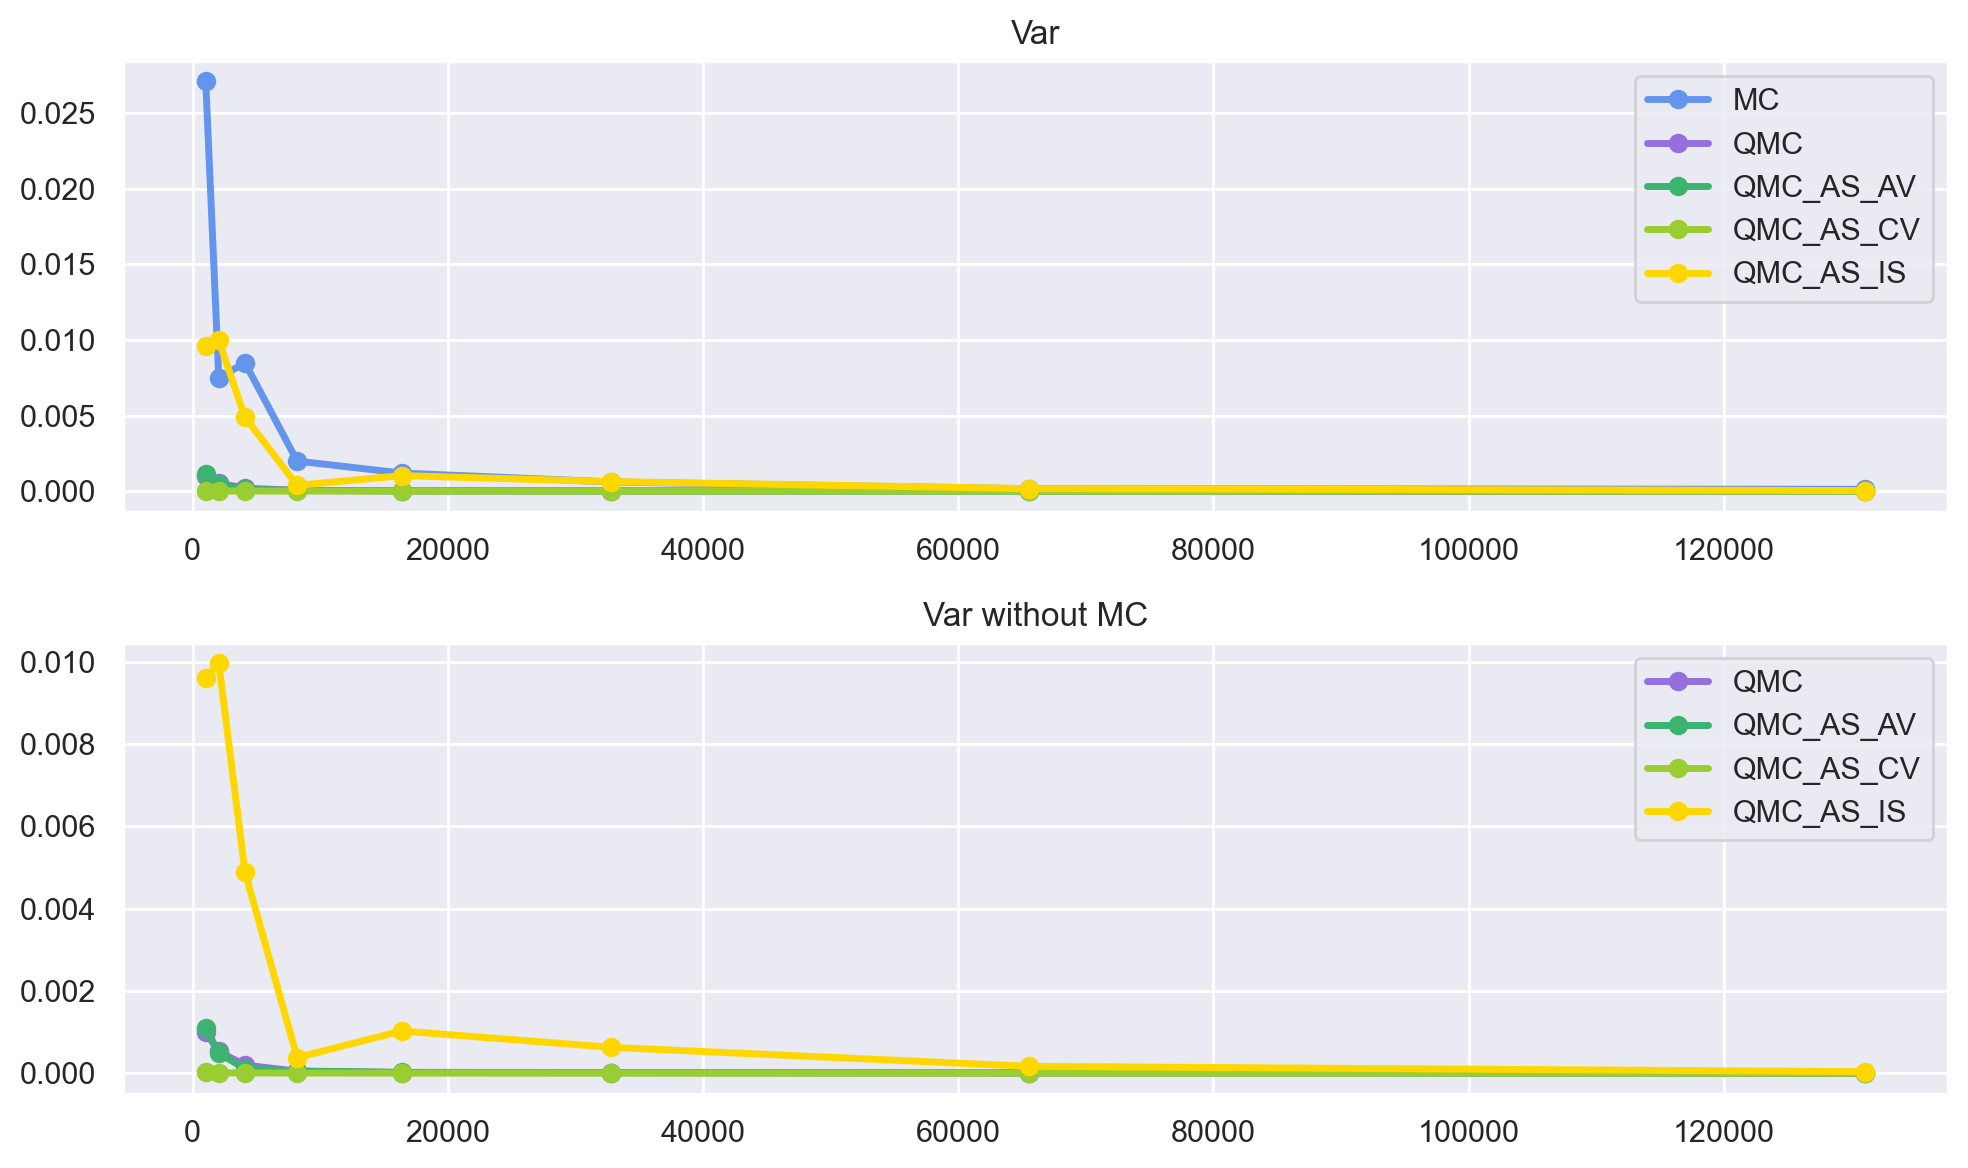

In [1987]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Asian Call Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Call Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Call Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Call Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title("Var")
ax[1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Call Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Call Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Call Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Call Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title("Var without MC")
f.tight_layout()
plt.show()

### Asian Arithmetic Put 

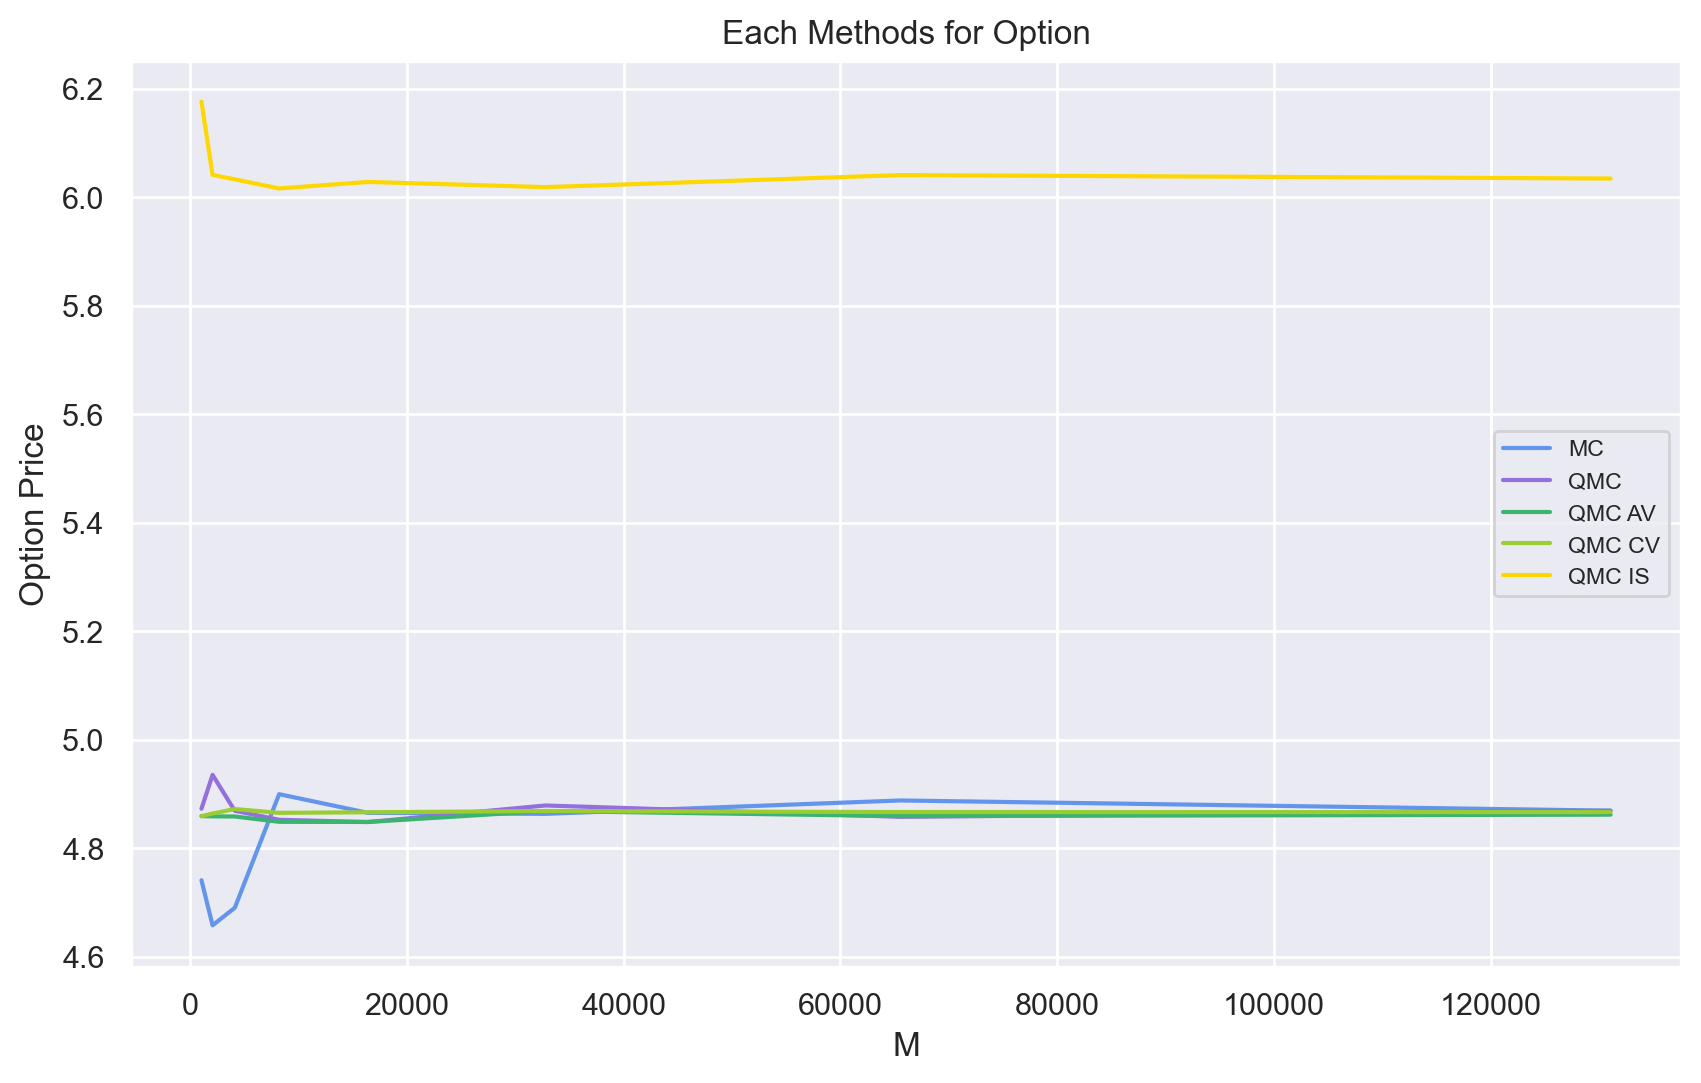

In [1947]:
sns.set()
f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(MC_AS_D.M, MC_AS_D['MC Arithmetic Asian Put'], color="cornflowerblue", label="MC", linestyle="-")
ax.plot(QMC_AS_D.M, QMC_AS_D['QMC Arithmetic Asian Put'], color="mediumpurple", label="QMC", linestyle="-")
ax.plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Arithmetic Asian Put'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax.plot(QMC_AS_CV_D.M,QMC_AS_CV_D['QMC Arithmetic Asian Put'], color="yellowgreen", label="QMC CV", linestyle="-")
ax.plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Arithmetic Asian Put'], color="gold", label="QMC IS", linestyle="-")
ax.set_xlabel('M')
ax.set_ylabel('Option Price')
ax.legend(loc='right', fontsize = 'x-small')
ax.set_title("Each Methods for Option")
plt.show()

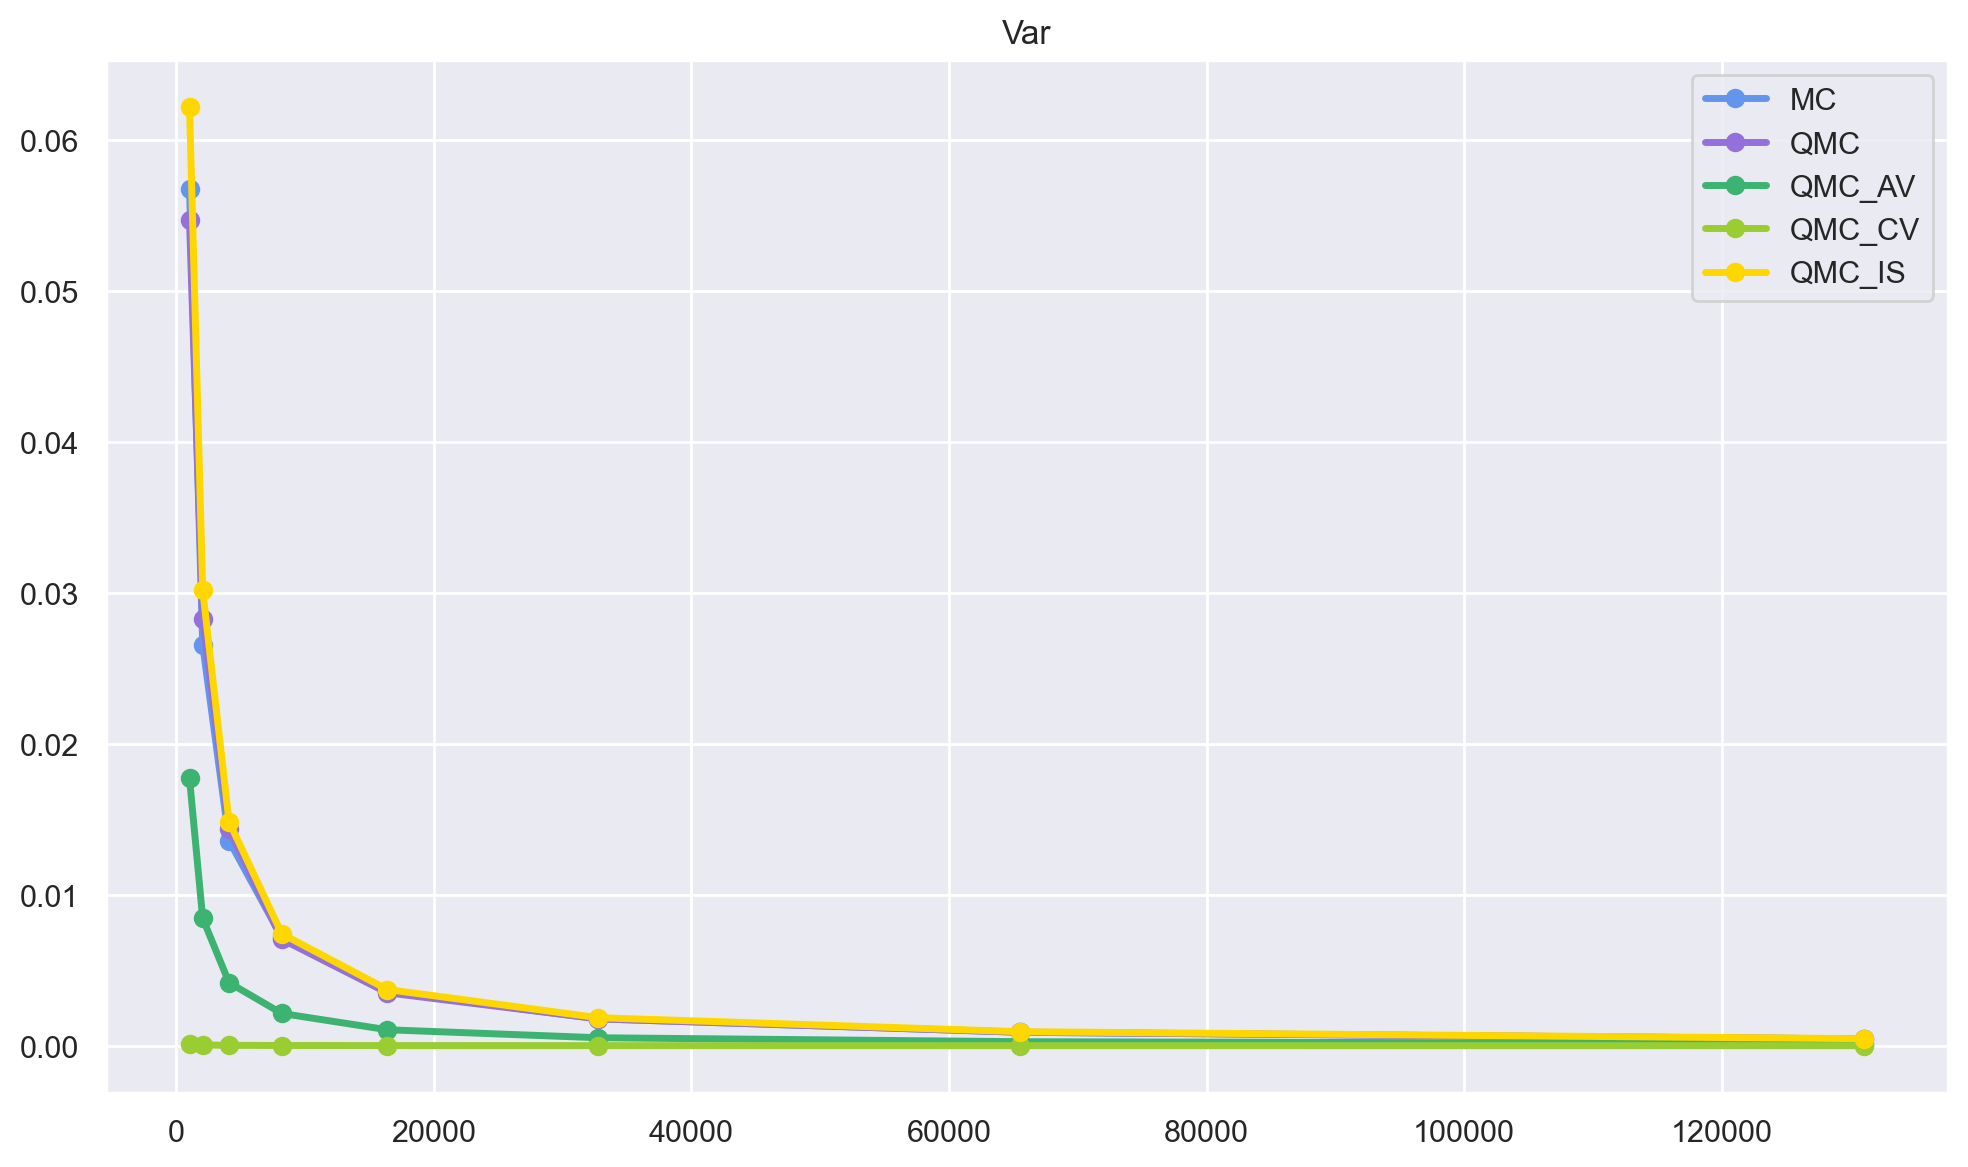

In [1988]:
sns.set()
f, ax = plt.subplots(1, 1,figsize=(10,6))
ax.plot(MC_AS_D.M, MC_AS_D['MC Arithmetic Asian Put Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_D.M, QMC_AS_D['QMC Arithmetic Asian Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_AV_D.M, QMC_AS_AV_D['QMC Arithmetic Asian Put Var'], label = 'QMC_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_CV_D.M, QMC_AS_CV_D['QMC Arithmetic Asian Put Var'], label = 'QMC_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax.plot(QMC_AS_IS_D.M, QMC_AS_IS_D['QMC Arithmetic Asian Put Var'], label = 'QMC_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax.legend()
ax.set_title('Var')
f.tight_layout()
plt.show()

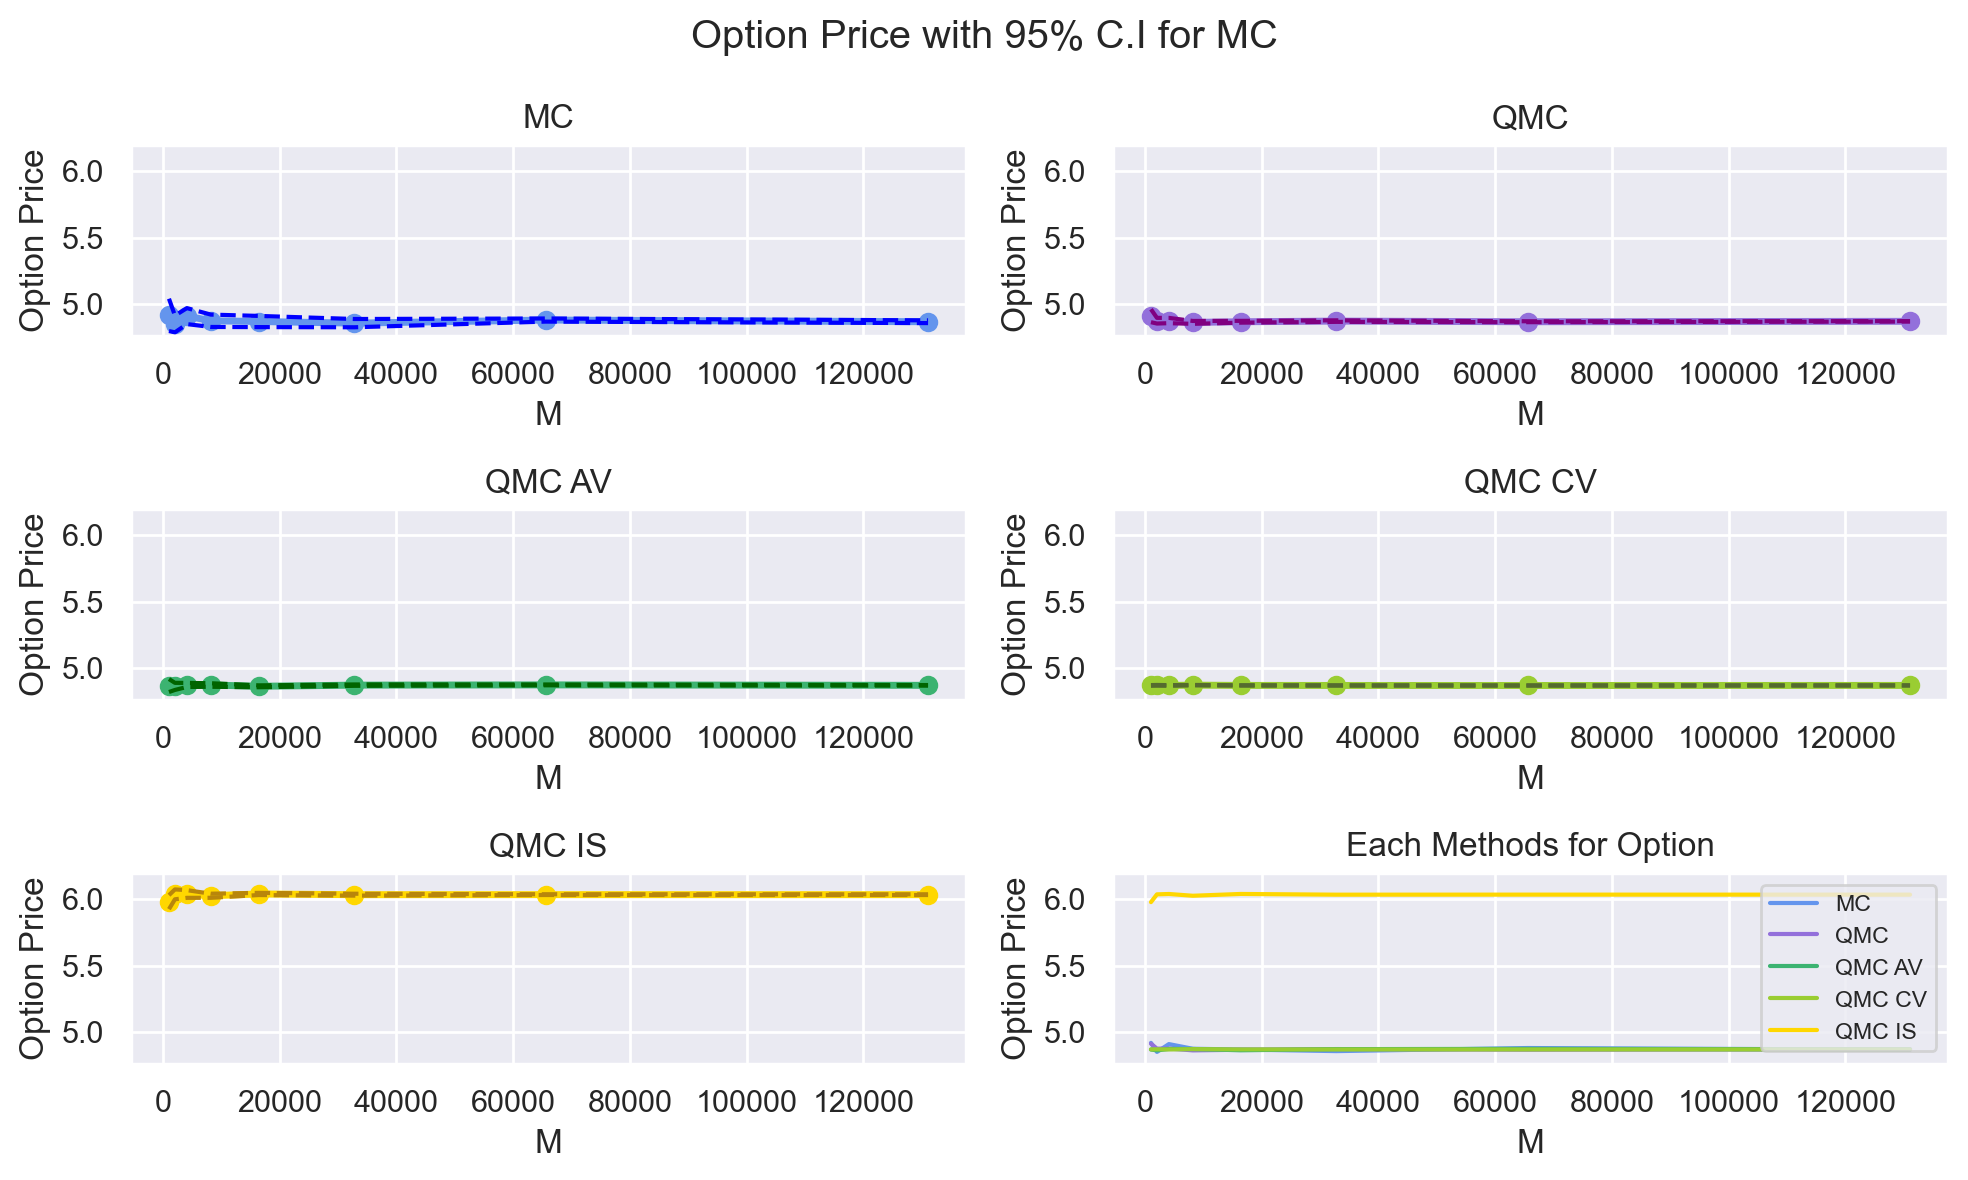

In [1989]:
sns.set()
f, ax = plt.subplots(3, 2,figsize=(10,6))
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Asian Put'], color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Put Var Up'], color="Blue", linestyle="--")
ax[0,0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Put Var Down'], color="Blue", linestyle="--")
ax[0,0].set_xlabel('M')
ax[0,0].set_ylabel('Option Price')
ax[0,0].set_title("MC")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Put'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Put Var Up'], color="Purple", linestyle="--")
ax[0,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Put Var Down'], color="Purple", linestyle="--")
ax[0,1].set_xlabel('M')
ax[0,1].set_ylabel('Option Price')
ax[0,1].set_title("QMC")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Put'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Put Var Up'], color="darkgreen", linestyle="--")
ax[1,0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Put Var Down'], color="darkgreen", linestyle="--")
ax[1,0].set_xlabel('M')
ax[1,0].set_ylabel('Option Price')
ax[1,0].set_title("QMC AV")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Put'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Put Var Up'], color="darkolivegreen", linestyle="--")
ax[1,1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Put Var Down'], color="darkolivegreen", linestyle="--")
ax[1,1].set_xlabel('M')
ax[1,1].set_ylabel('Option Price')
ax[1,1].set_title("QMC CV")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Put'], color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Put Var Up'], color="darkgoldenrod", linestyle="--")
ax[2,0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Put Var Down'], color="darkgoldenrod", linestyle="--")
ax[2,0].set_xlabel('M')
ax[2,0].set_ylabel('Option Price')
ax[2,0].set_title("QMC IS")
ax[2,1].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Asian Put'], color="cornflowerblue", label="MC", linestyle="-")
ax[2,1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Put'], color="mediumpurple", label="QMC", linestyle="-")
ax[2,1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Put'], color="mediumseagreen", label="QMC AV", linestyle="-")
ax[2,1].plot(QMC_AS_CV_10.M,QMC_AS_CV_10['MC Arithmetic Asian Put'], color="yellowgreen", label="QMC CV", linestyle="-")
ax[2,1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Put'], color="gold", label="QMC IS", linestyle="-")
ax[2,1].set_xlabel('M')
ax[2,1].set_ylabel('Option Price')
ax[2,1].legend(loc='right', fontsize = 'x-small')
ax[2,1].set_title("Each Methods for Option")

ax[0,0].set(ylim=(4.76,6.2))
ax[0,1].set(ylim=(4.76,6.2))
ax[1,0].set(ylim=(4.76,6.2))
ax[1,1].set(ylim=(4.76,6.2))
ax[2,0].set(ylim=(4.76,6.2))
ax[2,1].set(ylim=(4.76,6.2))
f.suptitle('Option Price with 95% C.I for MC')
f.tight_layout()
plt.show()

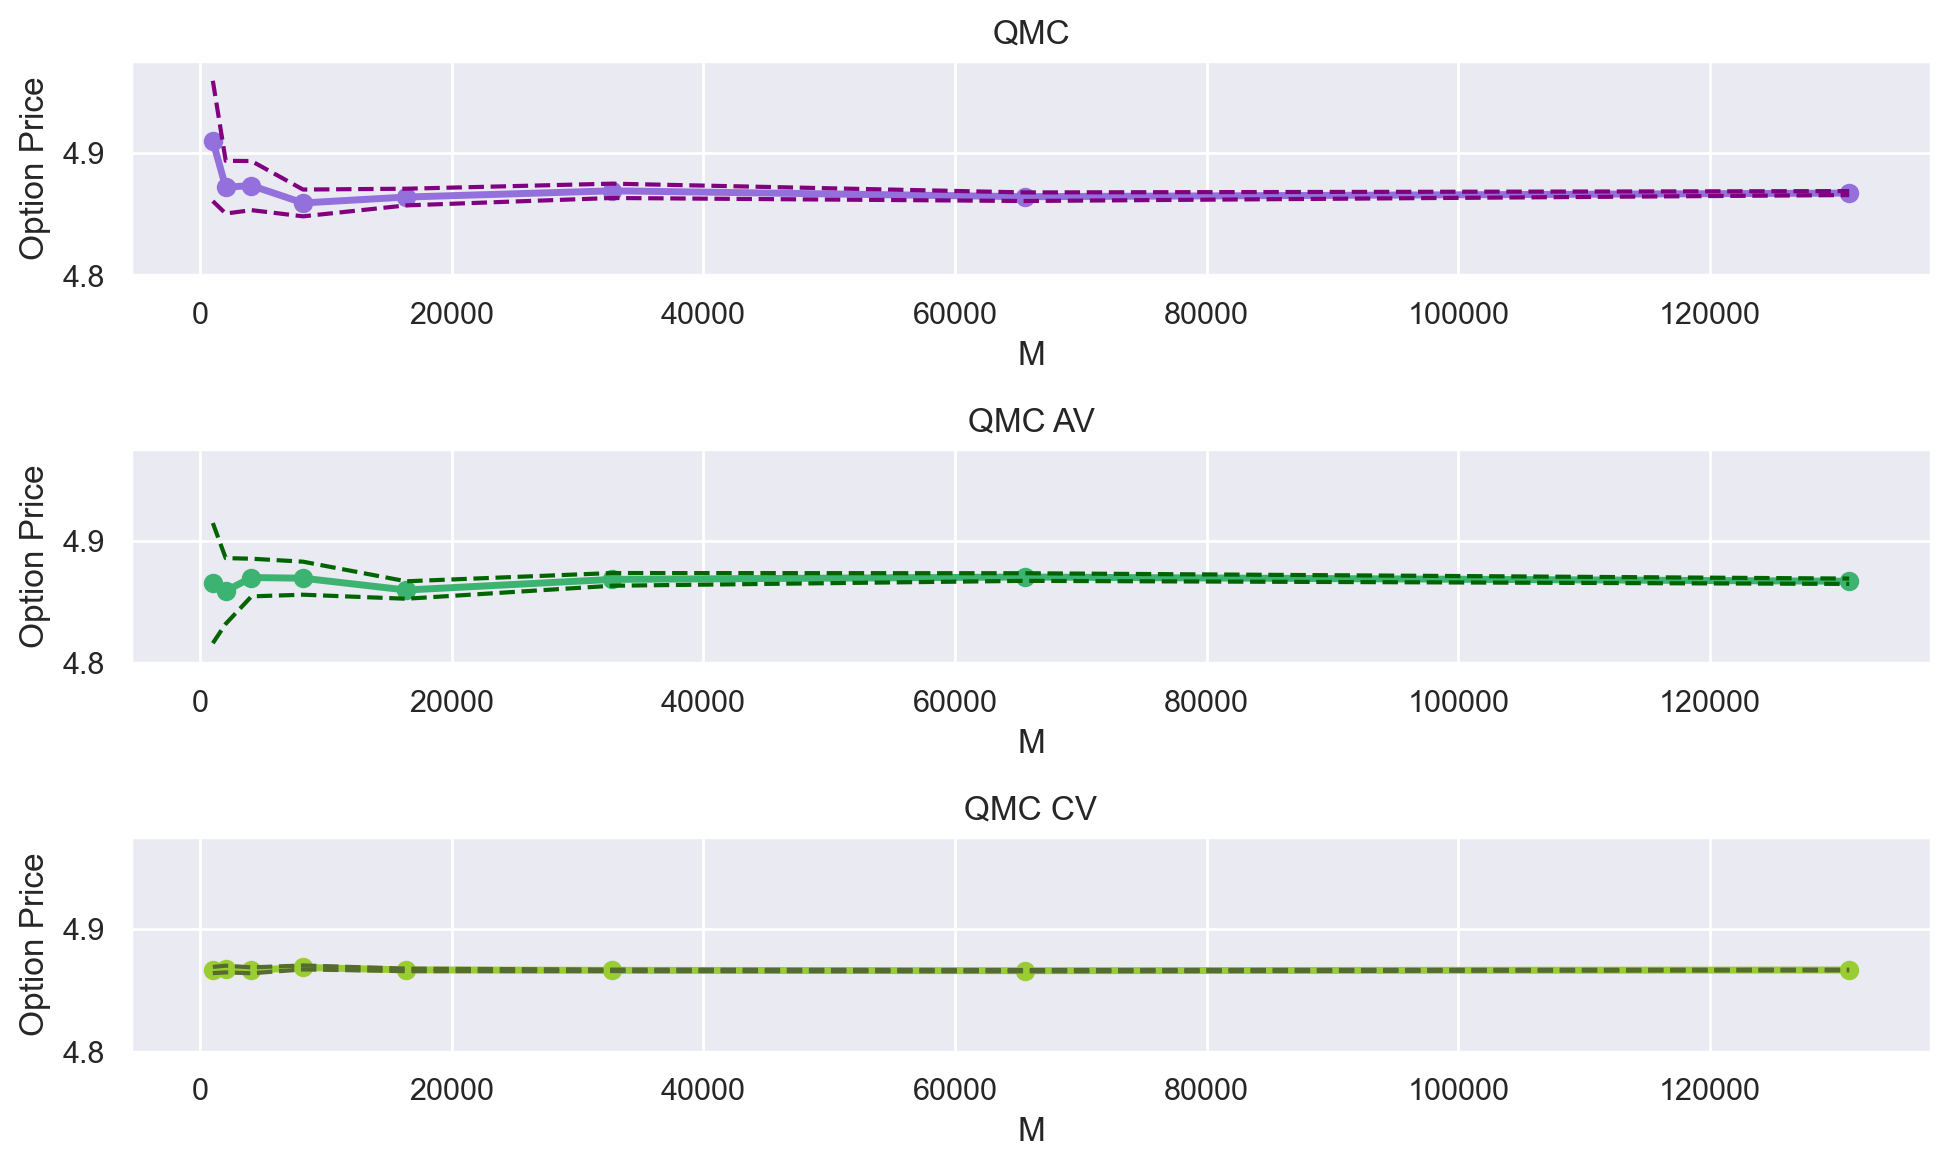

In [1964]:
sns.set()
f, ax = plt.subplots(3, 1,figsize=(10,6))
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Put'], color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Put Var Up'], color="Purple", linestyle="--")
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Put Var Down'], color="Purple", linestyle="--")
ax[0].set_xlabel('M')
ax[0].set_ylabel('Option Price')
ax[0].set_title("QMC")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Put'], color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Put Var Up'], color="darkgreen", linestyle="--")
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Put Var Down'], color="darkgreen", linestyle="--")
ax[1].set_xlabel('M')
ax[1].set_ylabel('Option Price')
ax[1].set_title("QMC AV")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Put'], color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Put Var Up'], color="darkolivegreen", linestyle="--")
ax[2].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Put Var Down'], color="darkolivegreen", linestyle="--")
ax[2].set_xlabel('M')
ax[2].set_ylabel('Option Price')
ax[2].set_title("QMC CV")

ax[0].set(ylim=(4.8,4.975))
ax[1].set(ylim=(4.8,4.975))
ax[2].set(ylim=(4.8,4.975))
f.tight_layout()
plt.show()

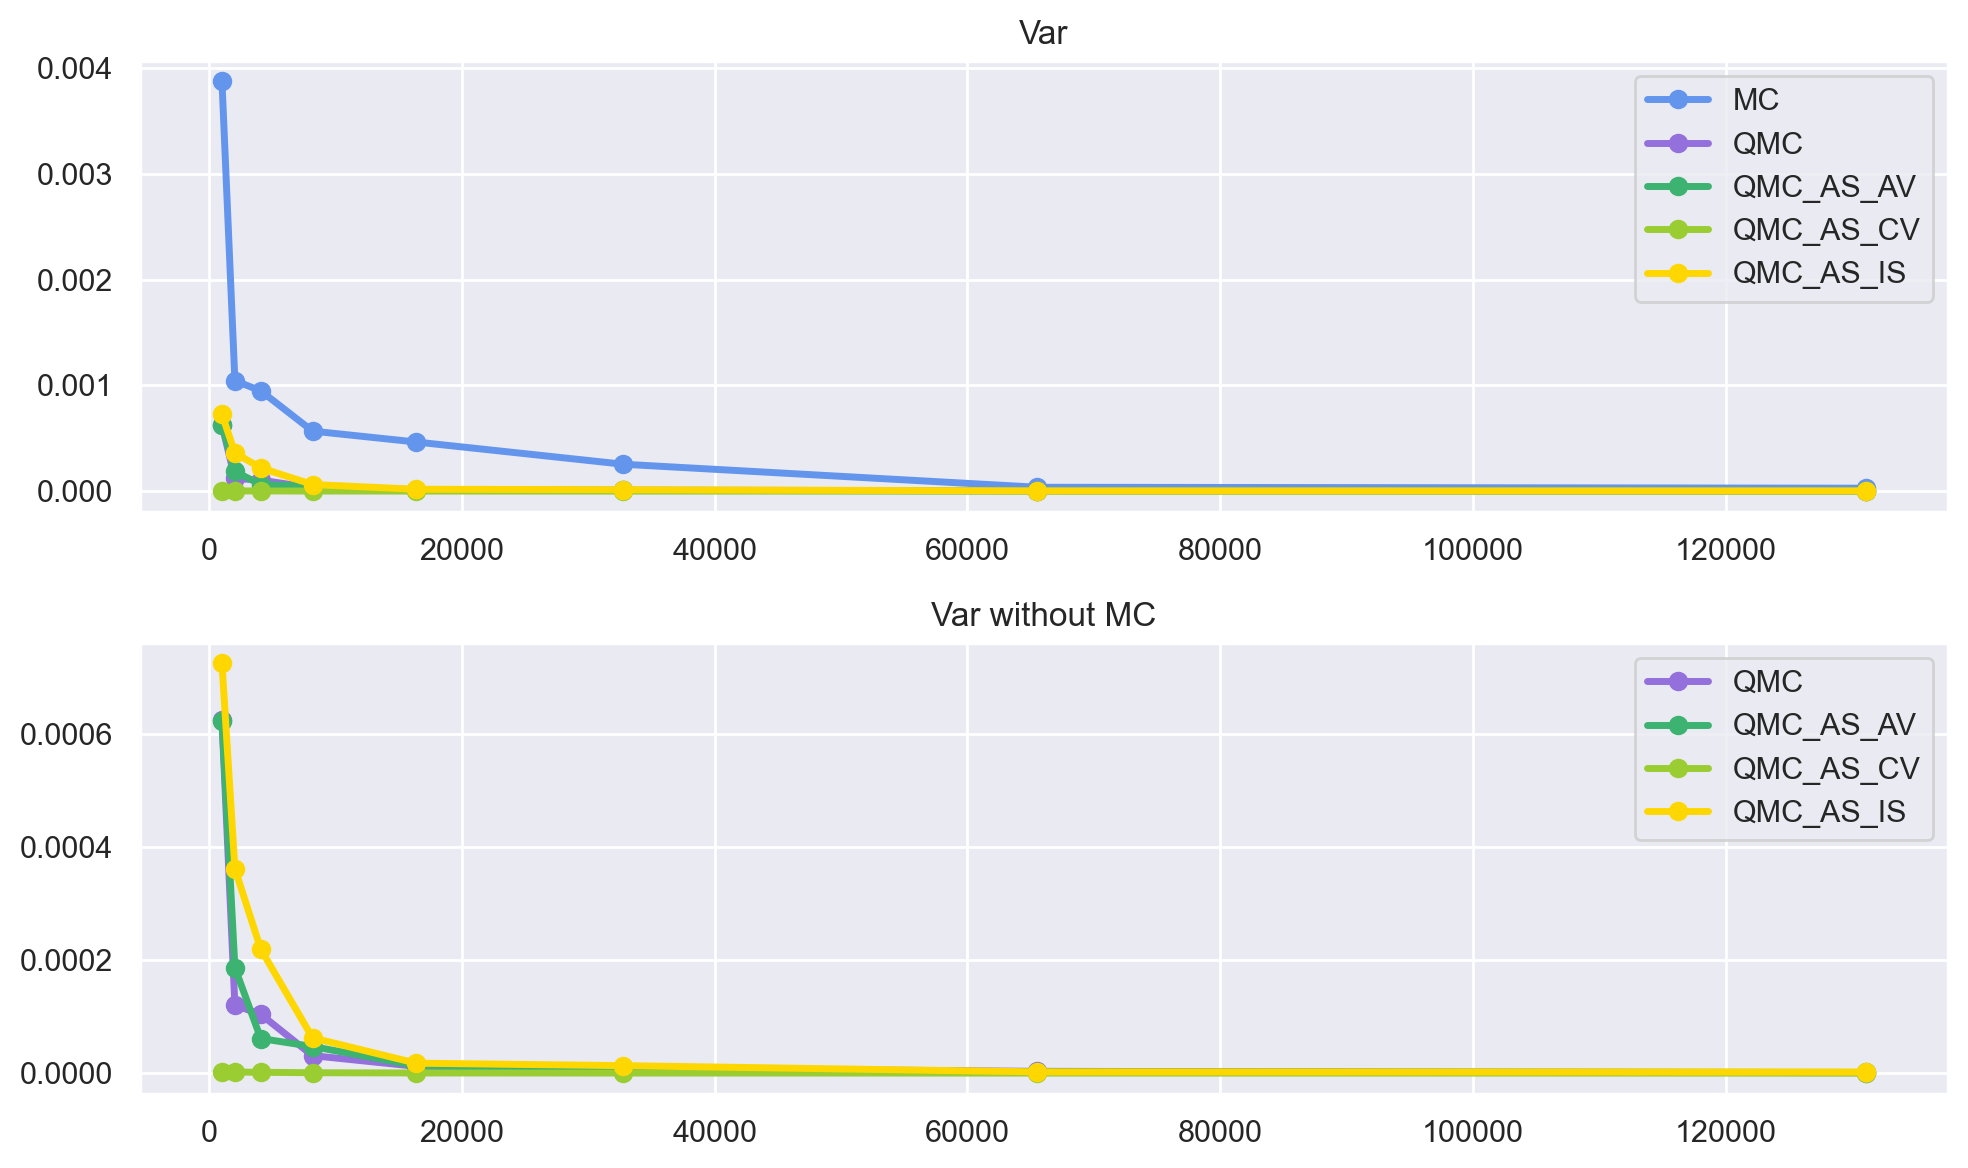

In [1990]:
sns.set()
f, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(MC_AS_10.M, MC_AS_10['MC Arithmetic Asian Put Var'], label = 'MC', color="cornflowerblue", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Put Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Put Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[0].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Put Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[0].legend()
ax[0].set_title('Var')
ax[1].plot(QMC_AS_10.M, QMC_AS_10['MC Arithmetic Asian Put Var'], label = 'QMC', color="mediumpurple", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_AV_10.M, QMC_AS_AV_10['MC Arithmetic Asian Put Var'], label = 'QMC_AS_AV', color="mediumseagreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_CV_10.M, QMC_AS_CV_10['MC Arithmetic Asian Put Var'], label = 'QMC_AS_CV', color="yellowgreen", linestyle="-", marker='o',linewidth=2.5)
ax[1].plot(QMC_AS_IS_10.M, QMC_AS_IS_10['MC Arithmetic Asian Put Var'], label = 'QMC_AS_IS', color="gold", linestyle="-", marker='o',linewidth=2.5)
ax[1].legend()
ax[1].set_title('Var without MC')
f.tight_layout()
plt.show()

In [266]:
#解
print('Geomatric Asian Call:',CG)
print('MC Geomatric Asian Call:',CG_M)
print('QMC Geomatric Asian Call:',CG_Q)
print('QMC Geomatric Asian AV Call:',CG_QAV)
print('QMC Geomatric Asian CV Call:',CTGCV.mean())
print('QMC Geomatric Asian IS Call:',CG_Q_IS)
print('---------------------------------------')
print('MC Arithmetic Asian Call:',CA_M)
print('QMC Arithmetic Asian Call:',CA_Q)
print('QMC Arithmetic Asian AV Call:',CA_QAV)
print('QMC Arithmetic Asian CV Call:',CTACV.mean())
print('QMC Arithmetic Asian IS Call:',CA_Q_IS)
print('---------------------------------------')
print('Geomatric Asian Put:',PG)
print('MC Geomatric Asian Put:',PG_M)
print('QMC Geomatric Asian Put:',PG_Q)
print('QMC Geomatric Asian AV Put:',PG_QAV)
print('QMC Geomatric Asian CV Put:',PTGCV.mean())
print('QMC Geomatric Asian IS Put:',PG_Q_IS)
print('---------------------------------------')
print('MC Arithmetic Asian Put:',PA_M)
print('QMC Arithmetic Asian Put:',PA_Q)
print('QMC Arithmetic Asian AV Put:',PA_QAV)
print('QMC Arithmetic Asian CV Put:',PTACV.mean())
print('QMC Arithmetic Asian IS Put:',PA_Q_IS)

Geomatric Asian Call: 9.213652307469951
MC Geomatric Asian Call: 9.135542783193662
QMC Geomatric Asian Call: 9.193592335650035
QMC Geomatric Asian AV Call: 9.187760485868857
QMC Geomatric Asian CV Call: 9.20893411550444
---------------------------------------
MC Arithmetic Asian Call: 9.700038852497242
QMC Arithmetic Asian Call: 9.757808011902396
QMC Arithmetic Asian AV Call: 9.748811763492675
QMC Arithmetic Asian CV Call: 9.779028734160232
---------------------------------------
Geomatric Asian Put: 5.125750001043861
MC Geomatric Asian Put: 5.168062948621514
QMC Geomatric Asian Put: 5.128682339570793
QMC Geomatric Asian AV Put: 5.1246907041830285
QMC Geomatric Asian CV Put: 5.1210295096173635
---------------------------------------
MC Arithmetic Asian Put: 4.904908211790714
QMC Arithmetic Asian Put: 4.867955401846337
QMC Arithmetic Asian AV Put: 4.865370906103617
QMC Arithmetic Asian CV Put: 4.8651302552404045


In [267]:
#var
print('Var Geomatric Asian MC Call:',np.var(CTG)/M)
print('Var Geomatric Asian QMC Call:',np.var(CTGQ)/M)
print('Var Geomatric Asian QMC AV Call:',np.var(CTGAV)/M)
print('Var Geomatric Asian QMC CV Call:',np.var(CTGCV)/M)
print('Var Geomatric Asian QMC IS Call:',np.var(CTGIS)/M)
print('---------------------------------------')
print('Var Arithmetic Asian MC Call:',np.var(CTA)/M)
print('Var Arithmetic Asian QMC Call:',np.var(CTAQ)/M)
print('Var Arithmetic Asian QMC AV Call:',np.var(CTAAV)/M)
print('Var Arithmetic Asian QMC CV Call:','{:.20f}'.format(np.var(CTACV)/M))
print('Var Arithmetic Asian QMC IS Call:',np.var(CTAIS)/M)
print('---------------------------------------')
print('Var Geomatric Asian MC Put:',np.var(PTG)/M)
print('Var Geomatric Asian QMC Put:',np.var(PTGQ)/M)
print('Var Geomatric Asian QMC AV Put:',np.var(PTGAV)/M)
print('Var Geomatric Asian QMC CV Put:',np.var(PTGCV)/M)
print('Var Geomatric Asian QMC IS Put:',np.var(PTGIS)/M)
print('---------------------------------------')
print('Var Arithmetic Asian MC Put:',np.var(PTA)/M)
print('Var Arithmetic Asian QMC Put:',np.var(PTAQ)/M)
print('Var Arithmetic Asian QMC AV Put:',np.var(PTAAV)/M)
print('Var Arithmetic Asian QMC CV Put:','{:.20f}'.format(np.var(PTACV)/M))
print('Var Arithmetic Asian QMC IS Put:',np.var(PTAIS)/M)

Var Geomatric Asian MC Call: 0.01700809500990813
Var Geomatric Asian QMC Call: 0.016942013406810997
Var Geomatric Asian QMC AV Call: 0.004059602200635738
Var Geomatric Asian QMC CV Call: 0.0024925973003020875
---------------------------------------
Var Arithmetic Asian MC Call: 0.019024474844829362
Var Arithmetic Asian QMC Call: 0.018993241813341232
Var Arithmetic Asian QMC AV Call: 0.004510919364964288
Var Arithmetic Asian QMC CV Call: 0.00003762858239990663
---------------------------------------
Var Geomatric Asian MC Put: 0.0062945215309834525
Var Geomatric Asian QMC Put: 0.006087961736885675
Var Geomatric Asian QMC AV Put: 0.0017688041404362788
Var Geomatric Asian QMC CV Put: 0.0024925971917398597
---------------------------------------
Var Arithmetic Asian MC Put: 0.005841744062786773
Var Arithmetic Asian QMC Put: 0.005659432452071411
Var Arithmetic Asian QMC AV Put: 0.0016766690979346471
Var Arithmetic Asian QMC CV Put: 0.00000955779486296228


In [268]:
#err
print('Error Geomatric Asian MC Call:',np.abs(CG_M-CG)/CG)
print('Error Geomatric Asian QMC Call:',np.abs(CG_Q-CG)/CG)
print('Error Geomatric Asian QMC AV Call:',np.abs(CG_QAV-CG)/CG)
print('Error Geomatric Asian QMC CV Call:',np.abs(CTGCV.mean()-CG)/CG)
print('Error Geomatric Asian QMC IS Call:',np.abs(CG_Q_IS-CG)/CG)
print('---------------------------------------')
print('Error Arithmetic Asian MC Call:',np.abs(CA_M-CG)/CG)
print('Error Arithmetic Asian QMC Call:',np.abs(CA_Q-CG)/CG)
print('Error Arithmetic Asian QMC AV Call:',np.abs(CA_QAV-CG)/CG)
print('Error Arithmetic Asian QMC CV Call:',np.abs(CTACV.mean()-CG)/CG)
print('Error Arithmetic Asian QMC IS Call:',np.abs(CA_Q_IS-CG)/CG)
print('---------------------------------------')
print('Error Geomatric Asian MC Put:',np.abs(PG_M-PG)/PG)
print('Error Geomatric Asian QMC Put:',np.abs(PG_Q-PG)/PG)
print('Error Geomatric Asian QMC AV Put:',np.abs(PG_QAV-PG)/PG)
print('Error Geomatric Asian QMC CV Put:',np.abs(PTGCV.mean()-PG)/PG)
print('Error Geomatric Asian QMC IS Put:',np.abs(PG_Q_IS-PG)/PG)
print('---------------------------------------')
print('Error Arithmetic Asian MC Put:',np.abs(PA_M-PG)/PG)
print('Error Arithmetic Asian QMC Put:',np.abs(PA_Q-PG)/PG)
print('Error Arithmetic Asian QMC AV Put:',np.abs(PA_QAV-PG)/PG)
print('Error Arithmetic Asian QMC CV Put:',np.abs(PTACV.mean()-PG)/PG)
print('Error Arithmetic Asian QMC IS Put:',np.abs(PA_Q_IS-PG)/PG)

Error Geomatric Asian MC Call: 0.008477585399327726
Error Geomatric Asian QMC Call: 0.002177200870023414
Error Geomatric Asian QMC AV Call: 0.002810158310413193
Error Geomatric Asian QMC CV Call: 0.002810158310413193
---------------------------------------
Error Arithmetic Asian MC Call: 0.052789765534450805
Error Arithmetic Asian QMC Call: 0.05905971771815956
Error Arithmetic Asian QMC AV Call: 0.05808331356164202
Error Arithmetic Asian QMC CV Call: 0.06136290016412951
---------------------------------------
Error Geomatric Asian MC Put: 0.008254976846127034
Error Geomatric Asian QMC Put: 0.0005720798958854854
Error Geomatric Asian QMC AV Put: 0.00020666182717002927
Error Geomatric Asian QMC CV Put: 0.05084519255726112
---------------------------------------
Error Arithmetic Asian MC Put: 0.04308477573197538
Error Arithmetic Asian QMC Put: 0.05029402509779528
Error Arithmetic Asian QMC AV Put: 0.050798243161921136
Error Arithmetic Asian QMC CV Put: 0.05084519255726112
